In [2]:
library(dplyr)
library(StatMeasures)
library(ggplot2)
library(caret)
library(rpart)
library(naivebayes)
library(cluster)
library(ClusterR)
library(xgboost)
library(e1071)
library(randomForest)
library(corrplot)
library(rpart.plot)
library(RColorBrewer)
library(gmodels)
library(class)
library(pROC)
library(mlr)
library(tidyverse)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'StatMeasures' was built under R version 3.6.2"Loading required package: lattice
Warning message:
"package 'rpart' was built under R version 3.6.2"Warning message:
"package 'naivebayes' was built under R version 3.6.2"naivebayes 0.9.6 loaded
Warning message:
"package 'cluster' was built under R version 3.6.2"Warning message:
"package 'ClusterR' was built under R version 3.6.2"Loading required package: gtools
Warning message:
"package 'xgboost' was built under R version 3.6.2"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

Warning message:
"package 'e1071' was built under R version 3.6.2"
Attaching package: 'e1071'

The following object is masked from 'package:gtools':

    permutations

randomForest 4.6-14
Type rfNews(

In [3]:
data <- read.csv('D:/DOCUMENT/Data Science/Personaldata/Mushroom/mushroom-classification/mushrooms.csv')

In [3]:
summary(data)

 class    cap.shape cap.surface   cap.color    bruises       odor     
 e:4208   b: 452    f:2320      n      :2284   f:4748   n      :3528  
 p:3916   c:   4    g:   4      g      :1840   t:3376   f      :2160  
          f:3152    s:2556      e      :1500            s      : 576  
          k: 828    y:3244      y      :1072            y      : 576  
          s:  32                w      :1040            a      : 400  
          x:3656                b      : 168            l      : 400  
                                (Other): 220            (Other): 484  
 gill.attachment gill.spacing gill.size   gill.color   stalk.shape stalk.root
 a: 210          c:6812       b:5612    b      :1728   e:3516      ?:2480    
 f:7914          w:1312       n:2512    p      :1492   t:4608      b:3776    
                                        w      :1202               c: 556    
                                        n      :1048               e:1120    
                                        g 

In [4]:
str(data)

'data.frame':	8124 obs. of  23 variables:
 $ class                   : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.r

In [5]:
data$veil.type <- NULL

In [6]:
head(data)

class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,...,s,s,w,w,w,o,p,k,n,g


In [7]:
names(data)

[1] "class"                    "cap.shape"               
 [3] "cap.surface"              "cap.color"               
 [5] "bruises"                  "odor"                    
 [7] "gill.attachment"          "gill.spacing"            
 [9] "gill.size"                "gill.color"              
[11] "stalk.shape"              "stalk.root"              
[13] "stalk.surface.above.ring" "stalk.surface.below.ring"
[15] "stalk.color.above.ring"   "stalk.color.below.ring"  
[17] "veil.color"               "ring.number"             
[19] "ring.type"                "spore.print.color"       
[21] "population"               "habitat"

In [8]:
sapply(data,class)

class                cap.shape              cap.surface 
                "factor"                 "factor"                 "factor" 
               cap.color                  bruises                     odor 
                "factor"                 "factor"                 "factor" 
         gill.attachment             gill.spacing                gill.size 
                "factor"                 "factor"                 "factor" 
              gill.color              stalk.shape               stalk.root 
                "factor"                 "factor"                 "factor" 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                "factor"                 "factor"                 "factor" 
  stalk.color.below.ring               veil.color              ring.number 
                "factor"                 "factor"                 "factor" 
               ring.type        spore.print.color               population 
                "factor"                 "factor"                 "factor" 
                 habitat 
                "factor"

# Data Visualisation

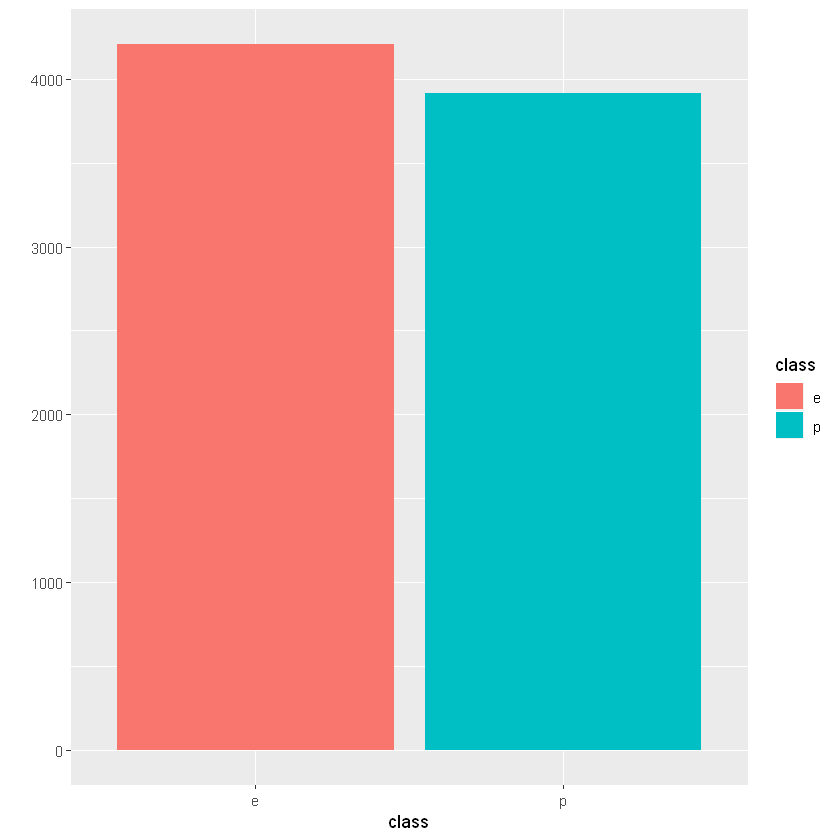

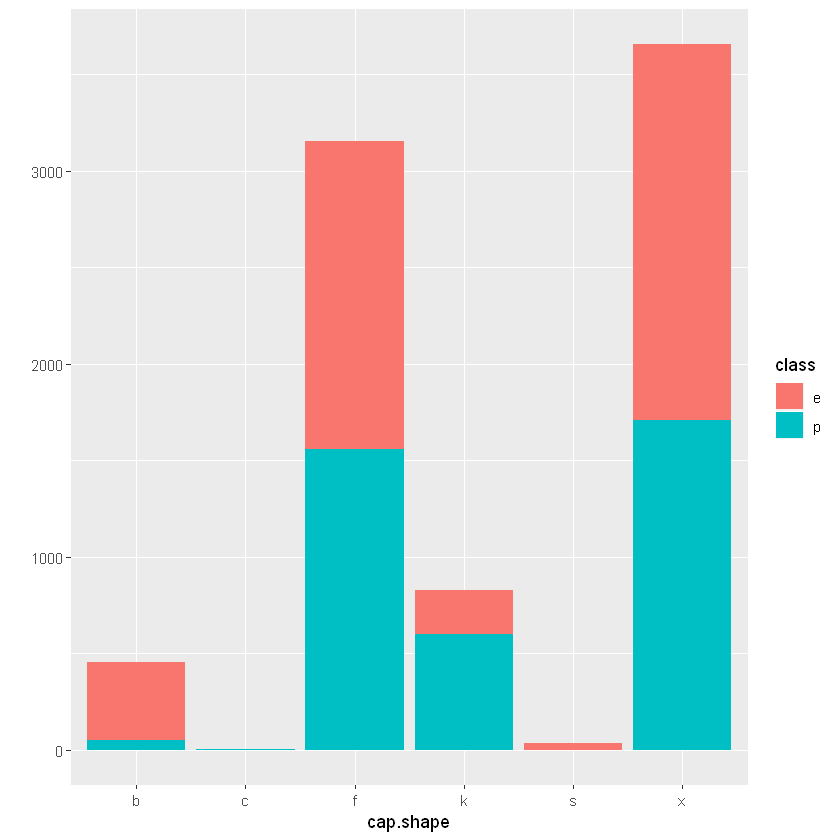

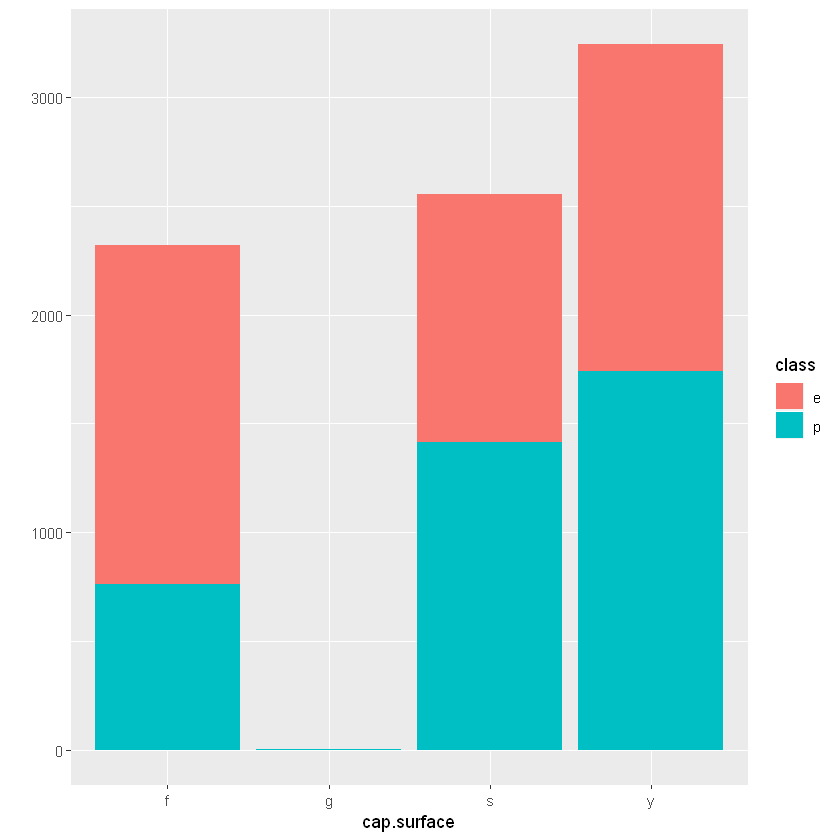

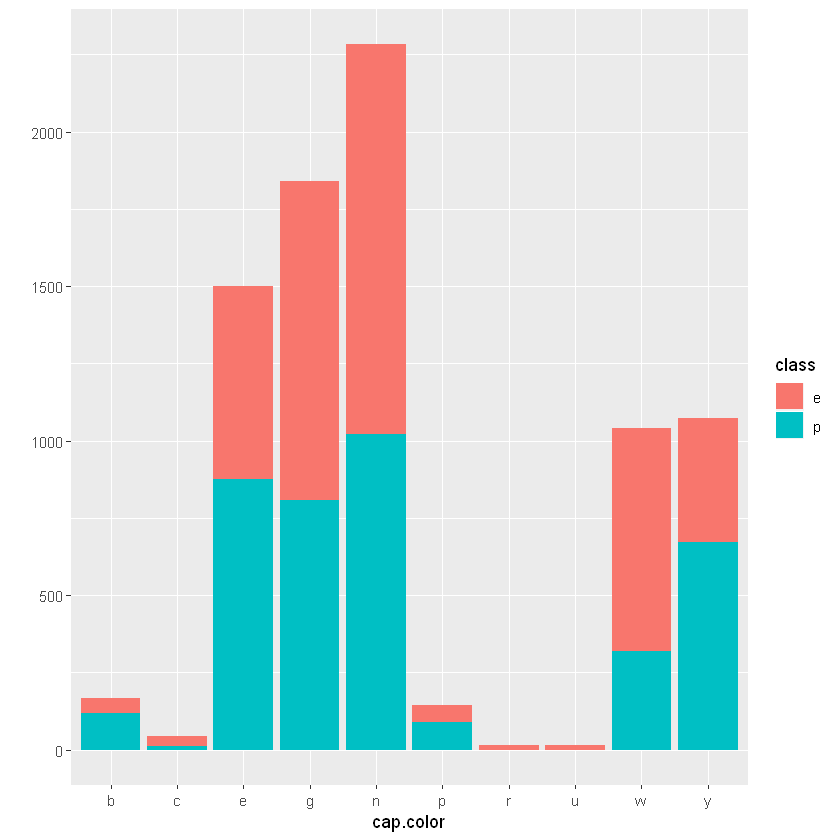

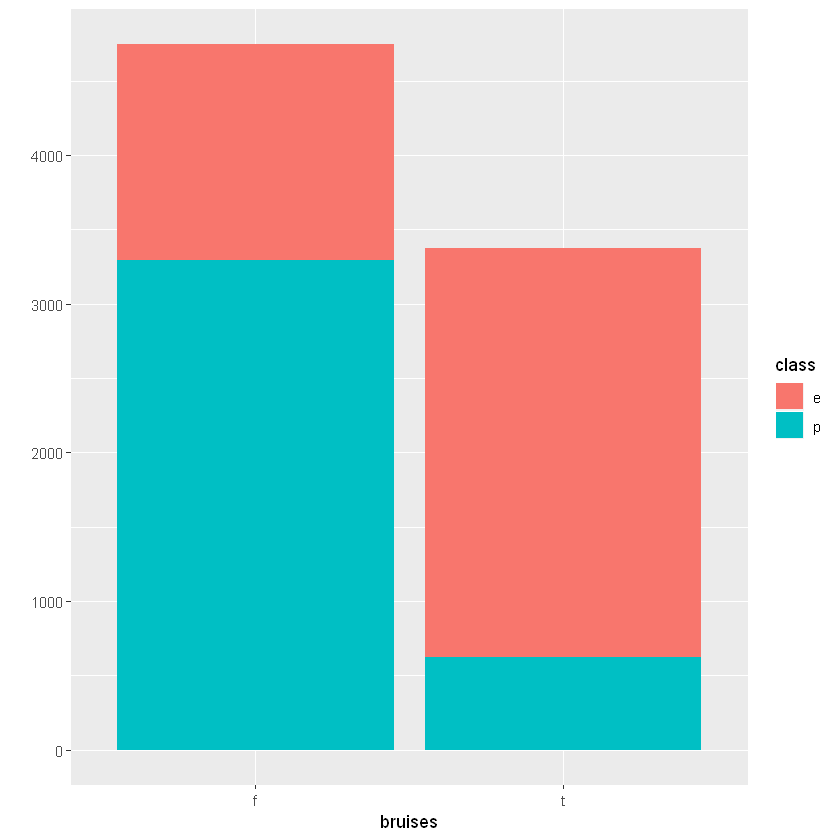

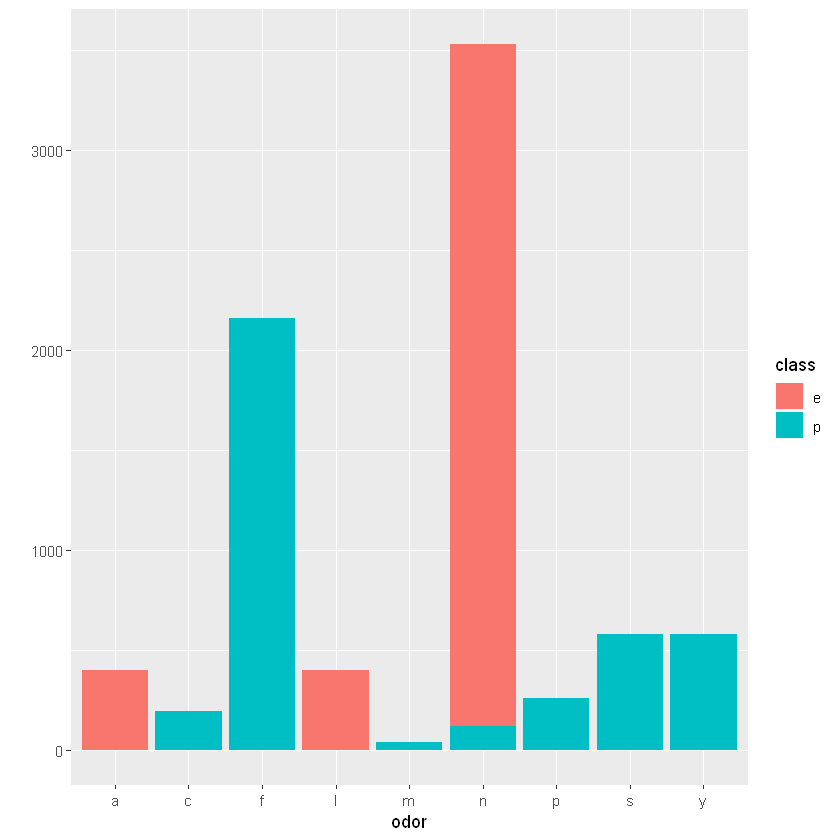

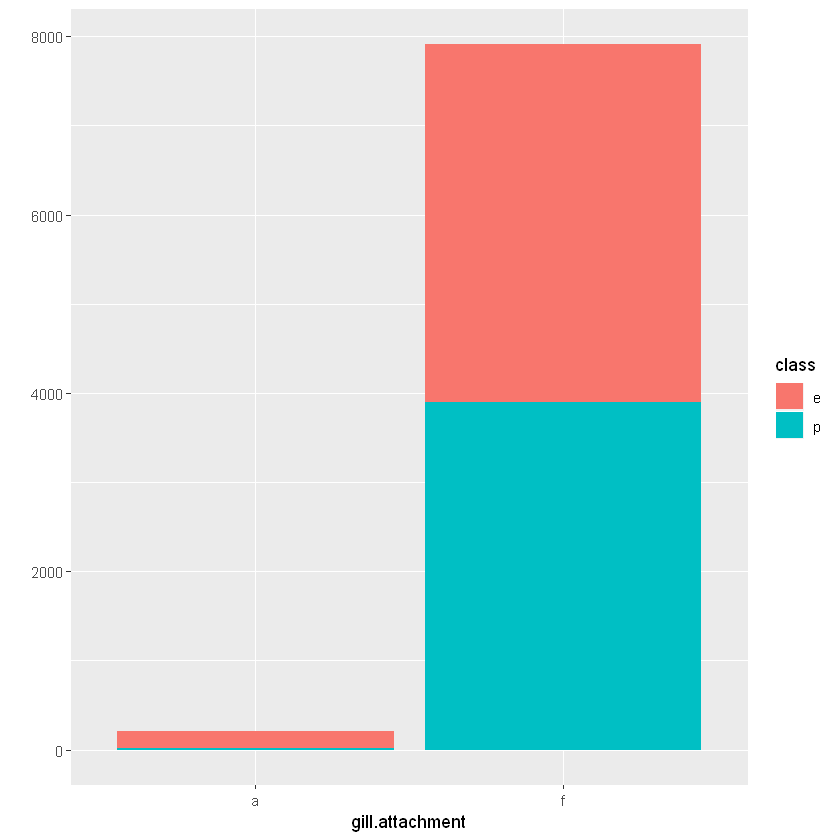

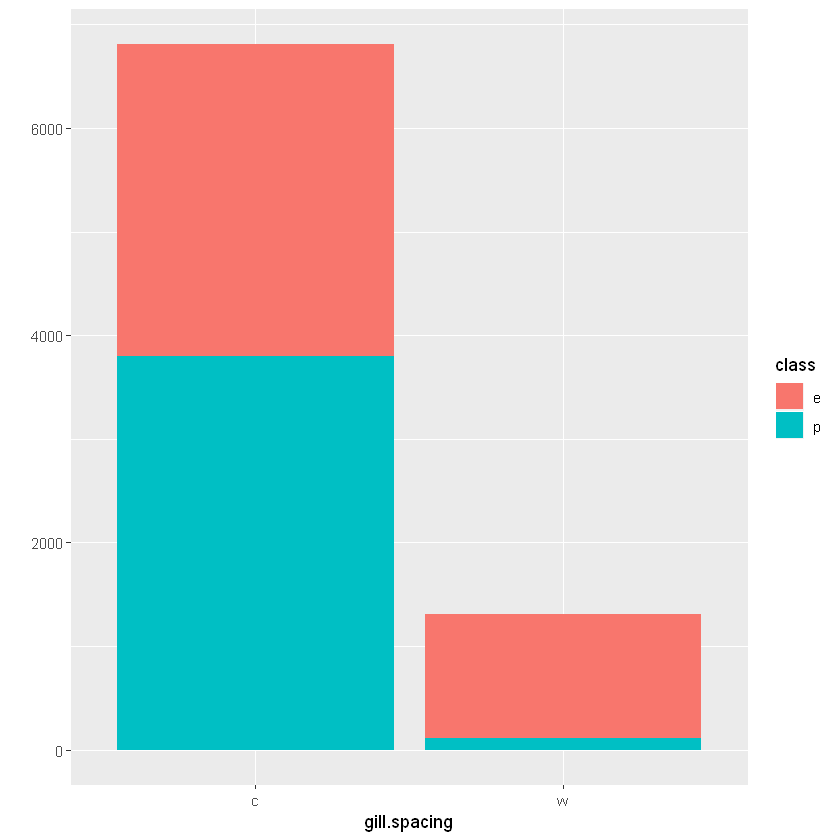

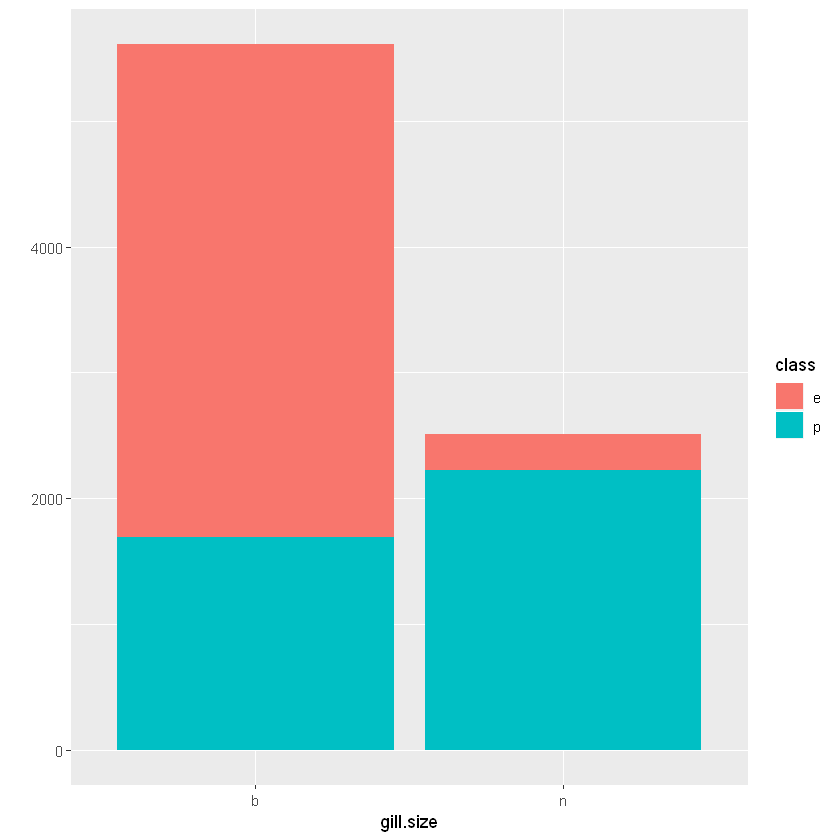

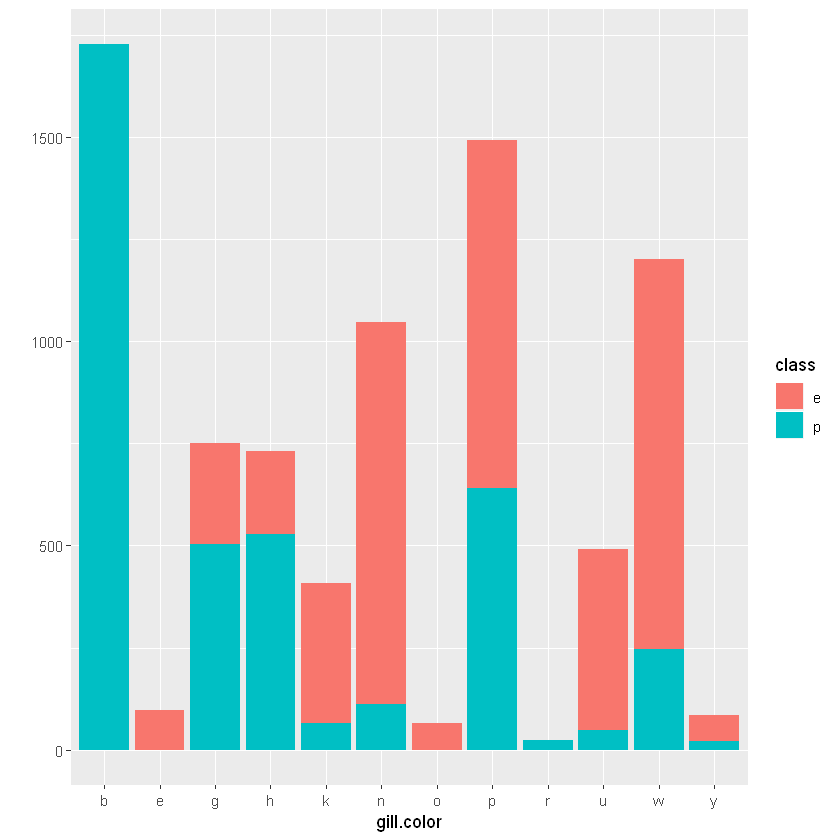

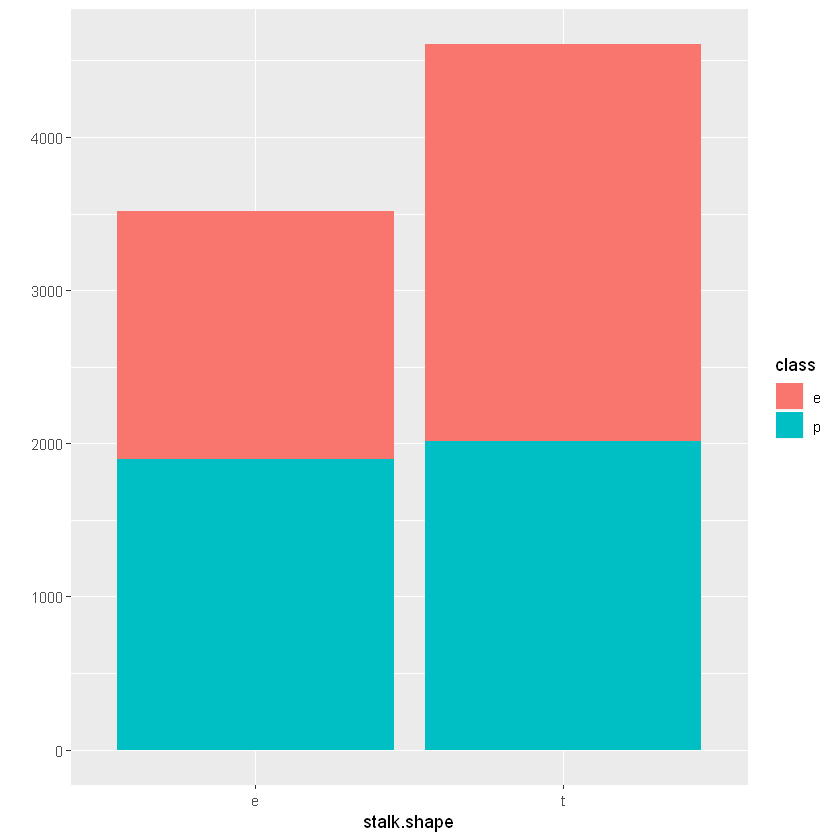

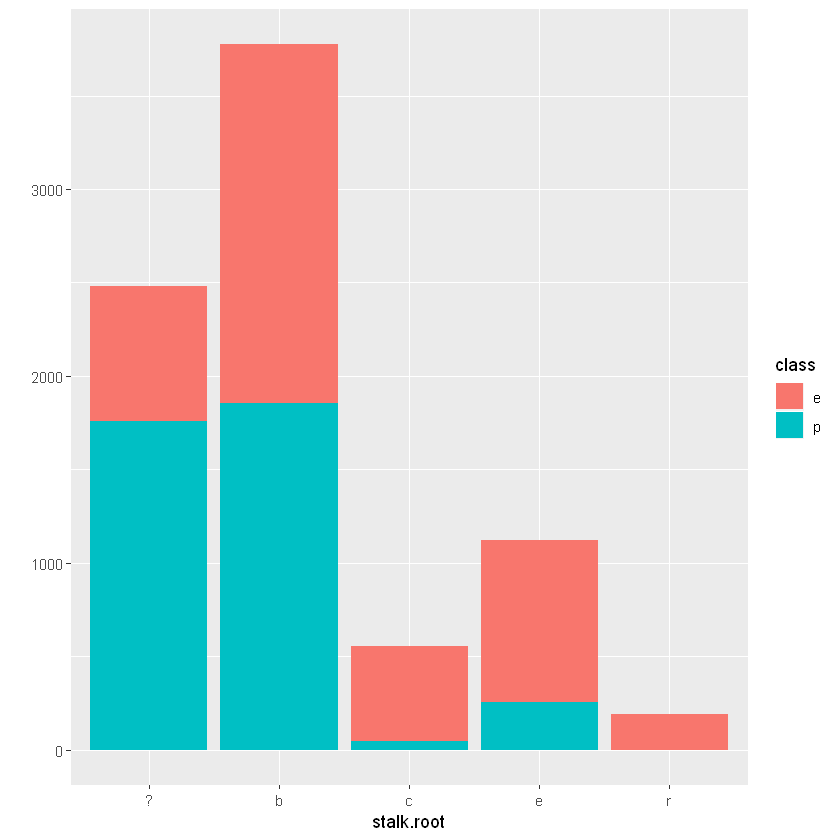

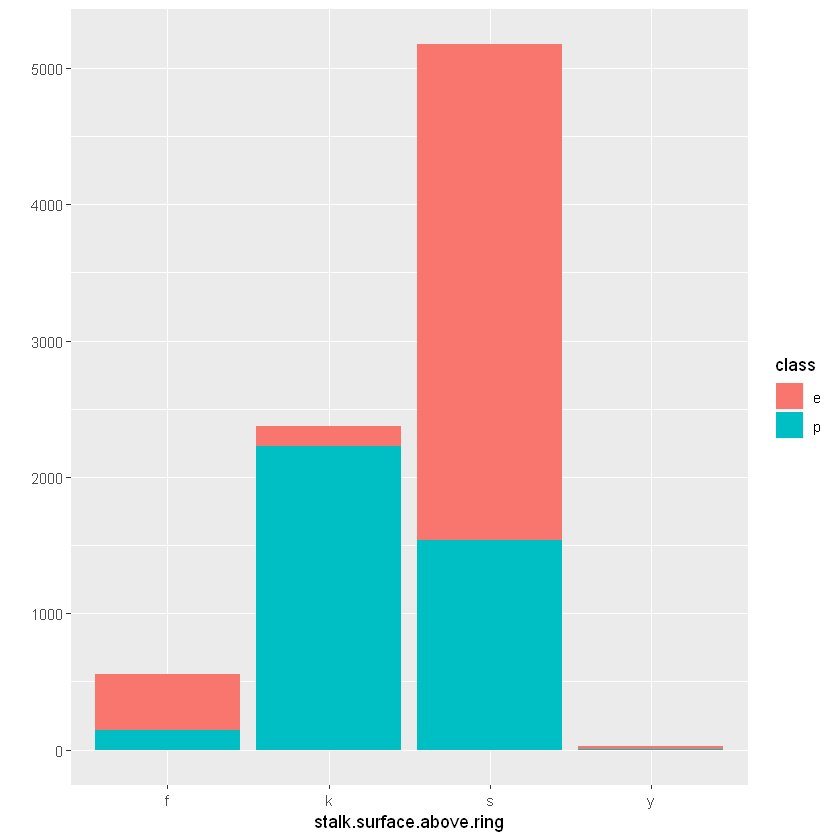

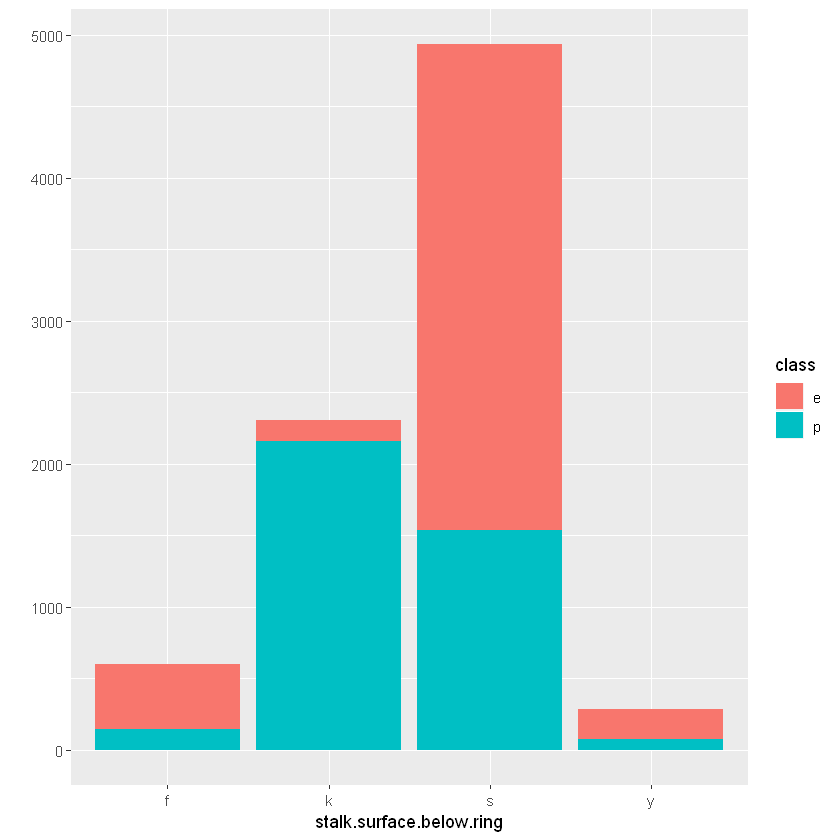

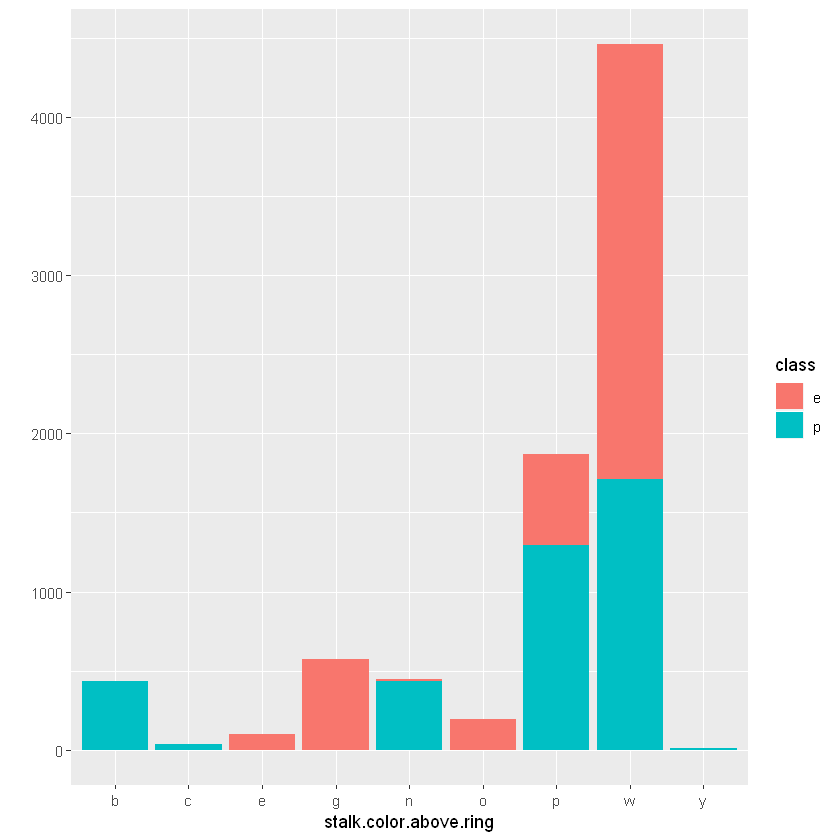

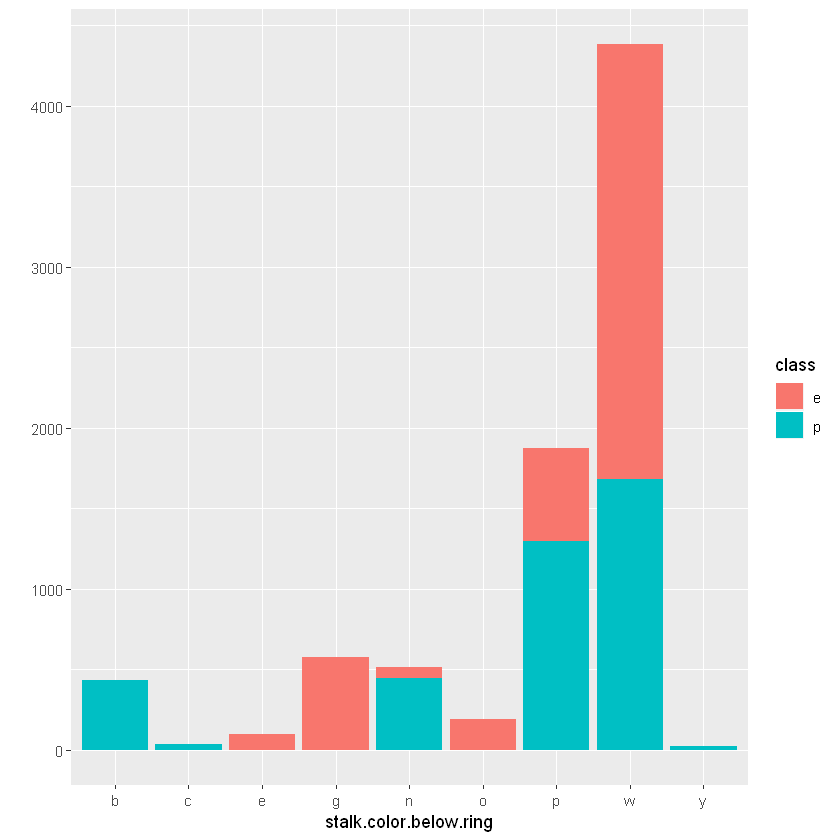

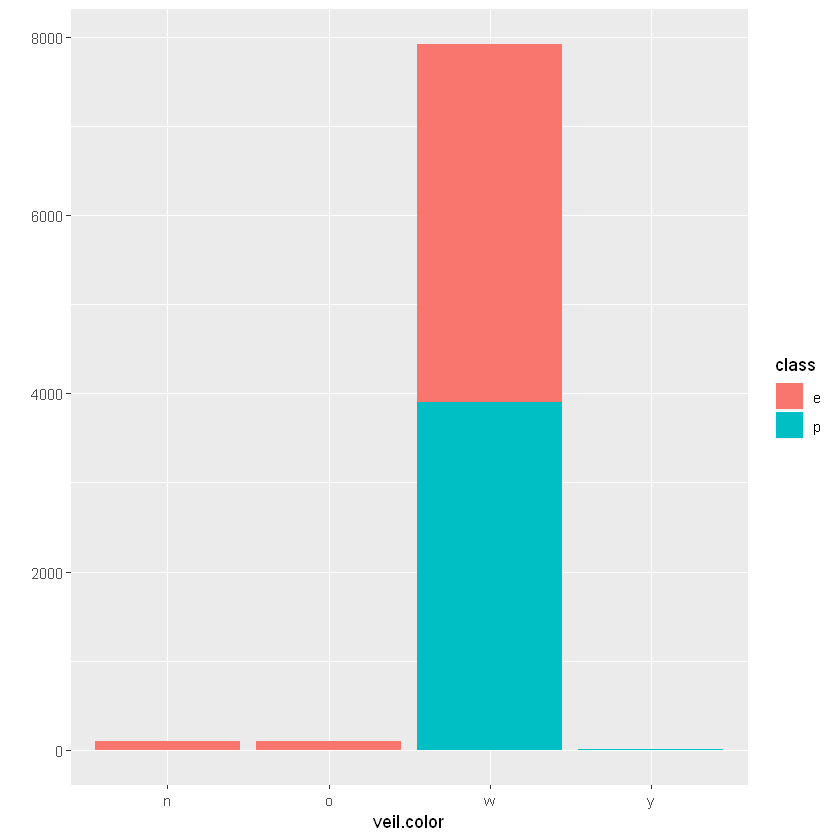

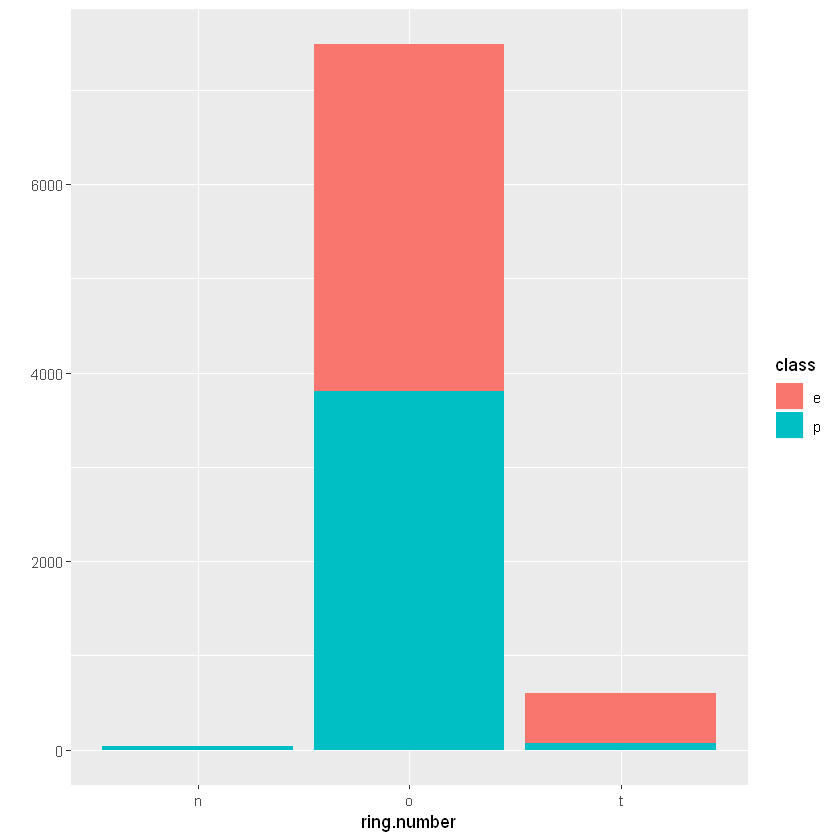

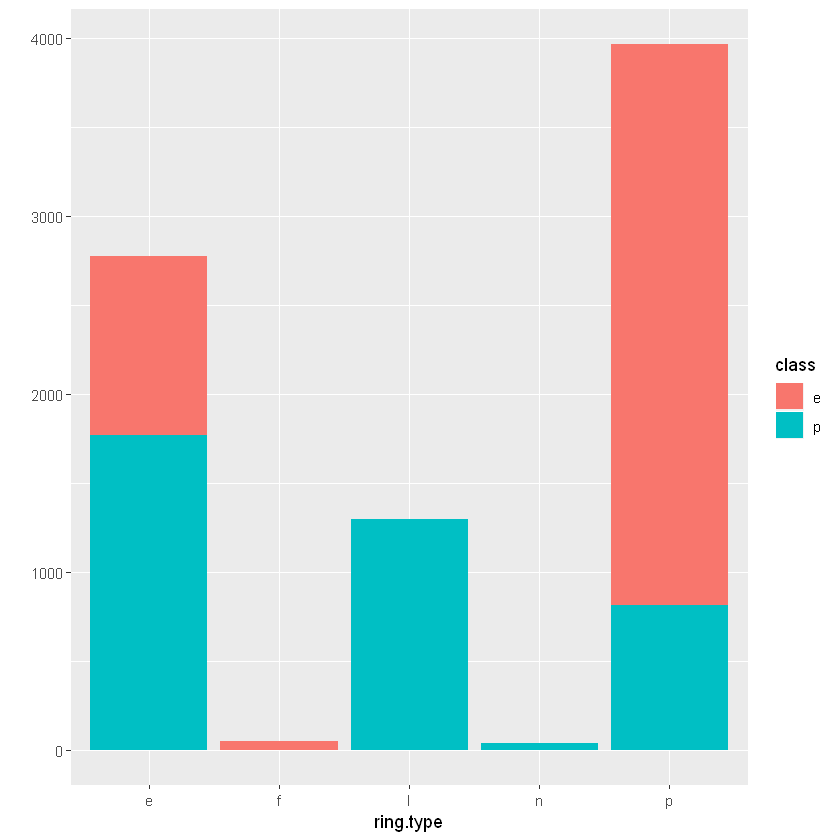

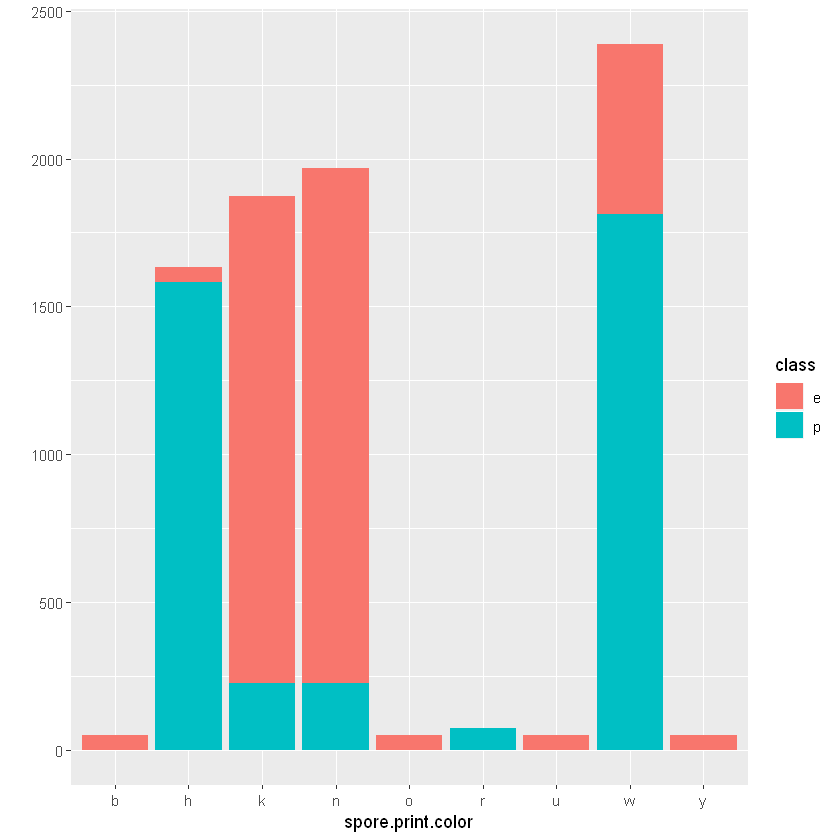

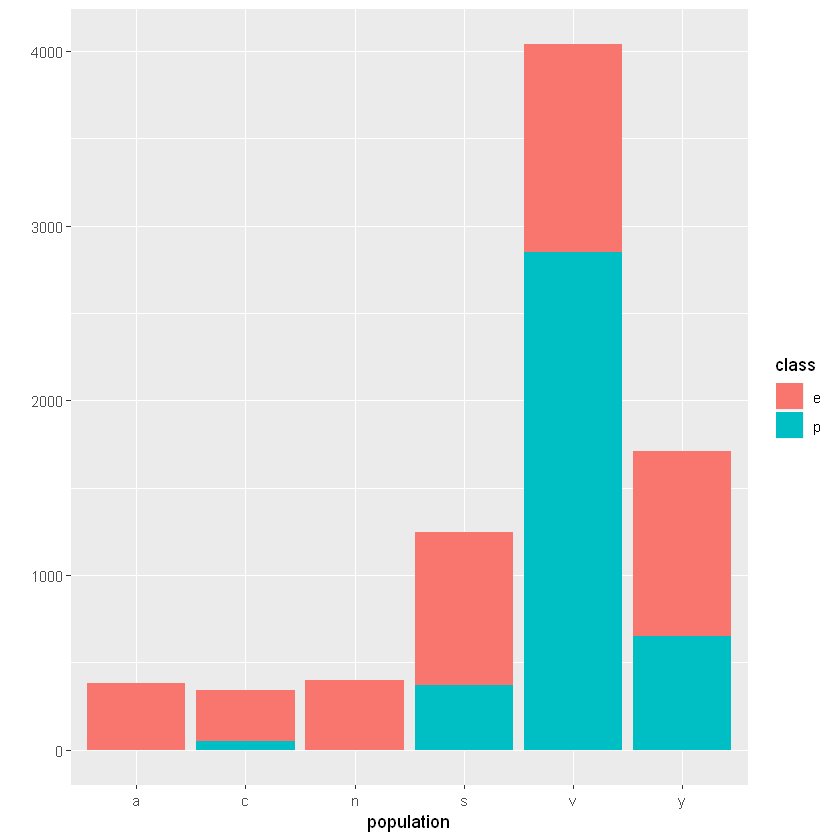

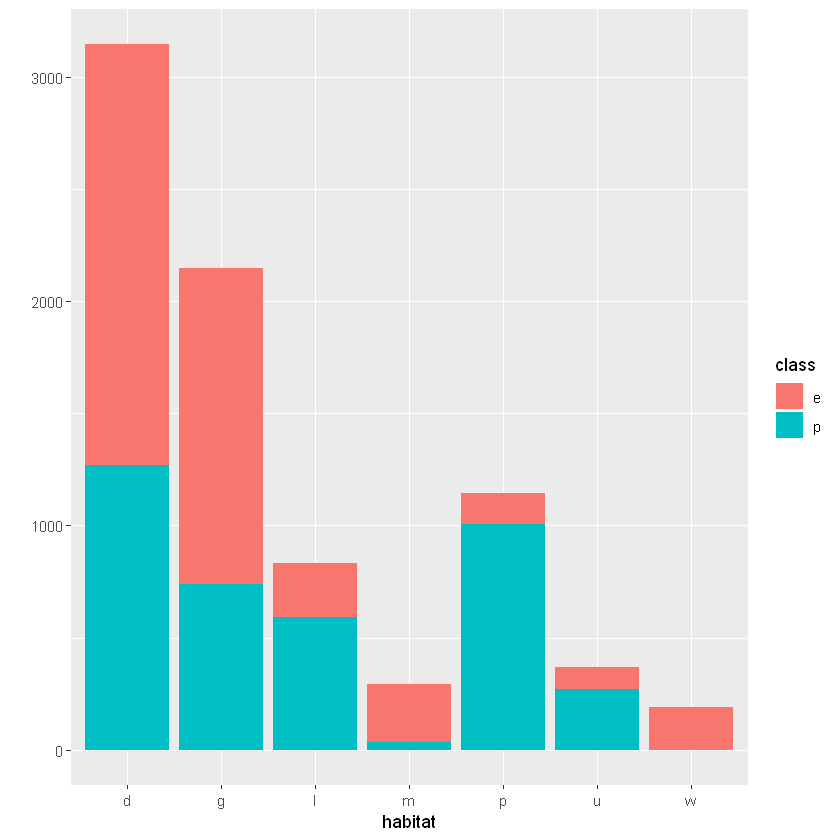

In [9]:
for ( i in seq(1,length( data ),1) ) print(qplot(data[,i], data = data,xlab=names(data[i]), fill = class,geom=c('bar')))

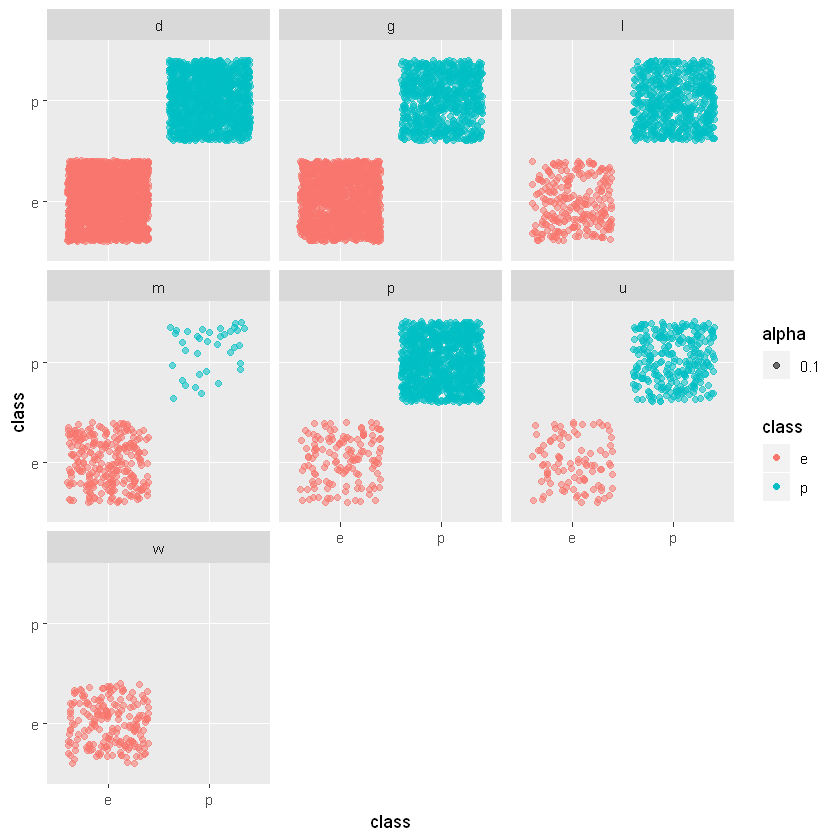

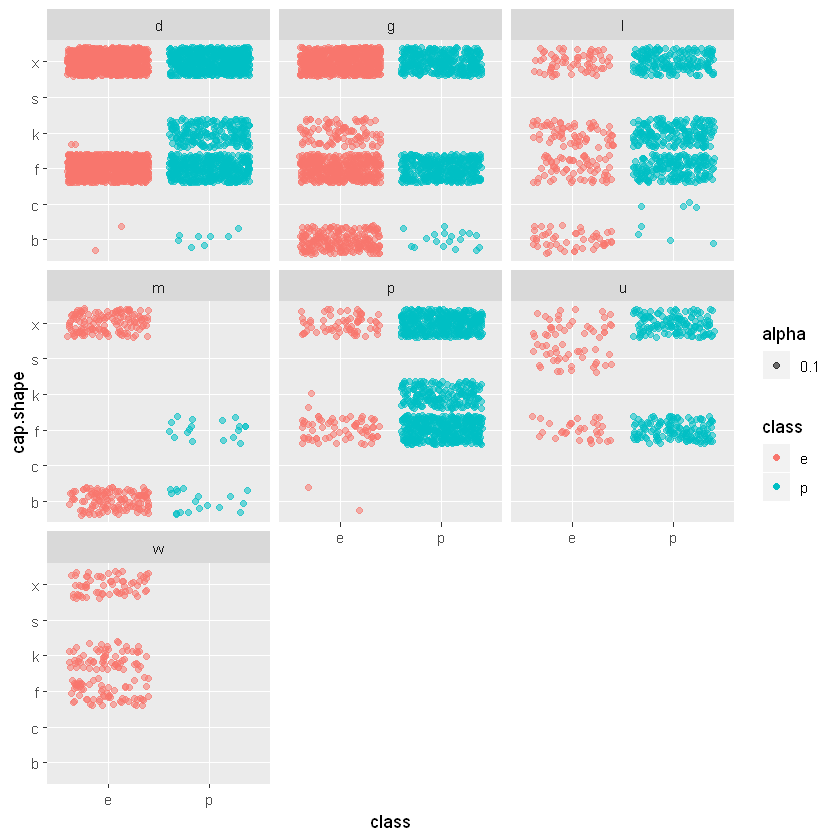

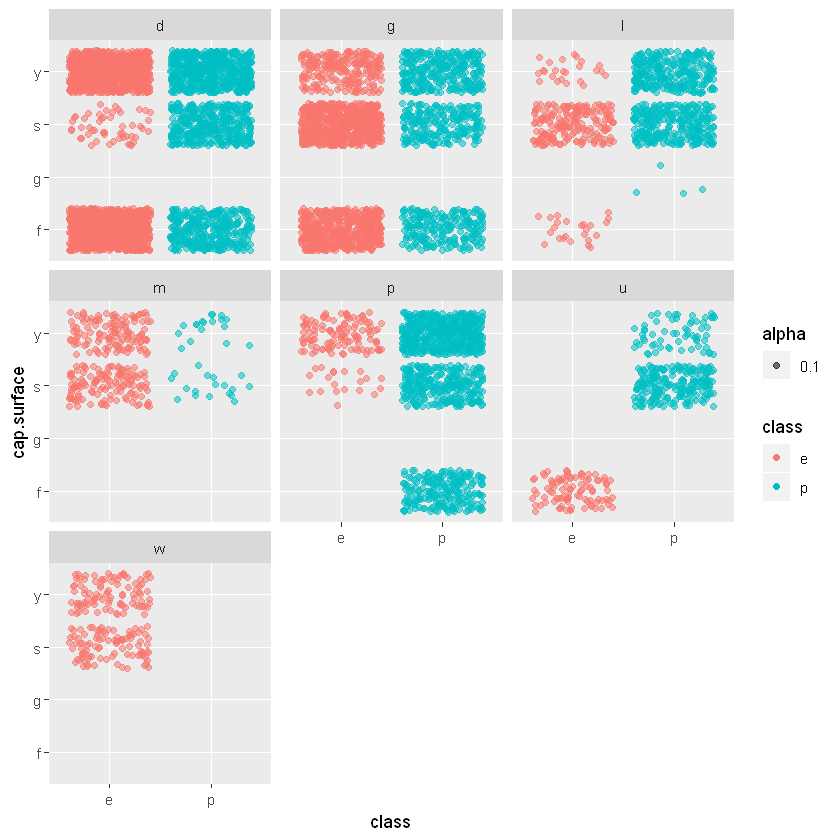

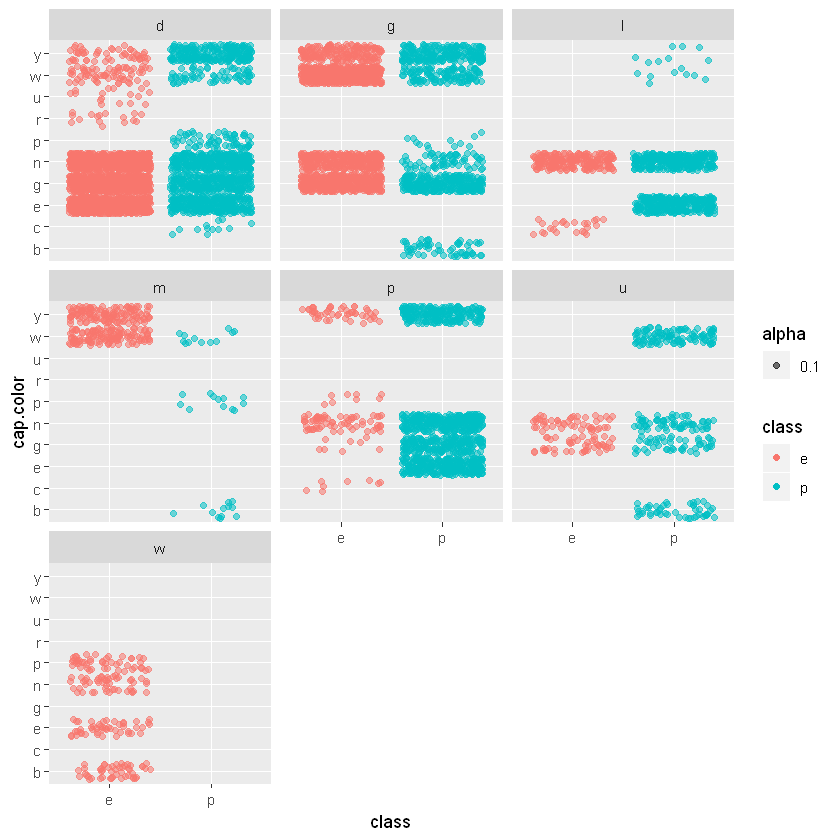

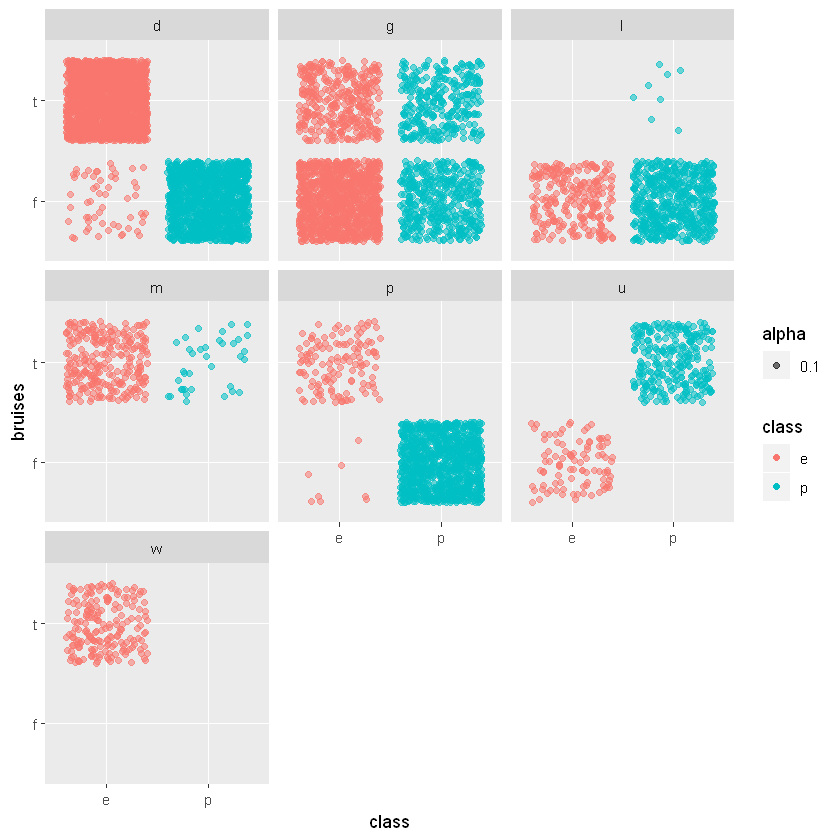

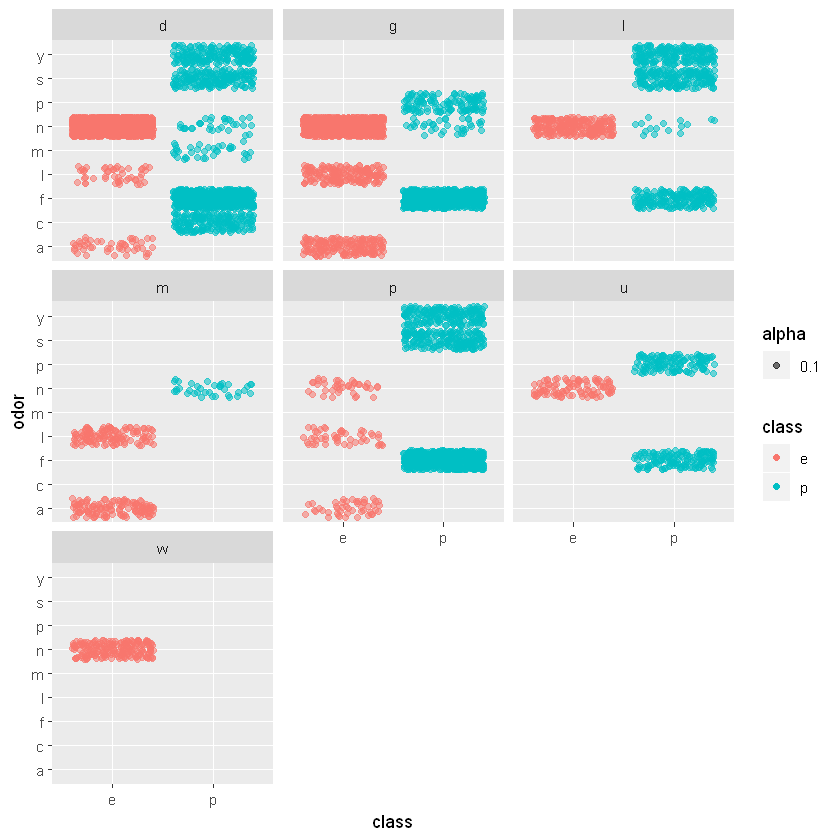

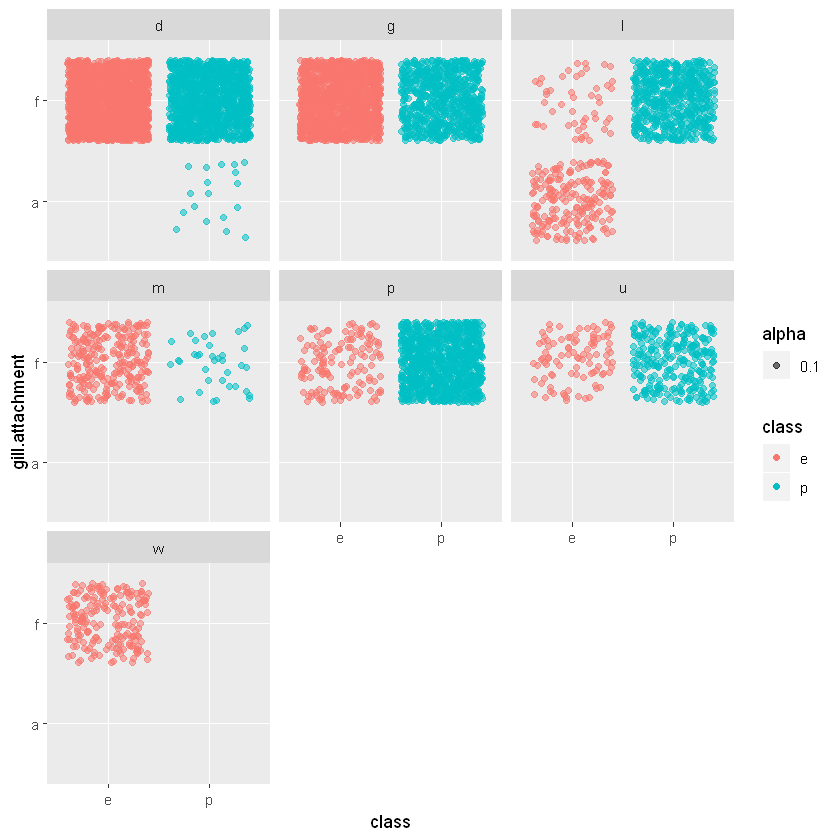

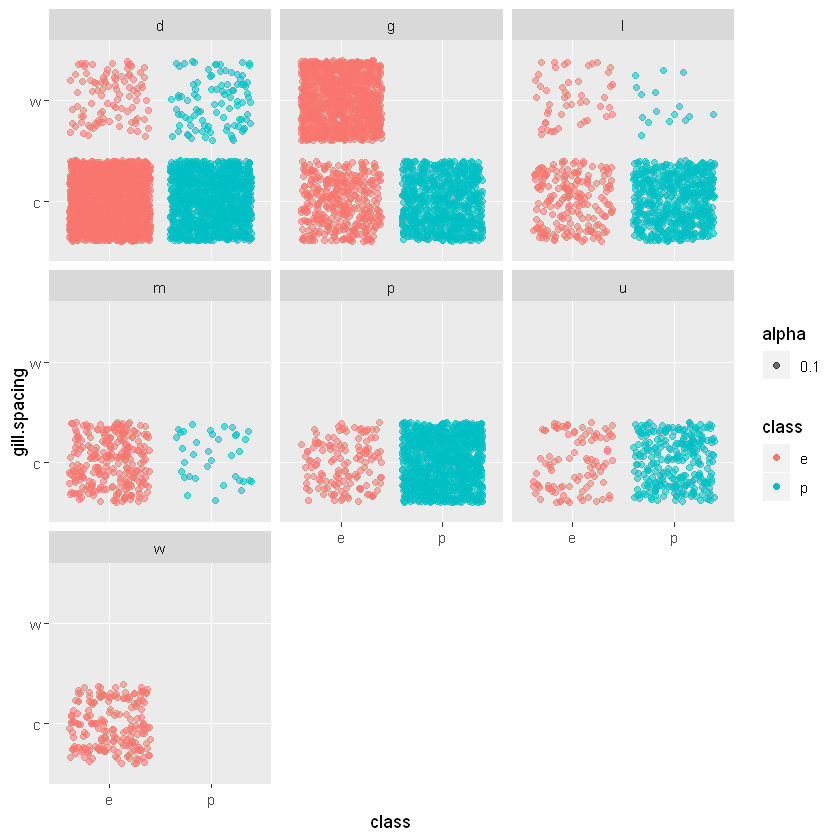

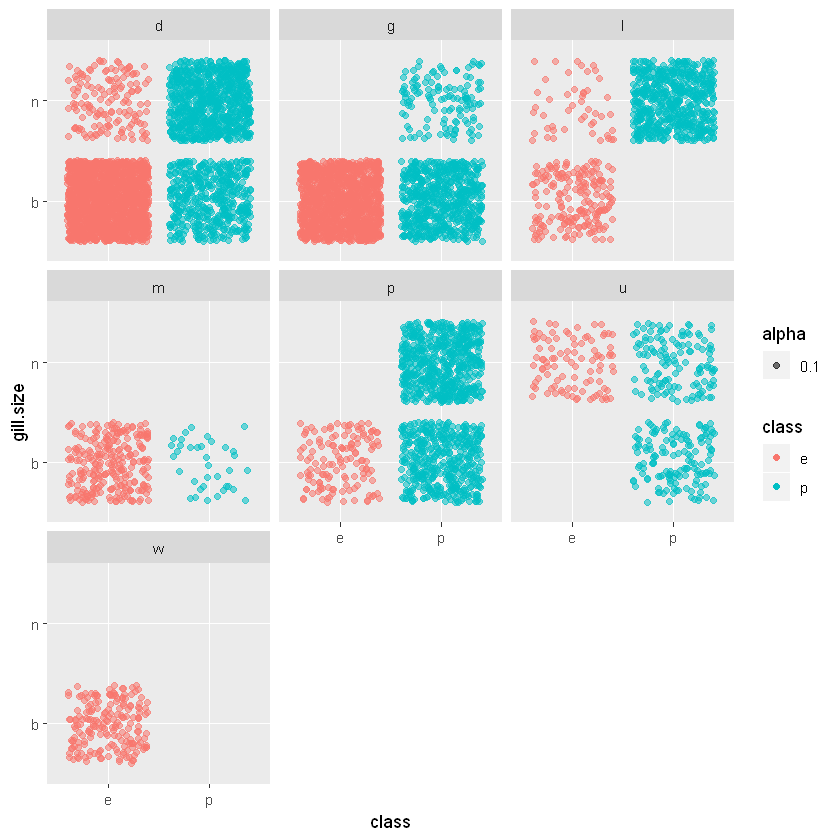

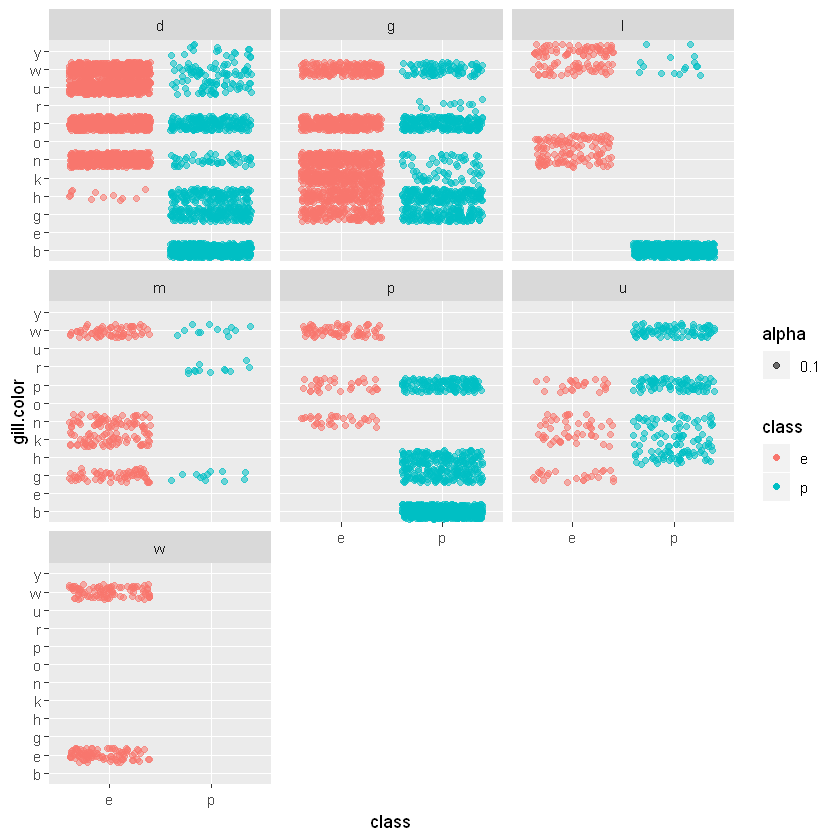

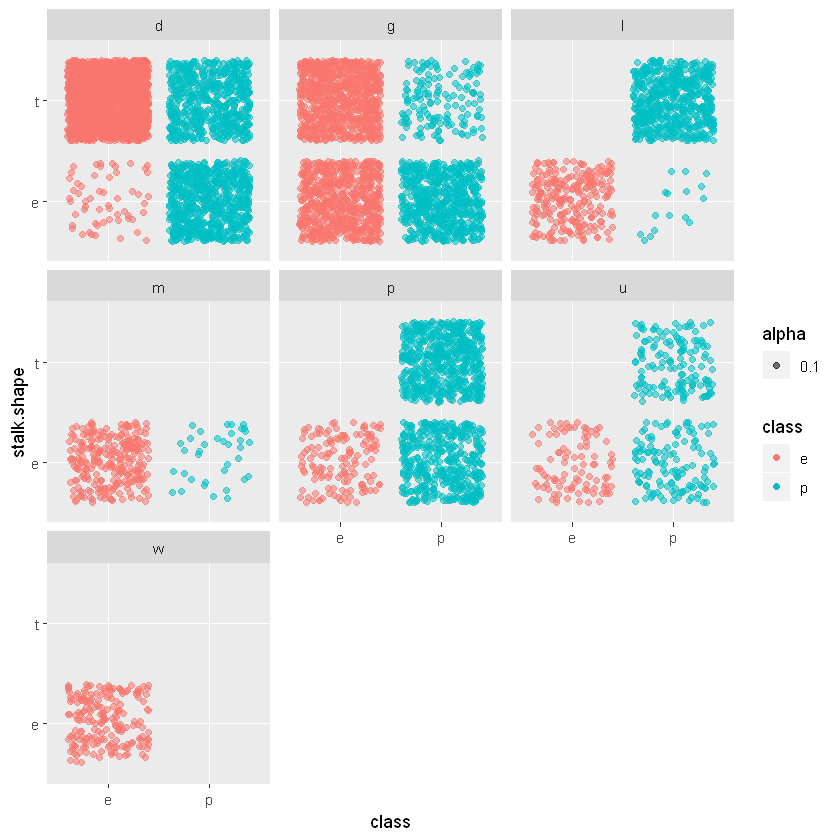

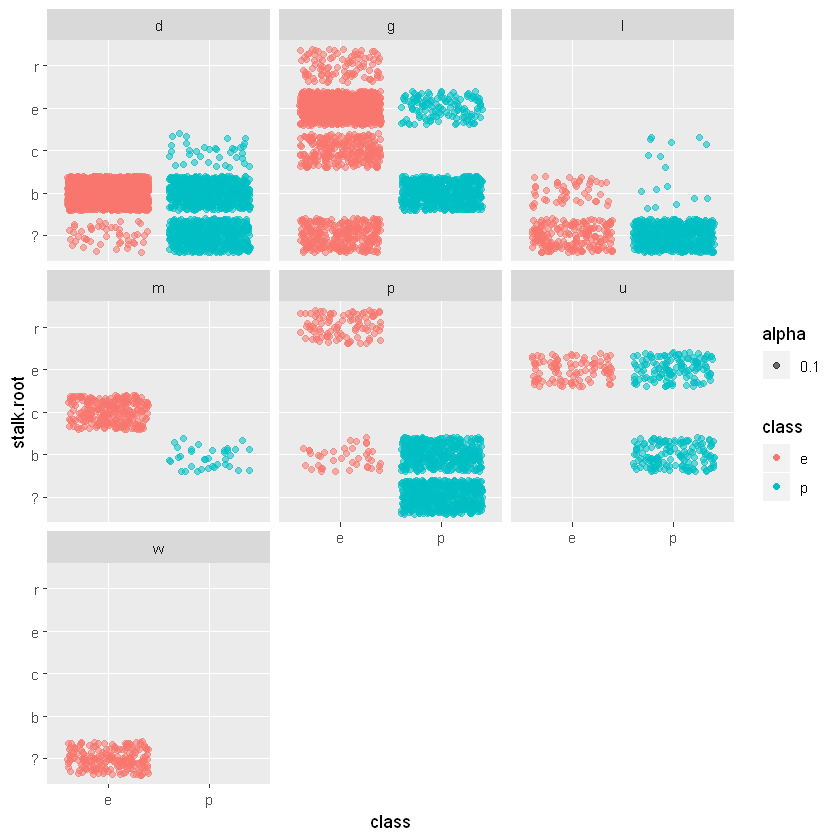

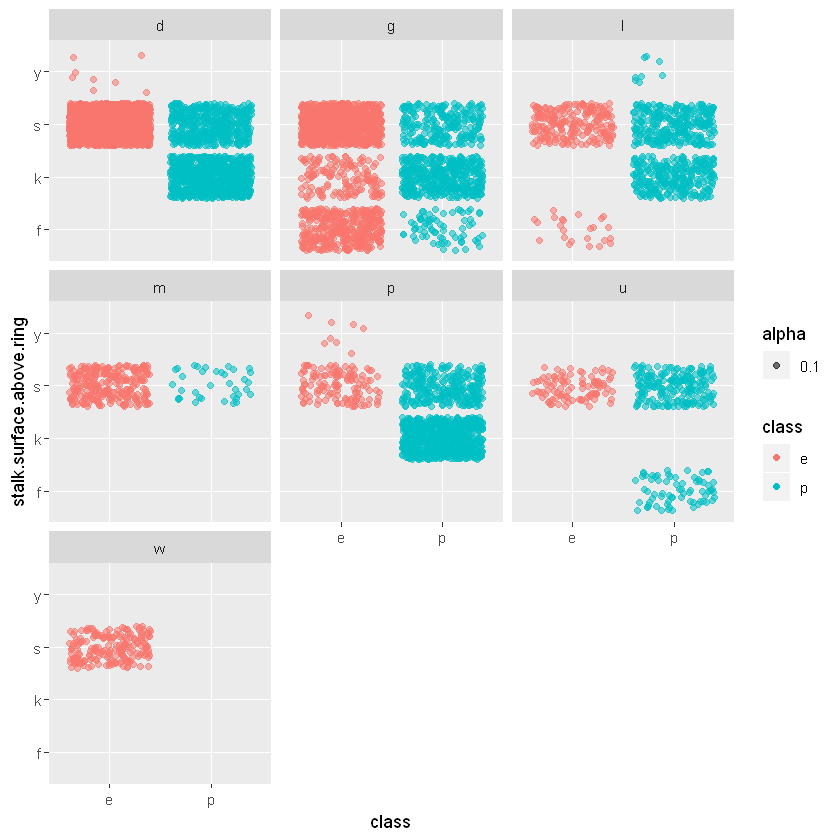

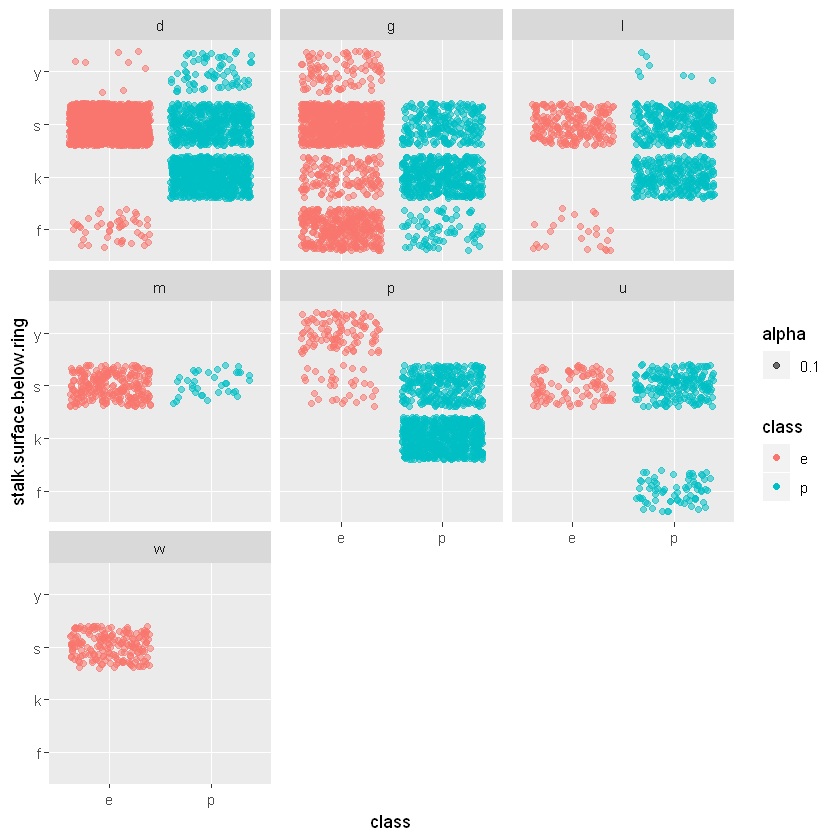

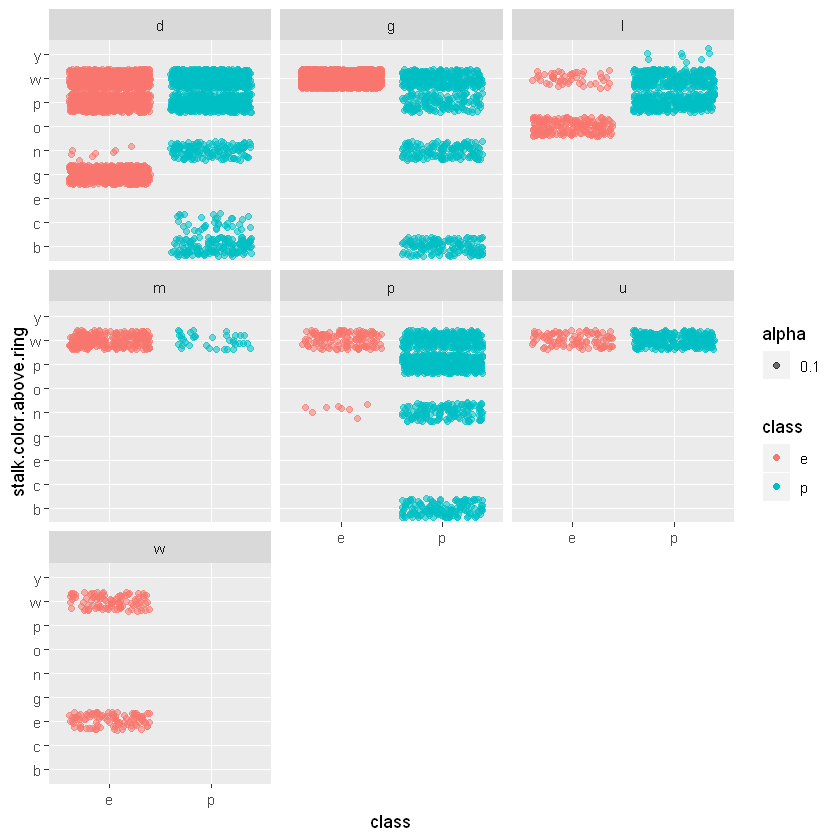

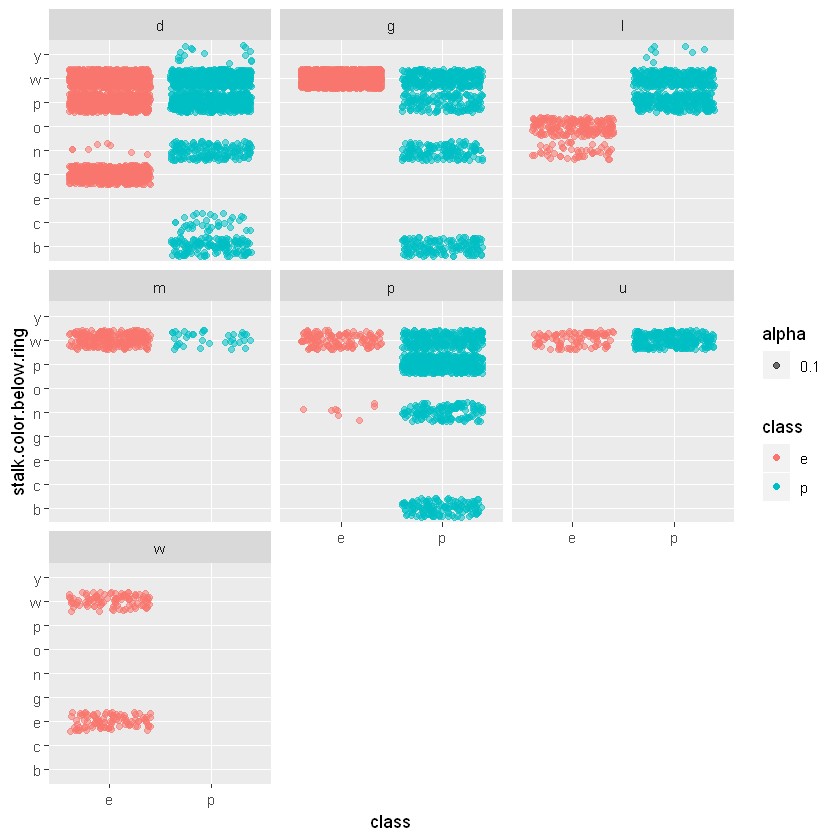

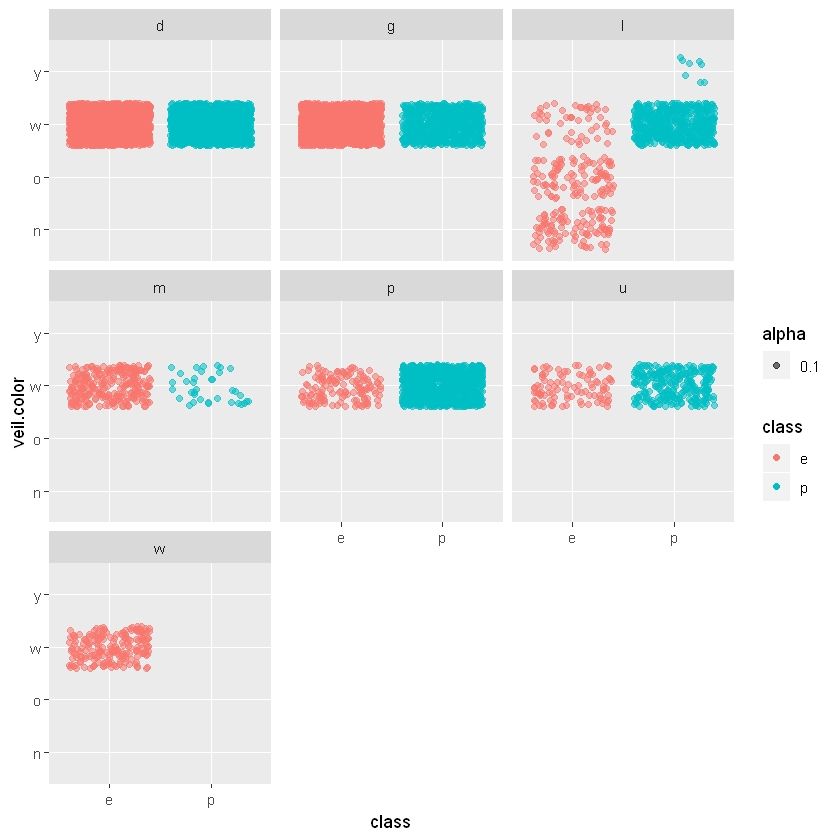

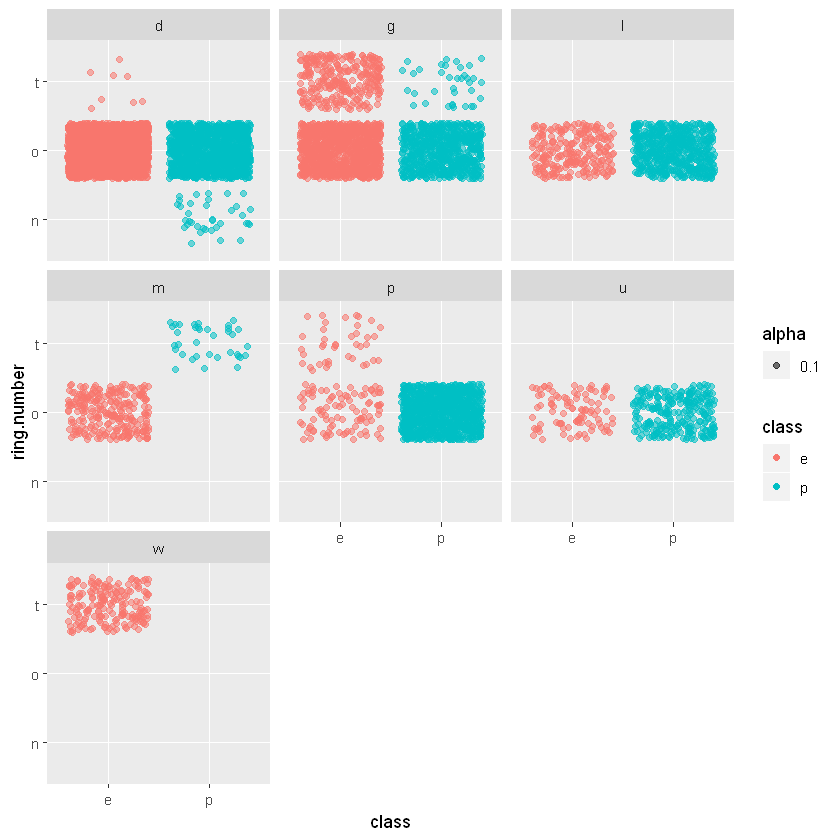

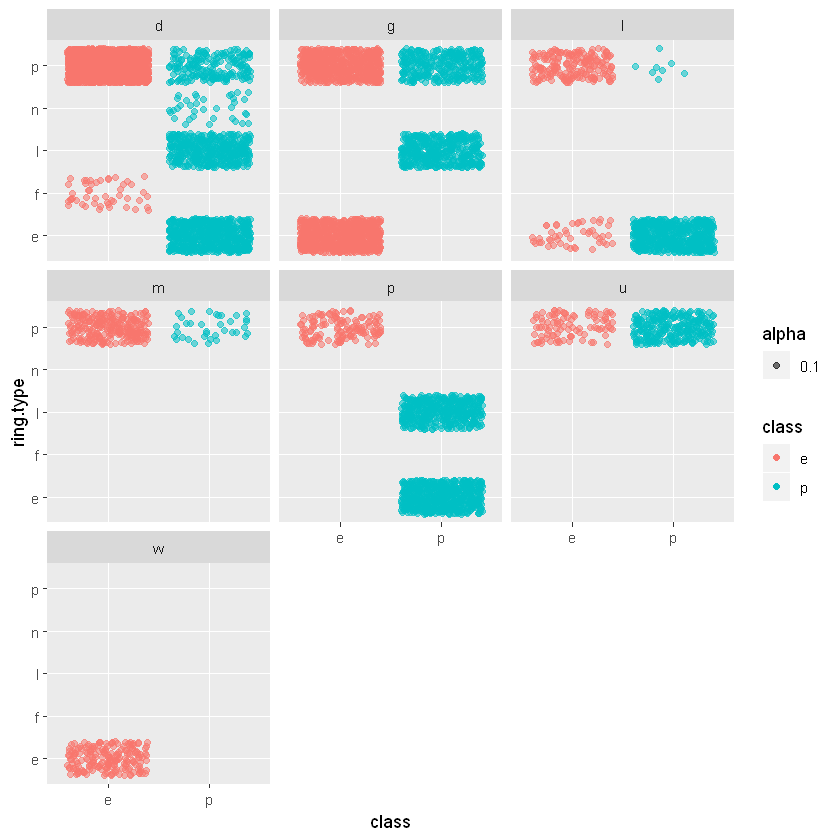

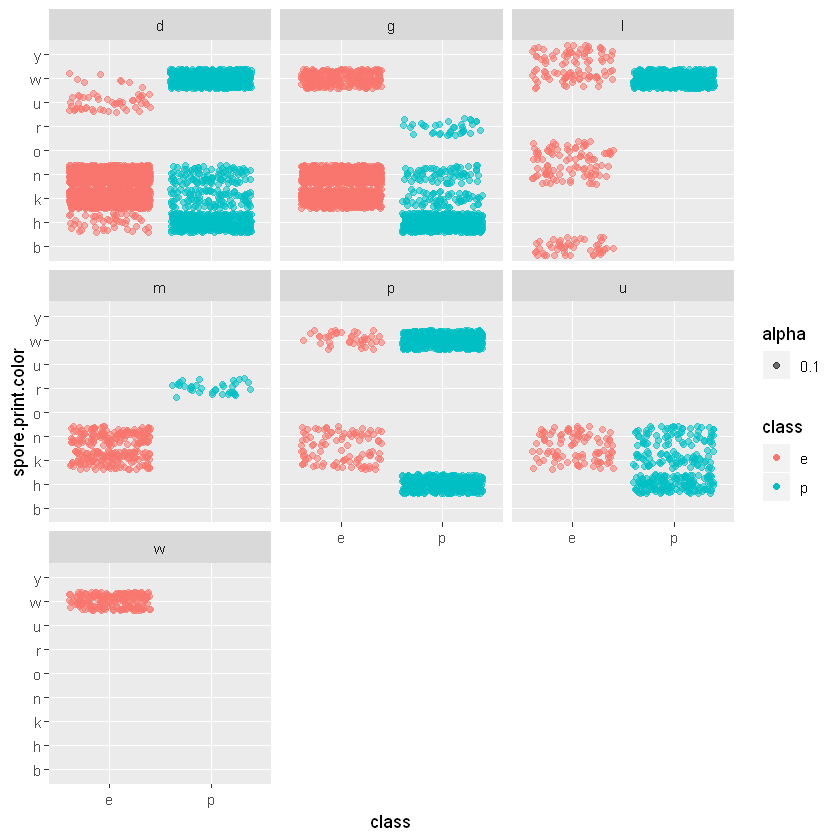

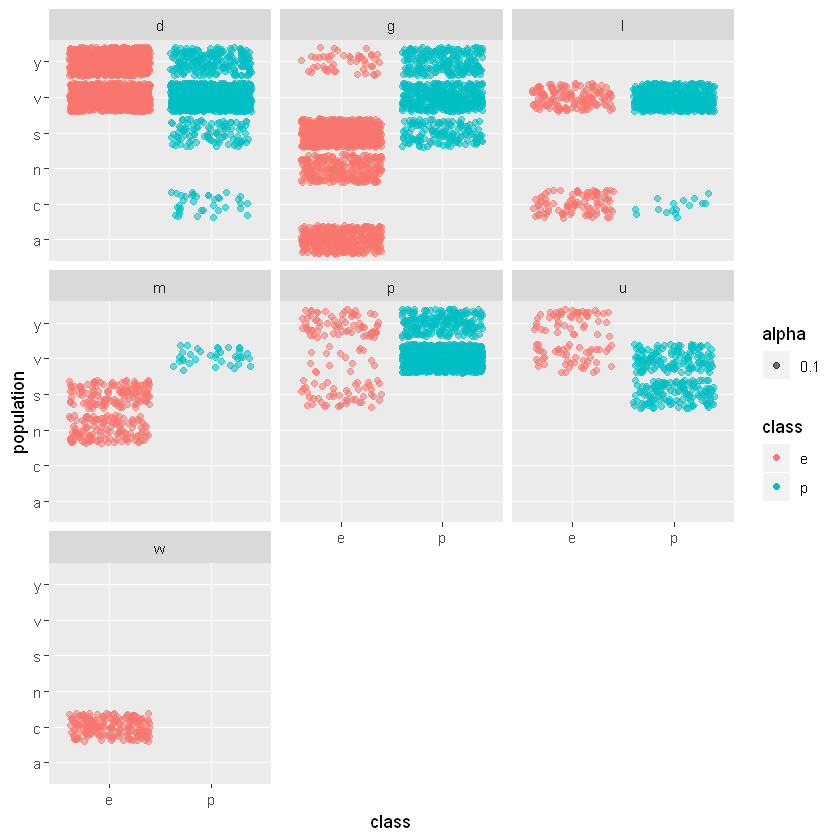

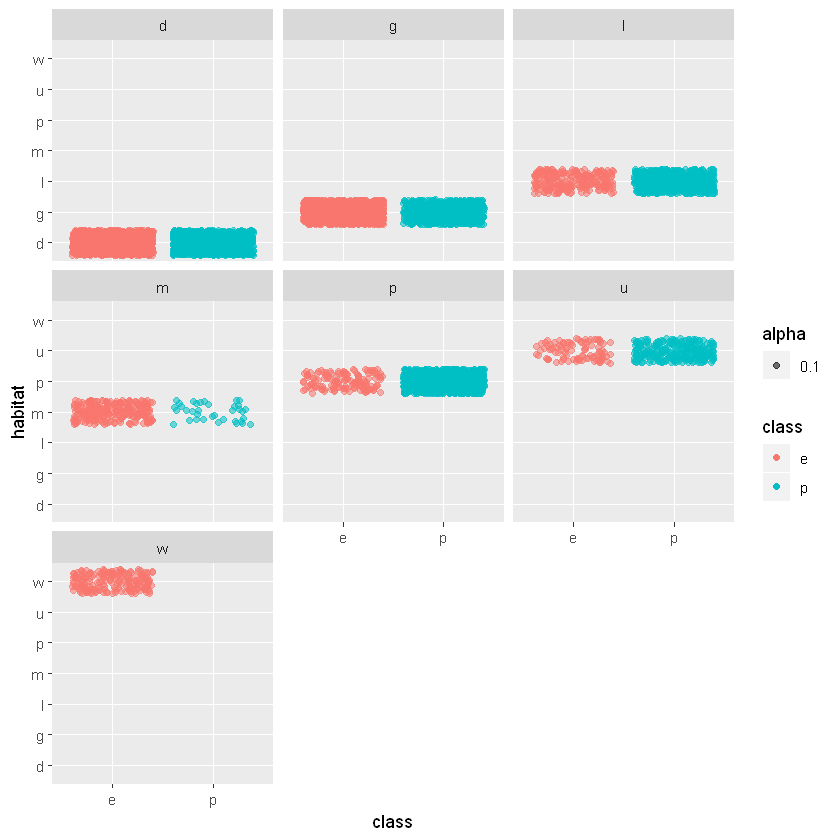

In [10]:
for ( i in seq(1,length( data ),1) ) print(qplot(class,data[,i], data = data,color = class, facets = ~habitat, ylab = names(data[i]),geom = c("jitter"),alpha = 0.1))

# Label Encoding

In [11]:
DF <- as.data.frame(unclass(data))
convert<-sapply(DF,is.factor)
d1<-sapply(DF[,convert],unclass)    
data<-cbind(d1[,!convert],d1)        

head(data)

class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.color,ring.number,ring.type,spore.print.color,population,habitat
2,6,3,5,2,7,2,1,2,5,...,3,3,8,8,3,2,5,3,4,6
1,6,3,10,2,1,2,1,1,5,...,3,3,8,8,3,2,5,4,3,2
1,1,3,9,2,4,2,1,1,6,...,3,3,8,8,3,2,5,4,3,4
2,6,4,9,2,7,2,1,2,6,...,3,3,8,8,3,2,5,3,4,6
1,6,3,4,1,6,2,2,1,5,...,3,3,8,8,3,2,1,4,1,2
1,6,4,10,2,1,2,1,1,6,...,3,3,8,8,3,2,5,3,3,2


In [12]:
data <- data.frame(data)

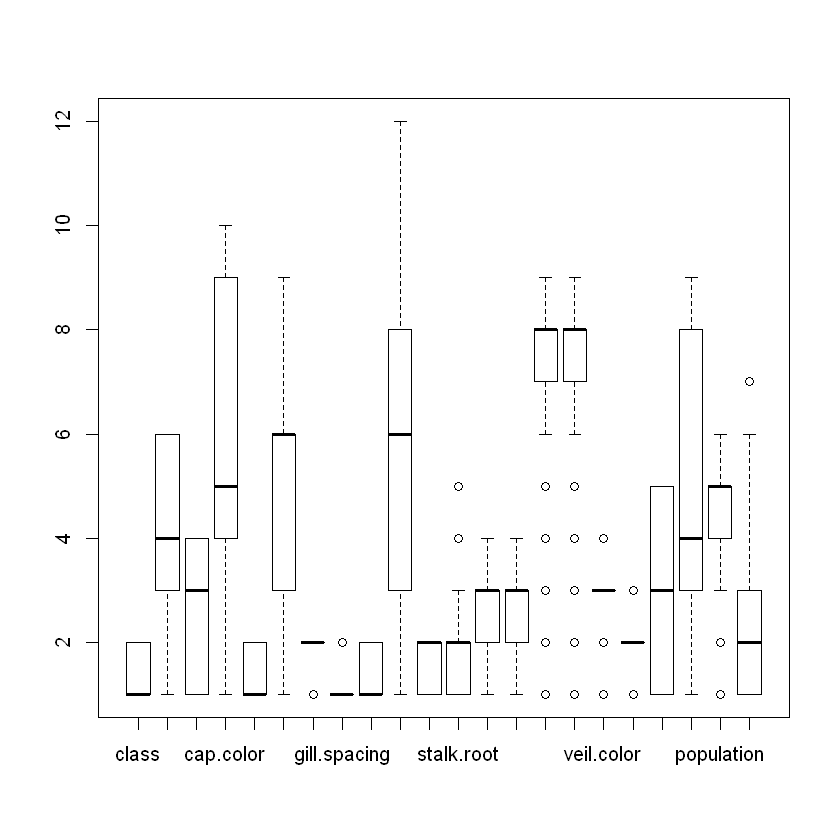

In [13]:
boxplot(data)

In [14]:
data$class = ifelse(data$class == 1,0,1)

In [15]:
str(data)

'data.frame':	8124 obs. of  22 variables:
 $ class                   : num  1 0 0 1 0 0 0 0 1 0 ...
 $ cap.shape               : int  6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : int  3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : int  5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : int  2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : int  7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : int  1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : int  2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : int  5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : int  1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.root              : int  4 3 3 4 4 3 3 3 4 3 ...
 $ stalk.surface.above.ring: int  3 3 3 3 3 3 3 3 3 3 ...
 $ stalk.surface.below.ring: int  3 3 3 3 3 3 3 3 3 3 ...
 $ stalk.color.above.ring  : int  8 8 8 8 8 8 8 8 8 8 ...
 $ stalk.color.below.ring  : int  8 8 8 8 8 8 8 8 8 8 ...
 $ veil.color              

## train test conversion

In [16]:
smp_size = floor(nrow(data)*0.7)
train_data = sample(nrow(data),size=smp_size)
set.seed(12345)
traindata = data[train_data,]
testdata = data[-train_data,]

In [17]:
nrow(data)

[1] 8124

In [18]:
nrow(traindata)

[1] 5686

In [19]:
nrow(testdata)

[1] 2438

## Logistic classification

In [20]:
logistic_model <- glm(class ~ .,data = traindata)

In [21]:
summary(logistic_model)


Call:
glm(formula = class ~ ., data = traindata)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.30189  -0.12356  -0.02192   0.10703   1.00361  

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.8733998  0.0695415  12.559  < 2e-16 ***
cap.shape                -0.0039584  0.0021716  -1.823 0.068386 .  
cap.surface               0.0252555  0.0030983   8.152 4.39e-16 ***
cap.color                -0.0007403  0.0016820  -0.440 0.659836    
bruises                  -0.3441224  0.0168834 -20.382  < 2e-16 ***
odor                     -0.0228704  0.0021909 -10.439  < 2e-16 ***
gill.attachment          -0.0493329  0.0587267  -0.840 0.400920    
gill.spacing             -0.4671397  0.0183701 -25.429  < 2e-16 ***
gill.size                 0.5305803  0.0146598  36.193  < 2e-16 ***
gill.color               -0.0086970  0.0014549  -5.978 2.40e-09 ***
stalk.shape              -0.0533203  0.0146604  -3.637 0.000278

In [22]:
trainpred <- predict(logistic_model,traindata,type = 'response')
prediction = predict(logistic_model,testdata,type = 'response')

In [24]:
traindata$trainprediction = ifelse(trainpred < 0.1,0,1)
accuracy(traindata$trainprediction,traindata$class,0.1)

$accuracyNum
   ypred
y      0    1
  0 1390   23
  1 1574 2699

$accuracyPer
   ypred
y       0     1
  0 98.37  1.63
  1 36.84 63.16

$overallAcc
[1] 71.91


In [25]:
testdata$prediction = ifelse(prediction < 0.1,0,1)
accuracy(testdata$prediction,testdata$class,0.1)

$accuracyNum
   ypred
y      0    1
  0  606    4
  1  638 1190

$accuracyPer
   ypred
y       0     1
  0 99.34  0.66
  1 34.90 65.10

$overallAcc
[1] 73.67


In [26]:
roc(testdata$prediction,testdata$class) 

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testdata$prediction, predictor = testdata$class)

Data: testdata$class in 610 controls (testdata$prediction 0) < 1828 cases (testdata$prediction 1).
Area under the curve: 0.8222

In [27]:
traindata$trainprediction = ifelse(trainpred < 0.2,0,1)
accuracy(traindata$trainprediction,traindata$class,0.2)

$accuracyNum
   ypred
y      0    1
  0 2367   64
  1  597 2658

$accuracyPer
   ypred
y       0     1
  0 97.37  2.63
  1 18.34 81.66

$overallAcc
[1] 88.37


In [28]:
testdata$prediction = ifelse(prediction < 0.2,0,1)
accuracy(testdata$prediction,testdata$class,0.2)

$accuracyNum
   ypred
y      0    1
  0  993   15
  1  251 1179

$accuracyPer
   ypred
y       0     1
  0 98.51  1.49
  1 17.55 82.45

$overallAcc
[1] 89.09


In [29]:
roc(testdata$prediction,testdata$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testdata$prediction, predictor = testdata$class)

Data: testdata$class in 1008 controls (testdata$prediction 0) < 1430 cases (testdata$prediction 1).
Area under the curve: 0.9048

In [30]:
traindata$trainprediction = ifelse(trainpred < 0.3,0,1)
accuracy(traindata$trainprediction,traindata$class,0.3)

$accuracyNum
   ypred
y      0    1
  0 2784  103
  1  180 2619

$accuracyPer
   ypred
y       0     1
  0 96.43  3.57
  1  6.43 93.57

$overallAcc
[1] 95.02


In [31]:
testdata$prediction = ifelse(prediction < 0.3,0,1)
accuracy(testdata$prediction,testdata$class,0.3)

$accuracyNum
   ypred
y      0    1
  0 1170   27
  1   74 1167

$accuracyPer
   ypred
y       0     1
  0 97.74  2.26
  1  5.96 94.04

$overallAcc
[1] 95.86


In [32]:
roc(testdata$prediction,testdata$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testdata$prediction, predictor = testdata$class)

Data: testdata$class in 1197 controls (testdata$prediction 0) < 1241 cases (testdata$prediction 1).
Area under the curve: 0.9589

In [33]:
traindata$trainprediction = ifelse(trainpred < 0.4,0,1)
accuracy(traindata$trainprediction,traindata$class,0.4)

$accuracyNum
   ypred
y      0    1
  0 2822  153
  1  142 2569

$accuracyPer
   ypred
y       0     1
  0 94.86  5.14
  1  5.24 94.76

$overallAcc
[1] 94.81


In [38]:
testdata$prediction = ifelse(prediction < 0.5,0,1)
accuracy(testdata$prediction,testdata$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1197   79
  1   47 1115

$accuracyPer
   ypred
y       0     1
  0 93.81  6.19
  1  4.04 95.96

$overallAcc
[1] 94.83


Sensitivity or Recall <- TP/(TP+FN) = 1115/(1115+47) = 0.9596

Specificity <- TN / (TN+FP) = 1197/(1197+79) = 0.9381

Precision <-  TP / (TP+FP) = 1115/(1115+79) = 0.9338

F1 Score <- 2*(Recall * Precision) / (Recall + Precision) = 2*(0.9596*0.9381)/(0.9596+0.9381) = o.9783

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1115+1197)/(1115+79+47+1197) = 0.9483

In [39]:
roc(testdata$prediction,testdata$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testdata$prediction, predictor = testdata$class)

Data: testdata$class in 1276 controls (testdata$prediction 0) < 1162 cases (testdata$prediction 1).
Area under the curve: 0.9488

gini co-efficient <- 2*AUC - 1 = 2 * 0.9488 -1 = 0.8976

## Decisiontree

In [40]:
traindata$trainprediction <- NULL
testdata$prediction <- NULL

In [41]:
tree <- rpart(class~.,data=traindata,method = 'class')

In [42]:
tree

n= 5686 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 5686 2722 0 (0.52128034 0.47871966)  
   2) gill.color>=4.5 3381  805 0 (0.76190476 0.23809524)  
     4) spore.print.color>=2.5 2894  381 0 (0.86834831 0.13165169)  
       8) gill.size< 1.5 2413   62 0 (0.97430584 0.02569416) *
       9) gill.size>=1.5 481  162 1 (0.33679834 0.66320166)  
        18) stalk.shape>=1.5 72    0 0 (1.00000000 0.00000000) *
        19) stalk.shape< 1.5 409   90 1 (0.22004890 0.77995110)  
          38) habitat>=2.5 188   90 1 (0.47872340 0.52127660)  
            76) bruises< 1.5 97    7 0 (0.92783505 0.07216495) *
            77) bruises>=1.5 91    0 1 (0.00000000 1.00000000) *
          39) habitat< 2.5 221    0 1 (0.00000000 1.00000000) *
     5) spore.print.color< 2.5 487   63 1 (0.12936345 0.87063655)  
      10) odor>=4.5 63    0 0 (1.00000000 0.00000000) *
      11) odor< 4.5 424    0 1 (0.00000000 1.00000000) *
   3) gill.color< 4.5 2305  388 1 (0.16832972 0.831

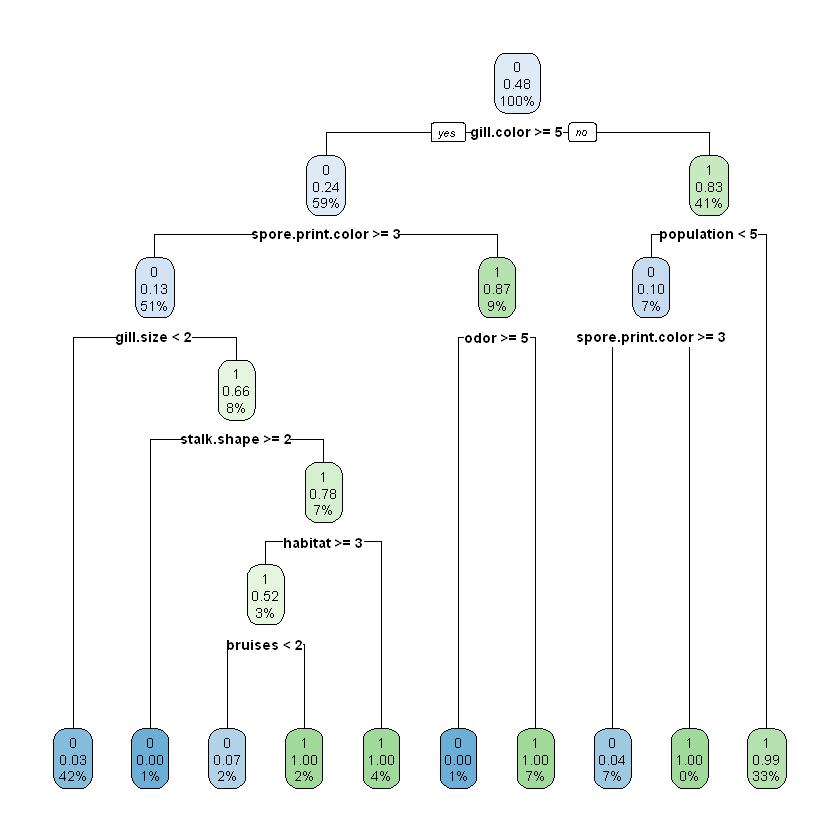

In [43]:
rpart.plot(tree)

In [44]:
testdata$tree_predict <- predict(tree,testdata,type='class')
traindata$predict <-predict(tree,traindata,type='class')

In [45]:
accuracy(traindata$predict,traindata$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2937   83
  1   27 2639

$accuracyPer
   ypred
y       0     1
  0 97.25  2.75
  1  1.01 98.99

$overallAcc
[1] 98.07


In [46]:
accuracy(testdata$tree_predict,testdata$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1235   33
  1    9 1161

$accuracyPer
   ypred
y       0     1
  0 97.40  2.60
  1  0.77 99.23

$overallAcc
[1] 98.28


Sensitivity or Recall <- TP/(TP+FN) = 1161/(1161+9) = 0.9923

Specificity <- TN / (TN+FP) = 1235/(1235+33) = 0.9740

Precision <- TP / (TP+FP) = 1161/(1161+33) = 0.9715

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(0.9923*0.9715)/(0.9923+0.9715) = 0.9818

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1161+1235)/(1161+33+9+1235) = 0.9828

In [47]:
roc(testdata$tree_predict,testdata$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testdata$tree_predict, predictor = testdata$class)

Data: testdata$class in 1268 controls (testdata$tree_predict 0) < 1170 cases (testdata$tree_predict 1).
Area under the curve: 0.9831

gini co-efficient <- 2*AUC - 1 = 2 * 0.9831 -1 = 0.9662

## RandomForest

In [65]:
traindata$predict<- NULL
testdata$tree_predict <- NULL

In [66]:
rnd_model <- randomForest(class ~.,traindata,method='class')

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

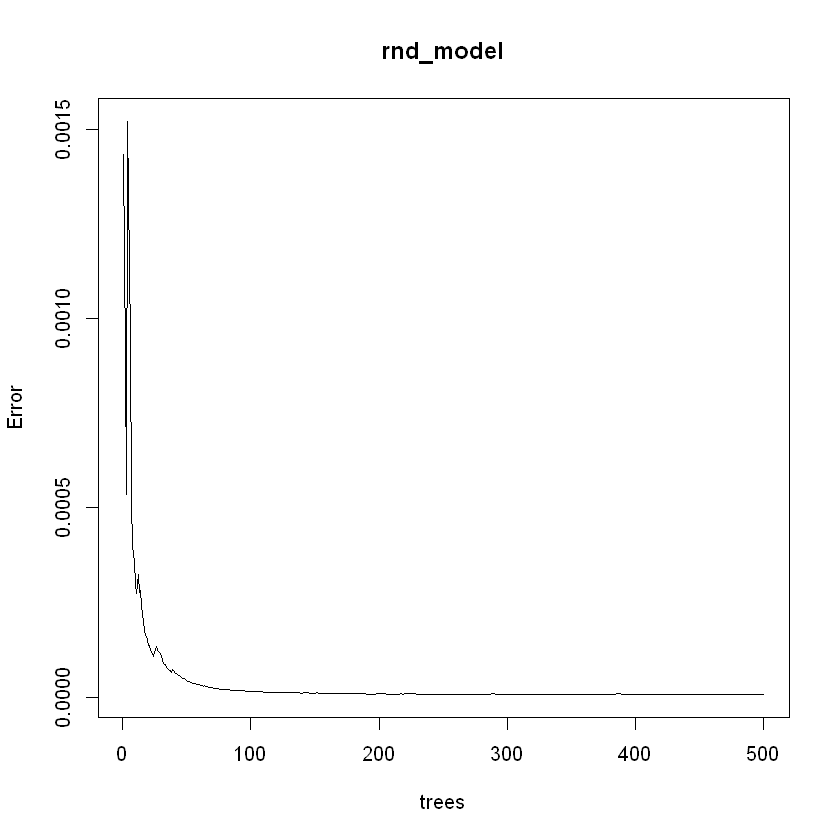

In [67]:
plot(rnd_model)

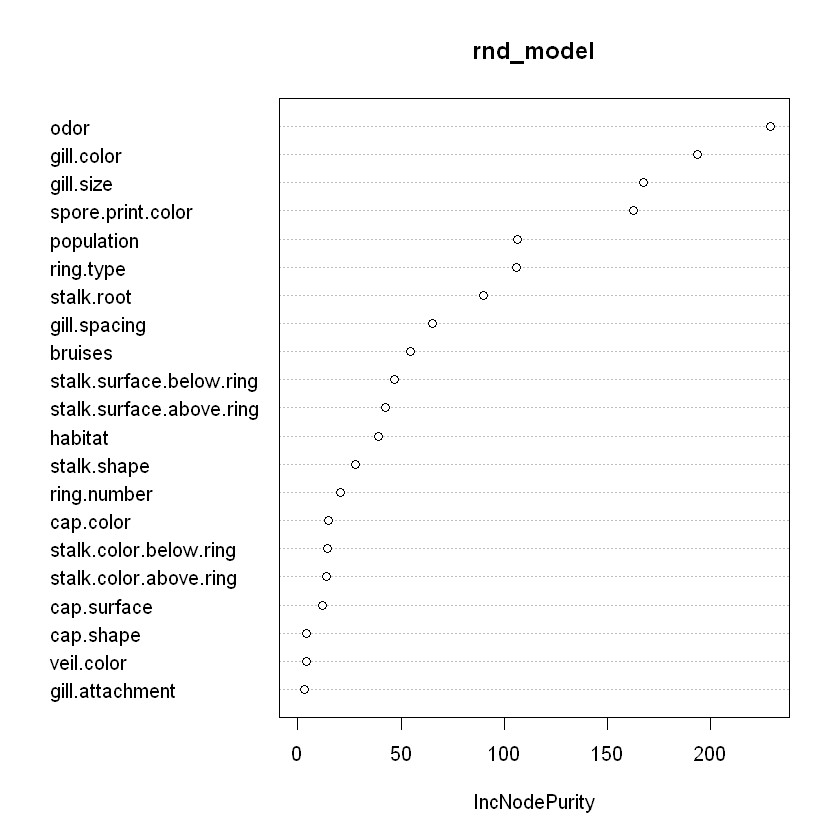

In [68]:
varImpPlot(rnd_model)

In [69]:
rnd_trainpred <- predict(rnd_model,traindata,type='class')
rnd_pred <- predict(rnd_model,testdata,type='class')

In [70]:
traindata$rnd_trainpred <- ifelse(rnd_trainpred<0.5,0,1)
testdata$rnd_pred <- ifelse(rnd_pred < 0.5,0,1)

In [71]:
accuracy(traindata$rnd_trainpred,traindata$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2964    0
  1    0 2722

$accuracyPer
   ypred
y     0   1
  0 100   0
  1   0 100

$overallAcc
[1] 100


In [72]:
accuracy(testdata$rnd_pred,testdata$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1244    0
  1    0 1194

$accuracyPer
   ypred
y     0   1
  0 100   0
  1   0 100

$overallAcc
[1] 100


Sensitivity or Recall <- TP/(TP+FN) = (1175)/(1175+0) = 1

Specificity <- TN / (TN+FP) = 1263/(1263+0) = 1

Precision <- TP / (TP+FP) = 1175/(1175+0) = 1

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 1

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1175+1263)/(1175+0+0+1263) =1

In [73]:
roc(testdata$rnd_pred,testdata$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testdata$rnd_pred, predictor = testdata$class)

Data: testdata$class in 1244 controls (testdata$rnd_pred 0) < 1194 cases (testdata$rnd_pred 1).
Area under the curve: 1

gini co-efficient <- 2*AUC - 1 = 2 * 1 -1 = 1

## XGBoost

In [86]:
traindata$rnd_trainpred <- NULL
testdata$rnd_pred <- NULL

In [87]:
dMtrain <- xgb.DMatrix(as.matrix(traindata %>% select(-class)), label = traindata$class)
dMtest <- xgb.DMatrix(as.matrix(testdata %>% select(-class)), label = testdata$class)

In [88]:
params <- list(
  "objective"           = "binary:logistic",
  "eval_metric"         = "auc",
  "eta"                 = 0.012,
  "subsample"           = 0.8,
  "max_depth"           = 8,
  "colsample_bytree"    =0.9,
  "min_child_weight"    = 5
)

In [89]:
model_xgb.cv <- xgb.cv(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nfold = 5,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.997084+0.000897	test-auc:0.996530+0.001620 
Multiple eval metrics are present. Will use test_auc for early stopping.
Will train until test_auc hasn't improved in 100 rounds.

[101]	train-auc:0.999904+0.000040	test-auc:0.999890+0.000060 
[201]	train-auc:0.999996+0.000004	test-auc:0.999989+0.000014 
[301]	train-auc:1.000000+0.000000	test-auc:1.000000+0.000000 
Stopping. Best iteration:
[224]	train-auc:1.000000+0.000000	test-auc:1.000000+0.000000



In [90]:
model_xgb <- xgboost(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.997832 
Will train until train_auc hasn't improved in 100 rounds.

[101]	train-auc:0.999917 
[201]	train-auc:1.000000 
Stopping. Best iteration:
[177]	train-auc:1.000000



In [91]:
xgb_trainpred <- predict(model_xgb,dMtrain)
xgb_pred <- predict(model_xgb,dMtest)

In [92]:
traindata$xgb_trainpred <- ifelse(xgb_trainpred < 0.5,0,1)
testdata$xgb_pred <- ifelse(xgb_pred < 0.5,0,1)

In [93]:
accuracy(testdata$xgb_pred,testdata$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1241    0
  1    3 1194

$accuracyPer
   ypred
y        0      1
  0 100.00   0.00
  1   0.25  99.75

$overallAcc
[1] 99.88


In [94]:
accuracy(traindata$xgb_trainpred,traindata$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2955    0
  1    9 2722

$accuracyPer
   ypred
y        0      1
  0 100.00   0.00
  1   0.33  99.67

$overallAcc
[1] 99.84


Sensitivity or Recall <- TP/(TP+FN) = 2722/(2735+9) = 0.9967

Specificity <- TN / (TN+FP) = 2955/(2955+0) = 1

Precision <- TP / (TP+FP) = 2722/(2722+0) = 1

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(0.9967*1)/(0.9967+1) = 0.9983

Accuracy <- (TP+TN)/(TP+FP+FN+TN)= (2722+2955)/(2722+0+9+2955) = 0.9984

In [95]:
roc(testdata$xgb_pred,testdata$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testdata$xgb_pred, predictor = testdata$class)

Data: testdata$class in 1241 controls (testdata$xgb_pred 0) < 1197 cases (testdata$xgb_pred 1).
Area under the curve: 0.9987

gini co-efficient <- 2*AUC - 1 =2 * 0.9987 - 1 = 0.9974

## Naive BAyes

In [96]:
traindata$xgb_trainpred <- NULL
testdata$xgb_pred <- NULL

In [97]:
data_1 <- read.csv('D:/DOCUMENT/Data Science/Personaldata/Mushroom/mushroom-classification/mushrooms.csv')

In [98]:
smp_size1 = floor(nrow(data_1)*0.7)
traindata1 = sample(nrow(data_1),size=smp_size1)
set.seed(12345)
train_1 = data_1[traindata1,]
test_1 = data_1[-traindata1,]

In [99]:
    str(train_1)

'data.frame':	5686 obs. of  23 variables:
 $ class                   : Factor w/ 2 levels "e","p": 1 2 2 2 2 2 1 2 1 2 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 3 3 6 3 6 1 6 3 3 6 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 4 3 1 3 3 4 3 3 4 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 10 3 1 9 5 5 3 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 1 1 1 1 1 2 2 1 1 1 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 6 3 2 3 8 6 4 3 6 5 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 1 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 2 1 1 1 1 1 2 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 1 1 2 1 2 1 1 2 1 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 7 4 3 4 1 11 5 1 8 11 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 2 2 1 ...
 $ stalk.

In [100]:
model_nv1<-naiveBayes(class~., data=train_1, laplace=1)

In [101]:
naivepred<-predict(model_nv1, test_1)

In [102]:
naivepred

[1] e e e e e e e e e e e e e e e e e e p p e e e p e e e e e e e e e e e e e
  [38] e e e e e e e p e p e e e e e e e e e e e e e e e e e e e e p e e e e e e
  [75] e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e p e e e e e e
 [112] e e e e e e p e e e e e e e e p e e e e e e e e e e e e e e e e e e e e e
 [149] e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e
 [186] e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e
 [223] e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e p e e
 [260] e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e
 [297] e e p e e e e e e e e e e e e e e e e e e e e e e e e e e e p e e e e e e
 [334] e p e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e p e
 [371] e e e e e e e e e e e e e p e e e e e e e e e e e e e e e e e e e e e e e
 [408] e e e e e e e e e e e e e e e p e e e p e e e e e e e e e e e e e e e e e
 [445] e e e e e e e e p p e e e e p e e e e e e e e e e e e e e e e e e e e e e
 [482] e e e e e e e e e e e e e e e e p e e e e e e e e e e e e e e e e e e e e
 [519] e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e
 [556] e e e e e e e e e e e e e e e e e e e e e e e e e e e p e e e e e e e e e
 [593] e e e e e e e e e e e p e e e e e e e e e e e e e e e p e e e e e p e e e
 [630] e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e
 [667] e e e e e e e e e e e e e e e e e e e e e e e e e e e p e e p e e e e e e
 [704] e e e e e e p e e e e e e e e e e e e e e e e e p e e e e e e e e e e p e
 [741] e e e e p e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e
 [778] e e e e e e e e e e e e e e e e e e e p p e e e e e e e e e e e e e e e e
 [815] e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e p e e e e e
 [852] e e e e e e e e e e e e e e e e e e e e e e e e e e e p e e e e e e p p e
 [889] e e p e e p e e e e p e p p e p e e e e e e e e e e e e e e e e e e e e p
 [926] p p e p e e p p e e e e e e e p e e p e e e p e p p p e e e e p e e e e e
 [963] p p e e e e e e e e e e e e e p e p p e p e p e e e e e e p e p e e e e e
[1000] p e p p e e e e e p e e e p p e p p e e p e e e e p e p e e e e p e e e e
[1037] p e p e e e p e e e e e e p e p e p e e p e e p e e e e e e p e p p e p e
[1074] e p e e e p e e e e e e e p p p p p e e e e p e e e e e p p e p e e e e e
[1111] e e e e p p p e e e e e e p e e e e e e e e e e e p p p e e e e p e p p p
[1148] p p e e p e e p p p e e e p p p p p p p p p p e p p p p p p p p p e e p e
[1185] p p p p p p p p p p p p e e p p e p e p p p e p p p p p e p p p p p e e p
[1222] p p e p p e p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p p
[1259] p p p p p p p p p p e p p e p p p p p p p p e p p p p p p p e p p p p p p
[1296] p p e p p p p p p p e p p p p e p p p p p p p p p e p p p p p p p p p p p
[1333] p p p p p p p p p p p p p p p p p p p p p e p p p p p p p p p p p p p p p
[1370] p p p p p p p p p p p p p p p p e p p p p p p p p p p e p p p p p p p e p
[1407] e p e p p e p p e e p e p p p p p p p p p p p p p p p p p p p p p p p p p
[1444] p p p e e e p p p p p p p p e p p e p p p p e p p p p p p p p p e p p p p
[1481] p p e e p e p e p p p e p e p p p p e p p p e p p p p e p e p p p p e p p
[1518] p e p p e p p e p p e p p p p p p e e p p p e e e p e p p e p p p p p p e
[1555] p e p e p p p p p p p e e e p p p p e p p p p p p p e p p p e e e p p p p
[1592] p e p e p e p e p e e p p e p p e p p p p p p p e e p e p e p p e p p e e
[1629] e p e p p p e e p p p p p e e p e p p p p p p p p p e p e p p p p p e p e
[1666] p p e p e e p p p e e p p p p p e p e e e p e e p p e p p p e p p p e p e
[1703] p p e p p e e e p p p p p p e e e e p e p p p p p p p p p p e p p p p p e
[1740] e p e e e p p p p p p p e e p p p p p p p p p p p p p p p p p p p p p p p
[1777] p p p p p p p p p p p p p p p p p p p p e p p p p p e p p p p p p p p p p
[1814] p p p e p p p p e p p p p p

In [103]:
confusionMatrix(data=naivepred, reference=test_1$class, positive="e")

Confusion Matrix and Statistics

          Reference
Prediction    e    p
         e 1262   92
         p    4 1080
                                         
               Accuracy : 0.9606         
                 95% CI : (0.9521, 0.968)
    No Information Rate : 0.5193         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9209         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9968         
            Specificity : 0.9215         
         Pos Pred Value : 0.9321         
         Neg Pred Value : 0.9963         
             Prevalence : 0.5193         
         Detection Rate : 0.5176         
   Detection Prevalence : 0.5554         
      Balanced Accuracy : 0.9592         
                                         
       'Positive' Class : e              
                                         

Sensitivity or Recall <- TP/(TP+FN) = 1080/(1080+4) = 0.9968

Specificity <- TN / (TN+FP) = 1262/(1262+92) = 0.9215

Precision <- TP / (TP+FP) = 1080/(1080+92) = 0.9215

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(0.9968*0.9215)/(0.9968+0.9215) = 0.9617

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1080+1262)/(1080+92+4+1262) = 0.9592

In [104]:
roc(naivepred,testdata$class)

Setting levels: control = e, case = p
Setting direction: controls < cases



Call:
roc.default(response = naivepred, predictor = testdata$class)

Data: testdata$class in 1354 controls (naivepred e) < 1084 cases (naivepred p).
Area under the curve: 0.7351

gini co-efficient <- 2*AUC - 1 = 2 * 0.7351 -1 = 0.4702

## K NEAREST NEIGHBOUR

In [105]:
train_knn <- traindata[,-1]
test_knn <- testdata[,-1]

In [106]:
train_labels <- traindata[, 1]
test_labels <- testdata[, 1] 

In [107]:
knn_trainpred <-  knn(train = train_knn, test = train_knn,cl = train_labels, k=6)
knn_pred <-  knn(train = train_knn, test = test_knn,cl = train_labels, k=6)

In [108]:
accuracy(knn_pred,test_labels,0.5)


$accuracyNum
   ypred
y      0    1
  0 1240    3
  1    4 1191

$accuracyPer
   ypred
y       0     1
  0 99.76  0.24
  1  0.33 99.67

$overallAcc
[1] 99.71


In [109]:
accuracy(knn_trainpred,train_labels,0.5)

$accuracyNum
   ypred
y      0    1
  0 2960    3
  1    4 2719

$accuracyPer
   ypred
y       0     1
  0 99.90  0.10
  1  0.15 99.85

$overallAcc
[1] 99.88


Sensitivity or Recall <- TP/(TP+FN) = 2719/(2719+4) = 0.9985

Specificity <- TN / (TN+FP) = 2960/(2960+3) = 0.9990

Precision <- TP / (TP+FP) = 2719/(2719+3) = =0.9989

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(0.9985*0.9989)/(0.9985+0.9985) = 0.9991
 
Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (2733+2947)/(2733+2+4+2947) = 0.9988

In [110]:
roc(knn_pred,test_labels)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = knn_pred, predictor = test_labels)

Data: test_labels in 1243 controls (knn_pred 0) < 1195 cases (knn_pred 1).
Area under the curve: 0.9971

gini co-efficient <- 2*AUC - 1 = 2 * 0.9971 - 1 = 0.9942

## Support Vector Machine

In [111]:
svm_model <- svm(class~ ., data = traindata)

In [112]:
summary(svm_model)


Call:
svm(formula = class ~ ., data = traindata)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.04761905 
    epsilon:  0.1 


Number of Support Vectors:  460






In [113]:
svm_trainpredict <- predict(svm_model,traindata)
svm_predict <- predict(svm_model,testdata)

In [114]:
svm_predict

7             8            10            14            17 
 7.803730e-03  1.714983e-02  2.003407e-02  1.013696e+00  4.015909e-02 
           19            26            27            34            35 
 1.025386e+00  9.793844e-01 -5.189155e-02  1.226951e-02  1.696022e-02 
           36            38            39            46            49 
 2.572583e-02  1.014538e+00  2.607379e-02 -2.288763e-02  1.986503e-02 
           53            55            56            61            62 
 3.831571e-03  9.468037e-01  1.132548e-02  2.158394e-02 -2.387938e-02 
           71            76            78            80            82 
 1.918262e-02  3.933566e-02  1.238155e-02  2.529787e-02  9.655136e-01 
           87            95            96            99           100 
 7.272855e-02  2.358295e-02  3.133933e-02  2.220715e-02  4.732277e-02 
          105           106           108           110           123 
-1.394590e-02 -1.556037e-02  3.993655e-02 -1.385527e-03  9.760788e-01 
          124           125           126           127           128 
 4.025418e-02  1.621438e-02  3.358317e-02  5.500016e-03  3.898253e-02 
          129           133           141           142           143 
 2.966761e-03  1.649797e-02  3.398865e-02  1.640576e-02  3.581047e-02 
          144           148           149           155           161 
 2.683111e-02  3.243038e-03 -2.517423e-03 -3.406599e-02  4.627514e-02 
          162           165           174           176           177 
-1.777917e-02 -1.951452e-03  2.719343e-02  4.035930e-02 -4.773691e-03 
          182           184           185           189           190 
 3.712866e-02 -4.076094e-03  2.406246e-02 -1.371004e-02  1.314319e-03 
          193           198           203           204           206 
 3.716301e-02 -3.315374e-03  4.355874e-02  3.739514e-02  9.480632e-01 
          209           211           220           224           231 
-1.949024e-02  7.296558e-02  2.894931e-02  3.662195e-02  2.716433e-02 
          233           234           238           240           241 
 3.604608e-02  4.735775e-02 -1.011254e-02 -4.831073e-02 -1.315586e-02 
          246           248           252           256           257 
 6.118259e-03  4.193227e-02  9.761100e-01  4.264657e-03  4.693907e-02 
          262           267           268           269           278 
 9.645248e-01  4.695484e-02 -1.466928e-02  2.457466e-03 -1.745247e-02 
          279           281           286           287           288 
-6.893075e-03  9.797453e-01  4.275951e-02  1.351080e-02  3.566072e-02 
          294           295           300           302           309 
-1.289663e-02  6.614612e-02  9.842934e-01  4.743018e-02  4.520854e-02 
          310           312           314           316           326 
-1.130102e-02  9.871497e-01  4.705419e-02  1.011604e+00 -1.119316e-02 
          327           332           337           339           342 
-1.337515e-02  4.563999e-02  5.430418e-02  3.811932e-02  4.125977e-03 
          345           347           350           354           359 
-6.497427e-04  2.956166e-02  4.440119e-02  1.333458e-02 -2.877701e-02 
          362           366           375           376           385 
 3.930617e-02  6.258413e-02  6.255722e-02  1.902347e-03  7.056845e-03 
          388           397           398           401           405 
 3.175423e-02 -9.701887e-03  9.891171e-03  1.230680e-02  7.661603e-03 
          406           413           416           418           419 
 3.763599e-02  3.083555e-02 -1.088523e-02  9.602417e-01 -1.844930e-02 
          423           427           432           438           439 
 1.042495e+00  9.098369e-03  2.521706e-02 -3.652543e-03  1.353292e-03 
          446           448           449           454           458 
 1.942113e-02  2.464107e-02  6.494374e-02  1.936088e-02  6.170653e-02 
          460           465           467           479           483 
-4.854395e-03  4.516852e-02  2.942810e-02  5.435201e-02  1.070816e-02 
          490           492         

In [115]:
testdata$svm_predict <- ifelse(svm_predict < 0.5,0,1)

In [116]:
traindata$svm_trainpred <- ifelse(svm_trainpredict<0.5,0,1)

In [117]:
accuracy(traindata$svm_trainpred,traindata$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2964    0
  1    0 2722

$accuracyPer
   ypred
y     0   1
  0 100   0
  1   0 100

$overallAcc
[1] 100


In [118]:
accuracy(testdata$svm_predict,testdata$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1244    0
  1    0 1194

$accuracyPer
   ypred
y     0   1
  0 100   0
  1   0 100

$overallAcc
[1] 100


Sensitivity or Recall <- TP/(TP+FN) = 1181/(1181+0) = 1

Specificity <- TN / (TN+FP)=1257/(1257+0) = 1

Precision <- TP / (TP+FP) = 1181/(1181+0) =1

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*1)/(1+1) = 1

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1181+1257)/(1181+0+0+1257) = 1

In [119]:
roc(testdata$svm_predict,testdata$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = testdata$svm_predict, predictor = testdata$class)

Data: testdata$class in 1244 controls (testdata$svm_predict 0) < 1194 cases (testdata$svm_predict 1).
Area under the curve: 1

gini co-efficient <- 2*AUC - 1 = 1

In [120]:
traindata$svm_trainpred <- NULL
testdata$svm_predict <- NULL

# Feature Selection using the caret library

In [4]:
data_true <- read.csv('D:/DOCUMENT/Data Science/Personaldata/Mushroom/mushroom-classification/mushrooms.csv')

In [5]:
data_true$veil.type <- NULL 

In [6]:
str(data_true)

'data.frame':	8124 obs. of  22 variables:
 $ class                   : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.r

In [124]:
set.seed(9)
control <- trainControl(method="repeatedcv", number=10, repeats=3)
model <- caret::train(class~., data=data_true)

In [125]:
importance <- varImp(model, scale=FALSE)
print(importance)

rf variable importance

  only 20 most important variables shown (out of 95)

                          Overall
odorn                     1581.01
gill.sizen                 469.48
odorf                      450.90
stalk.rootc                257.11
stalk.surface.above.ringk  175.16
bruisest                   140.56
spore.print.colorr         111.24
stalk.surface.below.ringk   83.27
stalk.surface.below.ringy   80.68
odorl                       75.64
spore.print.colorh          66.93
stalk.rootr                 63.59
ring.typep                  57.83
gill.spacingw               53.13
spore.print.colorw          37.90
odorp                       32.43
cap.colory                  29.05
stalk.shapet                26.18
stalk.roote                 24.15
ring.numbert                24.00


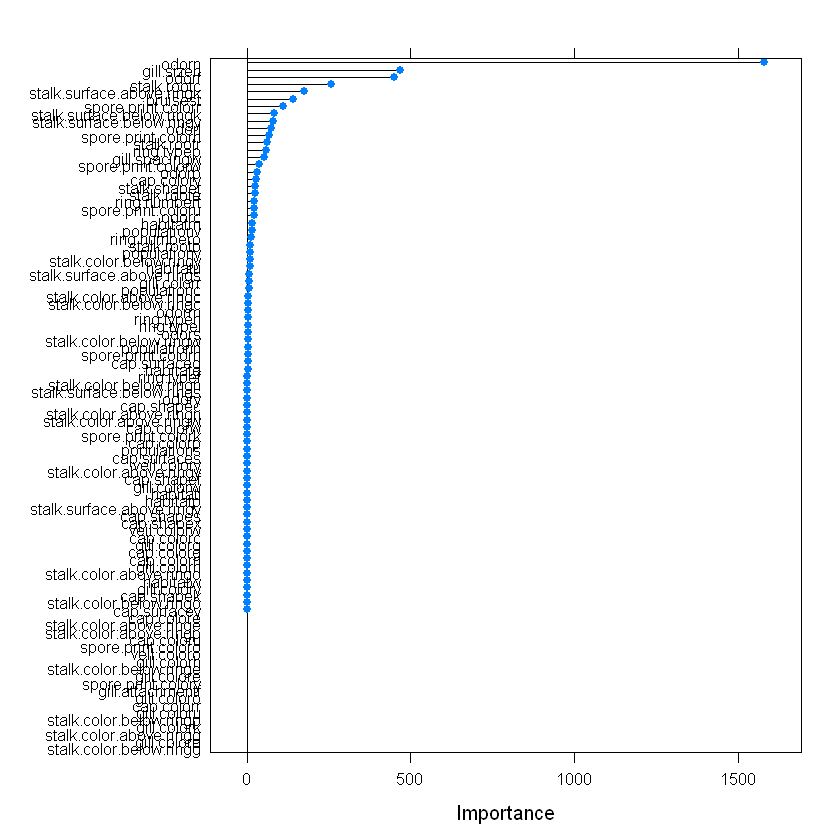

In [126]:
plot(importance)

In [7]:
data_true1 <- data_true[c(1,6,9,12,13,5,14,19)]

In [8]:
data_true1$class <- as.numeric(data_true1$class)

In [9]:
data_true1 $class <- ifelse(data_true1$class == 2,1,0)

In [10]:
head(data_true1)

class,odor,gill.size,stalk.root,stalk.surface.above.ring,bruises,stalk.surface.below.ring,ring.type
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,p,n,e,s,t,s,p
0,a,b,c,s,t,s,p
0,l,b,c,s,t,s,p
1,p,n,e,s,t,s,p
0,n,b,e,s,f,s,e
0,a,b,c,s,t,s,p


# ONE_HOT ENCODING

In [14]:
library(mltools)
library(data.table)

Warning message:
"package 'mltools' was built under R version 3.6.2"
Attaching package: 'mltools'

The following object is masked from 'package:tidyr':

    replace_na

The following object is masked from 'package:e1071':

    skewness


Attaching package: 'data.table'

The following object is masked from 'package:purrr':

    transpose

The following object is masked from 'package:naivebayes':

    tables

The following objects are masked from 'package:dplyr':

    between, first, last



In [102]:
en_data <- one_hot(as.data.table(data_true1))

In [103]:
smp_size = floor(nrow(en_data)*0.7)
traindata_en = sample(nrow(en_data),size=smp_size)
set.seed(12345)
train = en_data[traindata_en,]
test = en_data[-traindata_en,]

In [104]:
head(train)

class,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,...,bruises_t,stalk.surface.below.ring_f,stalk.surface.below.ring_k,stalk.surface.below.ring_s,stalk.surface.below.ring_y,ring.type_e,ring.type_f,ring.type_l,ring.type_n,ring.type_p
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## Logistic Regression

In [135]:
Log_onemodel <- glm(class~.,train,family=binomial())

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [136]:
Log_onemodel


Call:  glm(formula = class ~ ., family = binomial(), data = train)

Coefficients:
               (Intercept)                      odor_a  
                -9.507e+08                   9.507e+08  
                    odor_c                      odor_f  
                 9.507e+08                   9.507e+08  
                    odor_l                      odor_m  
                 9.507e+08                   9.507e+08  
                    odor_n                      odor_p  
                 9.507e+08                   9.507e+08  
                    odor_s                      odor_y  
                 9.507e+08                   9.507e+08  
               gill.size_b                 gill.size_n  
                -2.061e+01                          NA  
            `stalk.root_?`                stalk.root_b  
                 5.443e+00                   6.793e+00  
              stalk.root_c                stalk.root_e  
                 4.244e+01                  -1.038e+01  
     

In [137]:
Log_onetrainpred <- predict(Log_onemodel,train,type='response')
Log_onepred <- predict(Log_onemodel,test,type = 'response')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [138]:
train$Log_onetrainpred <- ifelse(Log_onetrainpred<0.5,0,1)
test$Log_onepred <- ifelse(Log_onepred<0.5,0,1)

In [139]:
accuracy(train$Log_onetrainpred,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2907   55
  1    0 2724

$accuracyPer
   ypred
y        0      1
  0  98.14   1.86
  1   0.00 100.00

$overallAcc
[1] 99.03


In [140]:
accuracy(test$Log_onepred,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1301   17
  1    0 1120

$accuracyPer
   ypred
y        0      1
  0  98.71   1.29
  1   0.00 100.00

$overallAcc
[1] 99.3


Sensitivity or Recall <- TP/(TP+FN) = 1120/(1120+0) = 1

Specificity <- TN / (TN+FP) = 1301/(1301+17) = 0.9871

Precision <- TP / (TP+FP) = 1120/(1120+17) = 0.9850

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9871)/(1+0.9871) = 0.9935

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1120+1301)/(1120+17+0+1301) = 0.9930

In [141]:
roc(test$Log_onepred,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$Log_onepred, predictor = test$class)

Data: test$class in 1318 controls (test$Log_onepred 0) < 1120 cases (test$Log_onepred 1).
Area under the curve: 0.9936

gini co-efficient <- 2*AUC - 1 = 2 * 0.9936 - 1 = 0.9872

## Using decision tree

In [142]:
train$Log_onetrainpred <- NULL
test$Log_onepred <- NULL

In [143]:
tree_model <- rpart(class~.,train,method = 'class')

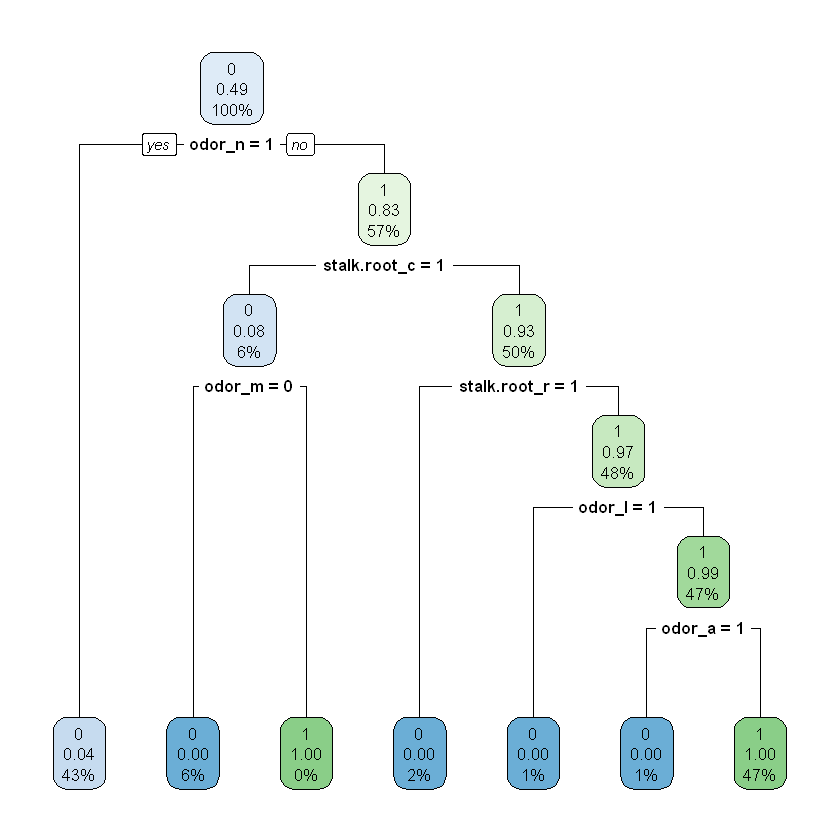

In [144]:
rpart.plot(tree_model)

In [145]:
train$tree_trainpred <- predict(tree_model,train,type='class')
test$tree_predict <- predict(tree_model,test,type='class')

In [146]:
accuracy(train$tree_trainpred,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2907   93
  1    0 2686

$accuracyPer
   ypred
y       0     1
  0  96.9   3.1
  1   0.0 100.0

$overallAcc
[1] 98.36


In [147]:
accuracy(test$tree_predict,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1301   27
  1    0 1110

$accuracyPer
   ypred
y        0      1
  0  97.97   2.03
  1   0.00 100.00

$overallAcc
[1] 98.89


Sensitivity or Recall <- TP/(TP+FN) = 1110/(1110+0) = 1

Specificity <- TN / (TN+FP) = 1301/(1301+27) = 0.9797

Precision <- TP / (TP+FP) = 1110/(1110+27) = 0.9763

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9763)/(1+0.9763) = 0.9880

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1110+1301)/(1110+27+0+1301) = 0.9889

In [148]:
roc(test$tree_predict,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$tree_predict, predictor = test$class)

Data: test$class in 1328 controls (test$tree_predict 0) < 1110 cases (test$tree_predict 1).
Area under the curve: 0.9898

gini co-efficient <- 2*AUC - 1 = 2 * 0.9898 -1 = 0.9796

## using random forest

In [105]:
train$tree_trainpred <- NULL
test$tree_predict <- NULL

Warning message in set(x, j = name, value = value):
"Column 'tree_trainpred' does not exist to remove"Warning message in set(x, j = name, value = value):
"Column 'tree_predict' does not exist to remove"

In [106]:
train$`stalk.root_?` <- NULL

In [107]:
rnd_model <- randomForest(class ~.,train,method='class')

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

In [108]:
rnd_trainpred <- predict(rnd_model,train,type = 'class')
rnd_pred <- predict(rnd_model,test,type='class')

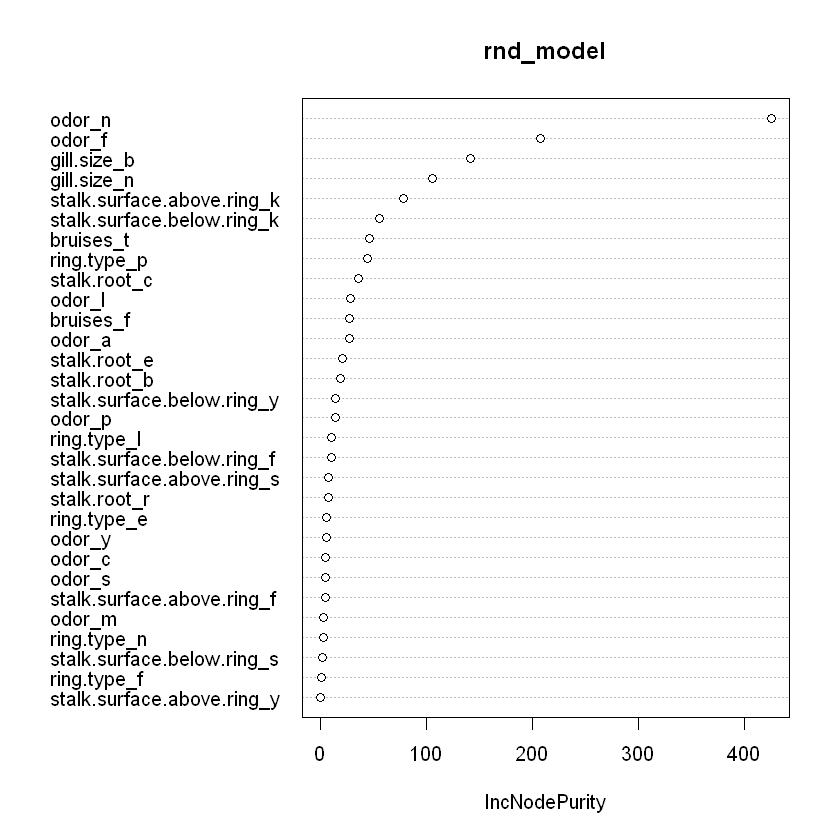

In [109]:
varImpPlot(rnd_model)

In [110]:
train$rnd_trainpred <- ifelse(rnd_trainpred<0.5,0,1)
test$rnd_pred <- ifelse(rnd_pred<0.5,0,1)

In [111]:
accuracy(train$rnd_trainpred,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2945   52
  1    0 2689

$accuracyPer
   ypred
y        0      1
  0  98.26   1.74
  1   0.00 100.00

$overallAcc
[1] 99.09


In [112]:
accuracy(test$rnd_pred,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1263   20
  1    0 1155

$accuracyPer
   ypred
y        0      1
  0  98.44   1.56
  1   0.00 100.00

$overallAcc
[1] 99.18


Sensitivity or Recall <- TP/(TP+FN) = 1155/(1155+0)=1

Specificity <- TN / (TN+FP) = 1263/(1263+20) = 0.9844

Precision <- TP / (TP+FP) = 1155/(1155+20) = 0.9829

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9829)/(1+0.9829) = 0.9914

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1155+1263)/(1155+20+0+1263) = 0.9918

In [113]:
roc(test$rnd_pred,test$class) #calculate with recal and precision where recal is in x and precision is in y

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$rnd_pred, predictor = test$class)

Data: test$class in 1283 controls (test$rnd_pred 0) < 1155 cases (test$rnd_pred 1).
Area under the curve: 0.9922

gini co-efficient <- 2*AUC - 1 = 2 * 0.9922 -1 = 0.9844

## XGBOOST

In [157]:
train$rnd_trainpred <- NULL
test$rnd_pred <- NULL

In [158]:
test$`stalk.root_?` <- NULL
train$xgb_trainpred <- NULL

Warning message in set(x, j = name, value = value):
"Column 'xgb_trainpred' does not exist to remove"

In [159]:
dMtrain <- xgb.DMatrix(as.matrix(train %>% select(-class)), label = train$class)
dMtest <- xgb.DMatrix(as.matrix(test %>% select(-class)), label = test$class)

In [160]:
names(train)
names(test)

[1] "class"                      "odor_a"                    
 [3] "odor_c"                     "odor_f"                    
 [5] "odor_l"                     "odor_m"                    
 [7] "odor_n"                     "odor_p"                    
 [9] "odor_s"                     "odor_y"                    
[11] "gill.size_b"                "gill.size_n"               
[13] "stalk.root_b"               "stalk.root_c"              
[15] "stalk.root_e"               "stalk.root_r"              
[17] "stalk.surface.above.ring_f" "stalk.surface.above.ring_k"
[19] "stalk.surface.above.ring_s" "stalk.surface.above.ring_y"
[21] "bruises_f"                  "bruises_t"                 
[23] "stalk.surface.below.ring_f" "stalk.surface.below.ring_k"
[25] "stalk.surface.below.ring_s" "stalk.surface.below.ring_y"
[27] "ring.type_e"                "ring.type_f"               
[29] "ring.type_l"                "ring.type_n"               
[31] "ring.type_p"

[1] "class"                      "odor_a"                    
 [3] "odor_c"                     "odor_f"                    
 [5] "odor_l"                     "odor_m"                    
 [7] "odor_n"                     "odor_p"                    
 [9] "odor_s"                     "odor_y"                    
[11] "gill.size_b"                "gill.size_n"               
[13] "stalk.root_b"               "stalk.root_c"              
[15] "stalk.root_e"               "stalk.root_r"              
[17] "stalk.surface.above.ring_f" "stalk.surface.above.ring_k"
[19] "stalk.surface.above.ring_s" "stalk.surface.above.ring_y"
[21] "bruises_f"                  "bruises_t"                 
[23] "stalk.surface.below.ring_f" "stalk.surface.below.ring_k"
[25] "stalk.surface.below.ring_s" "stalk.surface.below.ring_y"
[27] "ring.type_e"                "ring.type_f"               
[29] "ring.type_l"                "ring.type_n"               
[31] "ring.type_p"

In [161]:
params <- list(
  "objective"           = "binary:logistic",
  "eval_metric"         = "auc",
  "eta"                 = 0.012,
  "subsample"           = 0.8,
  "max_depth"           = 8,
  "colsample_bytree"    =0.9,
  "min_child_weight"    = 5
)

In [162]:
model_xgb.cv <- xgb.cv(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nfold = 5,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.988793+0.001465	test-auc:0.988484+0.002510 
Multiple eval metrics are present. Will use test_auc for early stopping.
Will train until test_auc hasn't improved in 100 rounds.

[101]	train-auc:0.995413+0.000270	test-auc:0.995340+0.001085 
Stopping. Best iteration:
[99]	train-auc:0.995413+0.000270	test-auc:0.995340+0.001085



In [163]:
model_xgb <- xgboost(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.990487 
Will train until train_auc hasn't improved in 100 rounds.

[101]	train-auc:0.995366 
Stopping. Best iteration:
[37]	train-auc:0.995604



In [164]:
xgb_trainpred <- predict(model_xgb,dMtrain)


In [165]:
xgb_pred <- predict(model_xgb,dMtest)

In [166]:
train$xgb_trainpred <- ifelse(xgb_trainpred <0.5,0,1)

In [167]:
accuracy(train$xgb_trainpred,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2898   61
  1    9 2718

$accuracyPer
   ypred
y       0     1
  0 97.94  2.06
  1  0.33 99.67

$overallAcc
[1] 98.77


In [168]:
test$xgb_pred <- ifelse(xgb_pred<0.5,0,1)

In [169]:
accuracy(test$xgb_pred,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1294   19
  1    7 1118

$accuracyPer
   ypred
y       0     1
  0 98.55  1.45
  1  0.62 99.38

$overallAcc
[1] 98.93


Sensitivity or Recall <- TP/(TP+FN) = 1118/(1118+7) = 0.9938

Specificity <- TN / (TN+FP) = 1294/(1294+19) = 0.9855

Precision <- TP / (TP+FP) = 1118/(1118+19) = 0.9833

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(0.9938*0.9833)/(0.9938+0.9833) = 0.9885

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1118+1294)/(1118+19+7+1294) = 0.9893

In [170]:
roc(test$xgb_pred,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$xgb_pred, predictor = test$class)

Data: test$class in 1313 controls (test$xgb_pred 0) < 1125 cases (test$xgb_pred 1).
Area under the curve: 0.9897

gini co-efficient <- 2*AUC - 1 = 2 * 0.9897 - 1 = 0.9794

## K Nearest Neighbour 

In [171]:
train$xgb_trainpred<- NULL
test$xgb_pred <- NULL

In [172]:
train_knn <- train[,-1]
test_knn <- test[,-1]

In [173]:
names(train_knn)
names(test_knn)

[1] "odor_a"                     "odor_c"                    
 [3] "odor_f"                     "odor_l"                    
 [5] "odor_m"                     "odor_n"                    
 [7] "odor_p"                     "odor_s"                    
 [9] "odor_y"                     "gill.size_b"               
[11] "gill.size_n"                "stalk.root_b"              
[13] "stalk.root_c"               "stalk.root_e"              
[15] "stalk.root_r"               "stalk.surface.above.ring_f"
[17] "stalk.surface.above.ring_k" "stalk.surface.above.ring_s"
[19] "stalk.surface.above.ring_y" "bruises_f"                 
[21] "bruises_t"                  "stalk.surface.below.ring_f"
[23] "stalk.surface.below.ring_k" "stalk.surface.below.ring_s"
[25] "stalk.surface.below.ring_y" "ring.type_e"               
[27] "ring.type_f"                "ring.type_l"               
[29] "ring.type_n"                "ring.type_p"

[1] "odor_a"                     "odor_c"                    
 [3] "odor_f"                     "odor_l"                    
 [5] "odor_m"                     "odor_n"                    
 [7] "odor_p"                     "odor_s"                    
 [9] "odor_y"                     "gill.size_b"               
[11] "gill.size_n"                "stalk.root_b"              
[13] "stalk.root_c"               "stalk.root_e"              
[15] "stalk.root_r"               "stalk.surface.above.ring_f"
[17] "stalk.surface.above.ring_k" "stalk.surface.above.ring_s"
[19] "stalk.surface.above.ring_y" "bruises_f"                 
[21] "bruises_t"                  "stalk.surface.below.ring_f"
[23] "stalk.surface.below.ring_k" "stalk.surface.below.ring_s"
[25] "stalk.surface.below.ring_y" "ring.type_e"               
[27] "ring.type_f"                "ring.type_l"               
[29] "ring.type_n"                "ring.type_p"

In [174]:
train_labels <- train[, 1]
test_labels <- test[, 1] 


In [175]:
knn_trainpred <-  knn(train = train_knn, test = train_knn,cl = train_labels, k=6)
knn_pred <-  knn(train = train_knn, test = test_knn,cl = train_labels, k=6)


ERROR: Error in knn(train = train_knn, test = train_knn, cl = train_labels, k = 6): 'train' and 'class' have different lengths


In [176]:
accuracy(knn_pred,test_labels,0.5)

Warning message in if (class(yhat) != "numeric" | max(yhat) > 1 | min(yhat) < 0) {:
"the condition has length > 1 and only the first element will be used"

ERROR: Error in accuracy(knn_pred, test_labels, 0.5): Invalid input: yhat should be numeric vector of predicted probabilities in the range 0 to 1


## Support Vector machine

In [177]:
svm_model1 <- svm(class~ ., data = train)

In [178]:
summary(svm_model1)


Call:
svm(formula = class ~ ., data = train)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.03333333 
    epsilon:  0.1 


Number of Support Vectors:  176






In [179]:
svm_trainpredict1 <- predict(svm_model1,train)
svm_predict1 <- predict(svm_model1,test)

In [181]:
train$svm_trainpredict1 <- ifelse(svm_trainpredict1<0.5,0,1)
test$svm_predict1 <- ifelse(svm_predict1 < 0.5,0,1)

In [182]:
accuracy(train$svm_trainpredict1,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2907   55
  1    0 2724

$accuracyPer
   ypred
y        0      1
  0  98.14   1.86
  1   0.00 100.00

$overallAcc
[1] 99.03


In [183]:
accuracy(test$svm_predict1,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1301   17
  1    0 1120

$accuracyPer
   ypred
y        0      1
  0  98.71   1.29
  1   0.00 100.00

$overallAcc
[1] 99.3


Sensitivity or Recall <- TP/(TP+FN) = 1120/(1120+0) = 1

Specificity <- TN / (TN+FP) = 1301/(1301+17) = 0.9871

Precision <- TP / (TP+FP) = 1120/(1120+17) = 0.9850

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9850)/(1+0.9850) = 0.9924

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1120+1301)/(1120+17+0+1301) = 0.9930

In [184]:
roc(test$svm_predict1,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$svm_predict1, predictor = test$class)

Data: test$class in 1318 controls (test$svm_predict1 0) < 1120 cases (test$svm_predict1 1).
Area under the curve: 0.9936

gini co-efficient <- 2*AUC - 1 = 2* 0.9936 -1 = 0.9872

In [185]:
train$svm_trainpredict1<- NULL
test$svm_predict1 <- NULL

# Binary Encoding

In [80]:
head(data_true1)

class,odor,gill.size,stalk.root,stalk.surface.above.ring,bruises,stalk.surface.below.ring,ring.type
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,p,n,e,s,t,s,p
0,a,b,c,s,t,s,p
0,l,b,c,s,t,s,p
1,p,n,e,s,t,s,p
0,n,b,e,s,f,s,e
0,a,b,c,s,t,s,p


In [81]:
binaryEncoding <- function (dataVect, prefix) {
  ret <- matrix(
    as.integer(intToBits(as.integer(as.factor(dataVect)))),
    ncol = 32,
    nrow = length(dataVect),
    byrow = TRUE
  )[, 1:ceiling(log(length(unique(dataVect)) + 1)/log(2))]
  ret <- as.data.table(ret)
  return (setNames(ret, c(paste0(prefix, seq(1, ncol(ret))))))
}


In [83]:
bin_data <- cbind(data_true1, binaryEncoding (data_true1$odor, "odor_"))

In [84]:
bin_data1 <-cbind(bin_data, binaryEncoding (bin_data$gill.size, "gill.size_"))

In [85]:
bin_data2 <-cbind(bin_data1, binaryEncoding (bin_data1$stalk.root, "stalk.root_"))

In [86]:
bin_data3 <- cbind(bin_data2, binaryEncoding (bin_data2$stalk.surface.above.ring, "stalk.surface.above.ring_"))

In [87]:
bin_data4 <- cbind(bin_data3, binaryEncoding (bin_data3$bruises, "bruises_"))

In [88]:
bin_data5 <- cbind(bin_data4, binaryEncoding (bin_data4$stalk.surface.below.ring, "stalk.surface.below.ring_"))


In [89]:
bin_datanew <- cbind(bin_data5, binaryEncoding (bin_data5$ring.type, "ring.type_"))

In [90]:
bin_datanew$odor<-NULL
bin_datanew$gill.size<- NULL
bin_datanew$stalk.root<-NULL
bin_datanew$stalk.surface.above.ring<- NULL
bin_datanew$bruises<-NULL
bin_datanew$stalk.surface.below.ring <- NULL
bin_datanew$ring.type <- NULL

In [91]:
head(bin_datanew)

class,odor_1,odor_2,odor_3,odor_4,gill.size_1,gill.size_2,stalk.root_1,stalk.root_2,stalk.root_3,...,stalk.surface.above.ring_2,stalk.surface.above.ring_3,bruises_1,bruises_2,stalk.surface.below.ring_1,stalk.surface.below.ring_2,stalk.surface.below.ring_3,ring.type_1,ring.type_2,ring.type_3
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,0,0,1,0,0,1,...,1,0,0,1,1,1,0,1,0,1
0,1,0,0,0,1,0,1,1,0,...,1,0,0,1,1,1,0,1,0,1
0,0,0,1,0,1,0,1,1,0,...,1,0,0,1,1,1,0,1,0,1
1,1,1,1,0,0,1,0,0,1,...,1,0,0,1,1,1,0,1,0,1
0,0,1,1,0,1,0,0,0,1,...,1,0,1,0,1,1,0,1,0,0
0,1,0,0,0,1,0,1,1,0,...,1,0,0,1,1,1,0,1,0,1


In [92]:
smp_size = floor(nrow(bin_datanew)*0.7)
traindata = sample(nrow(bin_datanew),size=smp_size)
set.seed(12345)
train = bin_datanew[traindata,]
test = bin_datanew[-traindata,]

## Logistic Regression

In [199]:
binlog_model <- glm(class~.,train,family = binomial())

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [200]:
summary(binlog_model)


Call:
glm(formula = class ~ ., family = binomial(), data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.26420  -0.00004   0.00000   0.00001   2.59717  

Coefficients: (1 not defined because of singularities)
                             Estimate Std. Error z value Pr(>|z|)
(Intercept)                -1.812e+07  7.730e+12   0.000    1.000
odor_1                      3.758e+01  6.804e+03   0.006    0.996
odor_2                      1.240e+02  1.476e+04   0.008    0.993
odor_3                     -1.349e+01  8.020e+03  -0.002    0.999
odor_4                      1.613e+02  1.862e+04   0.009    0.993
gill.size_1                 1.811e+07  7.730e+12   0.000    1.000
gill.size_2                 1.811e+07  7.730e+12   0.000    1.000
stalk.root_1                4.502e+01  1.137e+04   0.004    0.997
stalk.root_2                5.698e+01  1.116e+04   0.005    0.996
stalk.root_3                2.293e+01  1.146e+04   0.002    0.998
stalk.surface.above.ring_1 

In [201]:
bin_trainpred <- predict(binlog_model,train,type = 'response')
bin_pred <- predict(binlog_model,test,type = 'response')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [202]:
train$bin_trainpred <- ifelse(bin_trainpred<0.5,0,1)
test$bin_pred <- ifelse(bin_pred<0.5,0,1)

In [203]:
accuracy(train$bin_trainpred,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2966   45
  1    0 2675

$accuracyPer
   ypred
y        0      1
  0  98.51   1.49
  1   0.00 100.00

$overallAcc
[1] 99.21


In [204]:
accuracy(test$bin_pred,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1242   27
  1    0 1169

$accuracyPer
   ypred
y        0      1
  0  97.87   2.13
  1   0.00 100.00

$overallAcc
[1] 98.89


Sensitivity or Recall <- TP/(TP+FN) = 1169/(1169+0) = 1

Specificity <- TN / (TN+FP) = 1242/(1242+27) = 0.9787

Precision <- TP / (TP+FP) = 1169/(1169+27) = 0.9774

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9774)/(1+0.9774) = 0.9886

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1169+1242)/(1169+27+0+1242) = 0.9889

In [205]:
roc(test$bin_pred,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$bin_pred, predictor = test$class)

Data: test$class in 1269 controls (test$bin_pred 0) < 1169 cases (test$bin_pred 1).
Area under the curve: 0.9894

gini co-efficient <- 2*AUC - 1 =2 * 0.9894 - 1 = 0.9788

## Decision Tree

In [206]:
train$bin_trainpred <- NULL
train$tree_trainpred <- NULL
test$bin_pred <- NULL

In [207]:
tree_model <- rpart(class~.,train,method = 'class')

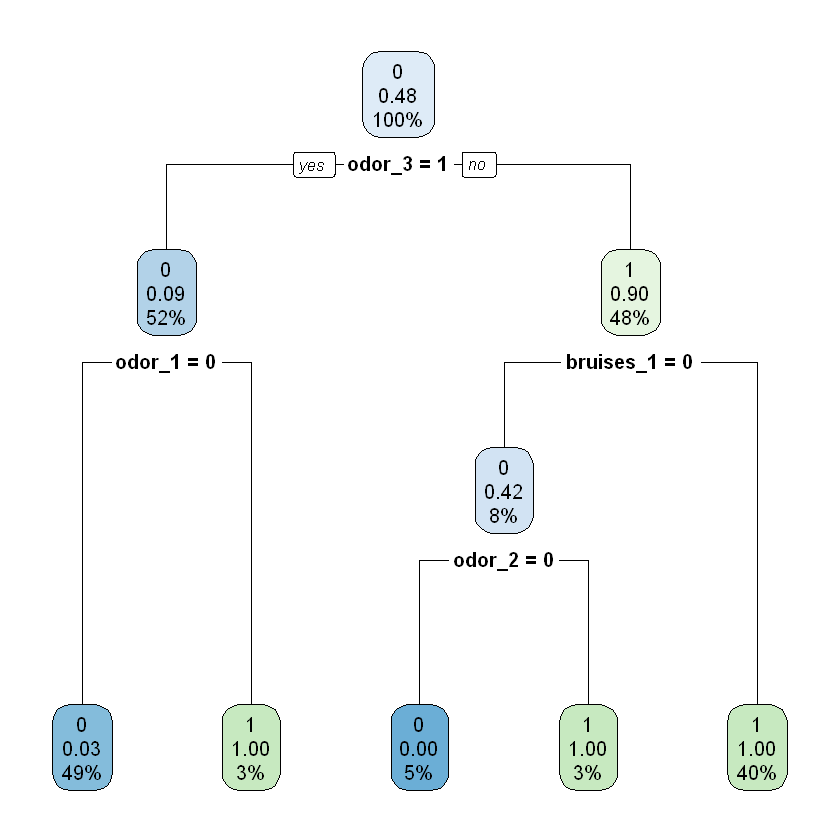

In [208]:
rpart.plot(tree_model)

In [209]:
train$tree_trainpred <- predict(tree_model,train,type='class')
test$tree_predict <- predict(tree_model,test,type='class')

In [210]:
accuracy(train$tree_trainpred,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2966   77
  1    0 2643

$accuracyPer
   ypred
y        0      1
  0  97.47   2.53
  1   0.00 100.00

$overallAcc
[1] 98.65


In [211]:
accuracy(test$tree_predict,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1242   43
  1    0 1153

$accuracyPer
   ypred
y        0      1
  0  96.65   3.35
  1   0.00 100.00

$overallAcc
[1] 98.24


Sensitivity or Recall <- TP/(TP+FN) = 1153/(1153+0) = 1

Specificity <- TN / (TN+FP) = 1242/(1242+43) = 0.9665

Precision <- TP / (TP+FP) = 1153/(1153+43) = 0.9640

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9640)/(1+0.9640) = 0.9816

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1153+1242) /(1153+43+0+1242) = 0.9824

In [212]:
roc(test$tree_predict,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$tree_predict, predictor = test$class)

Data: test$class in 1285 controls (test$tree_predict 0) < 1153 cases (test$tree_predict 1).
Area under the curve: 0.9833

gini co-efficient <- 2*AUC - 1 = 2 * 0.9833 - 1 = 0.9666

## Random Forest

In [213]:
train$tree_trainpred<- NULL
test$tree_predict <- NULL

In [214]:
bin_rnd <- randomForest(class~.,train,method = 'class')

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

In [215]:
summary(bin_rnd)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       5686   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       5686   -none- numeric  
importance        20   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               5686   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

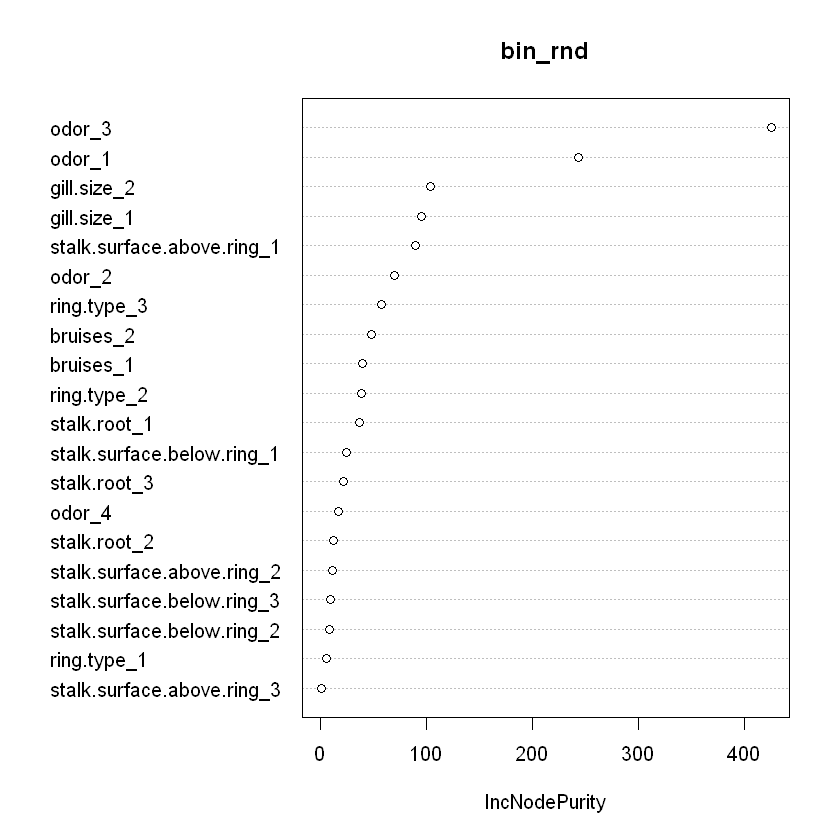

In [216]:
varImpPlot(bin_rnd)

In [217]:
bin_trainrndpred <- predict(bin_rnd,train,type='class')
bin_rndpred <- predict(bin_rnd,test,type='class')

In [218]:
train$bin_trainrndpred <- ifelse(bin_trainrndpred < 0.5,0,1)
test$bin_rndpred <- ifelse(bin_rndpred < 0.5,0,1)

In [219]:
accuracy(train$bin_trainrndpred,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2966   45
  1    0 2675

$accuracyPer
   ypred
y        0      1
  0  98.51   1.49
  1   0.00 100.00

$overallAcc
[1] 99.21


In [220]:
accuracy(test$bin_rndpred,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1242   27
  1    0 1169

$accuracyPer
   ypred
y        0      1
  0  97.87   2.13
  1   0.00 100.00

$overallAcc
[1] 98.89


Sensitivity or Recall <- TP/(TP+FN) = 1169/(1169+0) = 1

Specificity <- TN / (TN+FP) = 1242/(1242+27) = 0.9787

Precision <- TP / (TP+FP) = 1169/(1169+27) = 0.9774

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9787)/(1+0.9787) = 0.9892

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1169+1242) /(1169+27+0+1242) = 0.9889

In [221]:
roc(test$bin_rndpred,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$bin_rndpred, predictor = test$class)

Data: test$class in 1269 controls (test$bin_rndpred 0) < 1169 cases (test$bin_rndpred 1).
Area under the curve: 0.9894

gini co-efficient <- 2*AUC - 1 = 2 * 0.9894 -1 = 0.9788

## XGBoost

In [93]:
dMtrain <- xgb.DMatrix(as.matrix(train %>% select(-class)), label = train$class)
dMtest <- xgb.DMatrix(as.matrix(test %>% select(-class)), label = test$class)

In [94]:
params <- list(
  "objective"           = "binary:logistic",
  "eval_metric"         = "auc",
  "eta"                 = 0.012,
  "subsample"           = 0.8,
  "max_depth"           = 8,
  "colsample_bytree"    =0.9,
  "min_child_weight"    = 5
)

In [95]:
model_xgb.cv <- xgb.cv(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nfold = 5,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.990320+0.000875	test-auc:0.990193+0.003313 
Multiple eval metrics are present. Will use test_auc for early stopping.
Will train until test_auc hasn't improved in 100 rounds.

[101]	train-auc:0.995097+0.000358	test-auc:0.994960+0.002138 
[201]	train-auc:0.995258+0.000317	test-auc:0.995114+0.002082 
[301]	train-auc:0.995273+0.000492	test-auc:0.995271+0.001808 
Stopping. Best iteration:
[278]	train-auc:0.995396+0.000445	test-auc:0.995390+0.001780



In [96]:
model_xgb <- xgboost(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)


[1]	train-auc:0.989876 
Will train until train_auc hasn't improved in 100 rounds.

[101]	train-auc:0.995399 
Stopping. Best iteration:
[67]	train-auc:0.995576



In [97]:
xgb_trainpred <- predict(model_xgb,dMtrain)


In [98]:
xgb_pred <- predict(model_xgb,dMtest)


In [99]:
train$xgb_trainpred <- ifelse(xgb_trainpred <0.5,0,1)
accuracy(train$xgb_trainpred,train$class,0.5)


$accuracyNum
   ypred
y      0    1
  0 2930   58
  1    0 2698

$accuracyPer
   ypred
y        0      1
  0  98.06   1.94
  1   0.00 100.00

$overallAcc
[1] 98.98


In [100]:
test$xgb_pred <- ifelse(xgb_pred<0.5,0,1)
accuracy(test$xgb_pred,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1278   22
  1    0 1138

$accuracyPer
   ypred
y        0      1
  0  98.31   1.69
  1   0.00 100.00

$overallAcc
[1] 99.1


In [101]:
roc(test$xgb_pred,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$xgb_pred, predictor = test$class)

Data: test$class in 1300 controls (test$xgb_pred 0) < 1138 cases (test$xgb_pred 1).
Area under the curve: 0.9915

gini co-efficient <- 2*AUC - 1 = 2 * 0.9915 -1 = 0.983

## K Nearest Neighbour

In [222]:
train$bin_trainrndpred <- NULL
test$bin_rndpred <- NULL

In [223]:
names(train)
names(test)

[1] "class"                      "odor_1"                    
 [3] "odor_2"                     "odor_3"                    
 [5] "odor_4"                     "gill.size_1"               
 [7] "gill.size_2"                "stalk.root_1"              
 [9] "stalk.root_2"               "stalk.root_3"              
[11] "stalk.surface.above.ring_1" "stalk.surface.above.ring_2"
[13] "stalk.surface.above.ring_3" "bruises_1"                 
[15] "bruises_2"                  "stalk.surface.below.ring_1"
[17] "stalk.surface.below.ring_2" "stalk.surface.below.ring_3"
[19] "ring.type_1"                "ring.type_2"               
[21] "ring.type_3"

[1] "class"                      "odor_1"                    
 [3] "odor_2"                     "odor_3"                    
 [5] "odor_4"                     "gill.size_1"               
 [7] "gill.size_2"                "stalk.root_1"              
 [9] "stalk.root_2"               "stalk.root_3"              
[11] "stalk.surface.above.ring_1" "stalk.surface.above.ring_2"
[13] "stalk.surface.above.ring_3" "bruises_1"                 
[15] "bruises_2"                  "stalk.surface.below.ring_1"
[17] "stalk.surface.below.ring_2" "stalk.surface.below.ring_3"
[19] "ring.type_1"                "ring.type_2"               
[21] "ring.type_3"

In [224]:
train_knn <- train[,-1]
test_knn <- test[,-1]
train_labels <- train[, 1]
test_labels <- test[, 1] 


In [225]:
knn_trainpred <-  knn(train = train_knn, test = train_knn,cl = train_labels, k=20)
knn_pred <-  knn(train = train_knn, test = test_knn,cl = train_labels, k=20)

ERROR: Error in knn(train = train_knn, test = train_knn, cl = train_labels, k = 20): too many ties in knn


## Support Vector Machine

In [226]:
bin_svm <- svm(class~.,train)

In [227]:
summary(bin_svm)


Call:
svm(formula = class ~ ., data = train)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  165






In [228]:
bin_svmtrain <- predict(bin_svm,train)
bin_svmpred <- predict(bin_svm,test)

In [229]:
train$bin_svmtrain <- ifelse(bin_svmtrain<0.2,0,1)
test$bin_svmpred <- ifelse(bin_svmpred<0.2,0,1)

In [230]:
accuracy(train$bin_svmtrain,train$bin_svmtrain,0.2)

$accuracyNum
   ypred
y      0    1
  0 3011    0
  1    0 2675

$accuracyPer
   ypred
y     0   1
  0 100   0
  1   0 100

$overallAcc
[1] 100


In [231]:
accuracy(test$bin_svmpred,test$class,0.2)

$accuracyNum
   ypred
y      0    1
  0 1242   27
  1    0 1169

$accuracyPer
   ypred
y        0      1
  0  97.87   2.13
  1   0.00 100.00

$overallAcc
[1] 98.89


Sensitivity or Recall <- TP/(TP+FN) = 1169/(1169+0) = 1

Specificity <- TN / (TN+FP) = 1242/(1242+27) = 0.9787

Precision <- TP / (TP+FP) = 1169/(1169+27) = 0.9774

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9774)/(1+0.9774) = 0.9886

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1169+1242) / (1169+27+0+1242) = 0.9889

In [232]:
train$bin_svmtrain <- NULL
test$bin_svmpred <- NULL

# Hashin Encoder

In [26]:
library(FeatureHashing)

Warning message:
"package 'FeatureHashing' was built under R version 3.6.2"

In [27]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.2"Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loaded glmnet 3.0-2


Attaching package: 'glmnet'

The following object is masked from 'package:gtools':

    na.replace



In [61]:
hs_data <- hashed.model.matrix(c('odor','gill.size','stalk.root','stalk.surface.above.ring','bruises','stalk.surface.below.ring','ring.type'),data_true1,create.mapping = TRUE)

In [62]:
mapping <- hash.mapping(hs_data)

In [63]:
mapping

odora                gill.sizeb                  bruisesf 
                    47374                    253649                    175350 
               ring.typee                     odorc                ring.typef 
                   239092                    180560                     26257 
              stalk.rootr stalk.surface.above.rings                     odorf 
                   255642                    230645                    201332 
               ring.typel stalk.surface.above.ringy                ring.typen 
                   228172                    236889                    241998 
                    odorl                     odorm                  bruisest 
                    51539                     86112                    203112 
                    odorn                gill.sizen stalk.surface.below.ringf 
                   243451                    112538                    241883 
                    odorp                     odors stalk.surface.below.ringk 
                    62808                    204757                     93479 
              stalk.root?               stalk.rootb                ring.typep 
                    15907                    125355                    137966 
              stalk.rootc                     odory               stalk.roote 
                   153078                    228033                    260724 
stalk.surface.below.rings stalk.surface.above.ringf stalk.surface.below.ringy 
                    17959                    169658                    252046 
stalk.surface.above.ringk 
                   134809

In [64]:
names(mapping)

[1] "odora"                     "gill.sizeb"               
 [3] "bruisesf"                  "ring.typee"               
 [5] "odorc"                     "ring.typef"               
 [7] "stalk.rootr"               "stalk.surface.above.rings"
 [9] "odorf"                     "ring.typel"               
[11] "stalk.surface.above.ringy" "ring.typen"               
[13] "odorl"                     "odorm"                    
[15] "bruisest"                  "odorn"                    
[17] "gill.sizen"                "stalk.surface.below.ringf"
[19] "odorp"                     "odors"                    
[21] "stalk.surface.below.ringk" "stalk.root?"              
[23] "stalk.rootb"               "ring.typep"               
[25] "stalk.rootc"               "odory"                    
[27] "stalk.roote"               "stalk.surface.below.rings"
[29] "stalk.surface.above.ringf" "stalk.surface.below.ringy"
[31] "stalk.surface.above.ringk"

In [65]:
hashed.value(mapping)

[1] -1917275837   322244575  -332329178  2010530459  -334161947  -688192517
 [7]  -721616478   725224524  -320192426 -2144418009  -134753229  1341053214
[13]  -743383978  2101501396  -532115400  -579497524 -1819311093 -1299997569
[19]   279674148    68852532  1068441305  1792157972   309906327   871407759
[25]  -361771408  -643688566  1913453237  -864794392   -55067108  -353095994
[31] -1236286512

In [66]:
hs_data1 <- cbind(mapping,data_true1$class)

Warning message in cbind(mapping, data_true1$class):
"number of rows of result is not a multiple of vector length (arg 1)"

In [67]:
hs_data1 <- as.data.frame(hs_data1)

In [68]:
str(hs_data1)

'data.frame':	8124 obs. of  2 variables:
 $ mapping: num  47374 253649 175350 239092 180560 ...
 $ V2     : num  1 0 0 1 0 0 0 0 1 0 ...


In [69]:
smp_size = floor(nrow(hs_data1)*0.7)
traindata = sample(nrow(hs_data1),size=smp_size)
set.seed(12345)
train = hs_data1[traindata,]
test = hs_data1[-traindata,]

## Logistic model

In [245]:
hs_logmodel <- glm(V2~.,train,family = binomial())

In [246]:
hs_logtrain <- predict(hs_logmodel,train,type='response')
hs_logmodelpred <- predict(hs_logmodel,test,type='response')

In [248]:
train$hs_logtrain <- ifelse(hs_logtrain<0.485,0,1)
test$hs_logmodelpred <- ifelse(hs_logmodelpred <0.485,0,1)

In [249]:
accuracy(train$hs_logtrain,train$V2,0.47)

$accuracyNum
   ypred
y      0    1
  0 2123 1896
  1  836  831

$accuracyPer
   ypred
y       0     1
  0 52.82 47.18
  1 50.15 49.85

$overallAcc
[1] 51.95


In [250]:
accuracy(test$hs_logmodelpred,test$V2,0.48)

$accuracyNum
   ypred
y     0   1
  0 894 852
  1 355 337

$accuracyPer
   ypred
y      0    1
  0 51.2 48.8
  1 51.3 48.7

$overallAcc
[1] 50.49


Sensitivity or Recall <- TP/(TP+FN) = 337/(337+355) = 0.4869

Specificity <- TN / (TN+FP) = 894/(894+852) = 0.5120

Precision <- TP / (TP+FP) = 337/(337+852) = 0.2834

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(0.4869*0.2834)/(0.4869+0.2834) = 0.3583

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (337+894)/(337+852+355+894) = 0.5049

In [251]:
roc(test$hs_logmodelpred,test$V2)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$hs_logmodelpred, predictor = test$V2)

Data: test$V2 in 1746 controls (test$hs_logmodelpred 0) < 692 cases (test$hs_logmodelpred 1).
Area under the curve: 0.4995

gini co-efficient <- 2*AUC - 1 = 2 * 0.4995 -1 = -0.0001

## Decision tree

In [252]:
train$hs_logtrain <- NULL
test$hs_logmodelpred <- NULL

In [253]:
hs_tree <- rpart(V2~.,train,method = 'class')

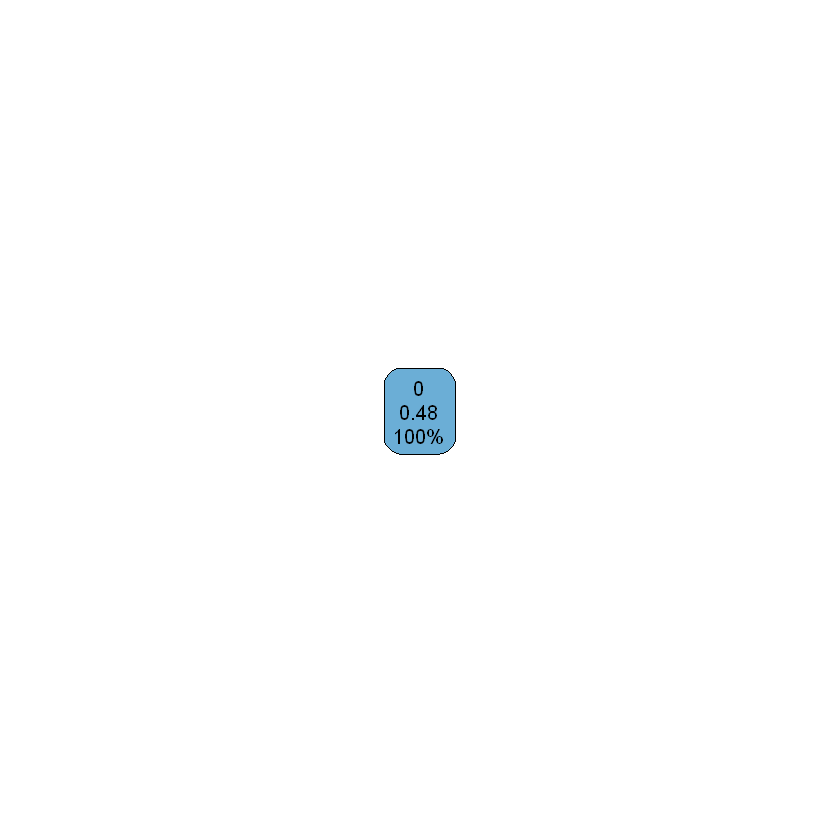

In [254]:
rpart.plot(hs_tree)

In [255]:
hs_trainpred <- predict(hs_tree,train,type='class')
hs_trainpred

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1592] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1703] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1777] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## RandomFOrest

In [70]:
test$hs_logmodelpred<-NULL

In [71]:
hs_rndmodel <- randomForest(V2~.,train,method = 'class')

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

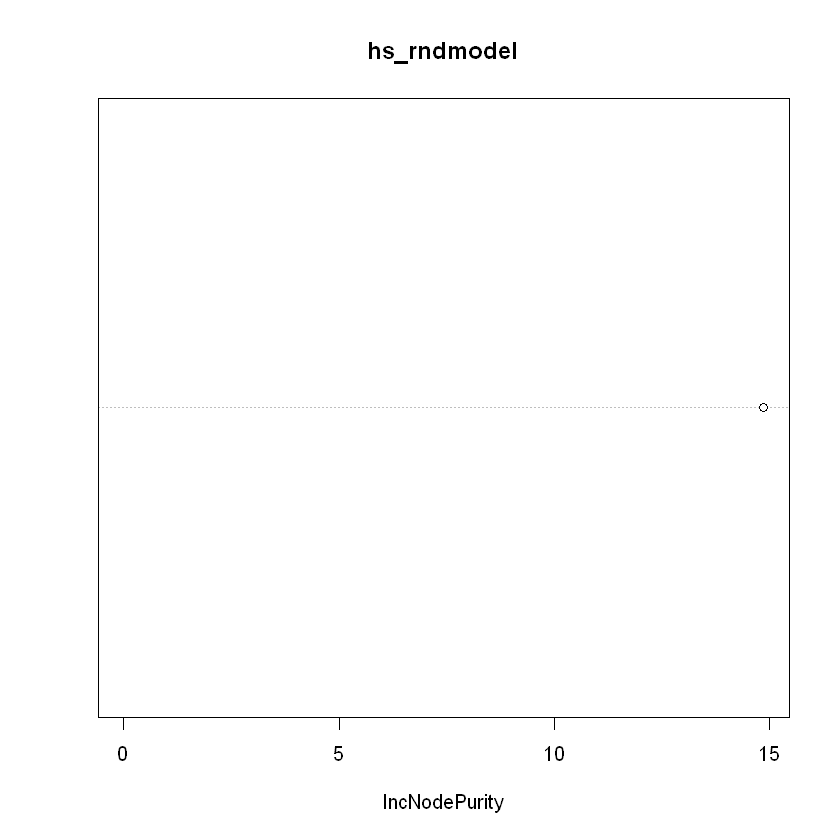

In [72]:
varImpPlot(hs_rndmodel)

In [73]:
summary(hs_rndmodel)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       5686   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       5686   -none- numeric  
importance         1   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               5686   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [74]:
hs_trainpred <- predict(hs_rndmodel,train,type='class')
hs_rndpred <- predict(hs_rndmodel,test,type='class')

In [75]:
train$hs_trainpred <- ifelse(hs_trainpred < 0.45,0,1)

In [76]:
test$hs_rndpred <- ifelse(hs_rndpred<0.47,0,1)

In [77]:
accuracy(train$hs_trainpred,train$hs_trainpred,0.45)

$accuracyNum
   ypred
y      0    1
  0 1109    0
  1    0 4577

$accuracyPer
   ypred
y     0   1
  0 100   0
  1   0 100

$overallAcc
[1] 100


In [78]:
accuracy(test$hs_rndpred,test$V2,0.48)

$accuracyNum
   ypred
y     0   1
  0 528 509
  1 741 660

$accuracyPer
   ypred
y       0     1
  0 50.92 49.08
  1 52.89 47.11

$overallAcc
[1] 48.73


Sensitivity or Recall <- TP/(TP+FN) = 660/(660+741) = 0.4711

Specificity <- TN / (TN+FP) = 528/(528+509) = 0.5092

Precision <- TP / (TP+FP) = 660/(660+509) = 0.5646

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(0.4711*0.5646)/(0.4711+0.5646)= 0.5316

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (660+528)/(660+509+528+741) = 0.4873

In [79]:
roc(test$hs_rndpred,test$V2)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$hs_rndpred, predictor = test$V2)

Data: test$V2 in 1037 controls (test$hs_rndpred 0) < 1401 cases (test$hs_rndpred 1).
Area under the curve: 0.4901

gini co-efficient <- 2*AUC - 1 = 2 * 0.4901 - 1 = -0.0198

## XGBoost

In [263]:
train$hs_trainpred <- NULL
test$hs_rndpred <- NULL

In [264]:
dMtrain <- xgb.DMatrix(as.matrix(train %>% select(-V2)), label = train$V2)
dMtest <- xgb.DMatrix(as.matrix(test %>% select(-V2)), label = test$V2)

In [265]:
params <- list(
  "objective"           = "binary:logistic",
  "eval_metric"         = "auc",
  "eta"                 = 0.012,
  "subsample"           = 0.8,
  "max_depth"           = 8,
  "colsample_bytree"    =0.9,
  "min_child_weight"    = 5
)

In [266]:
model_xgb.cv <- xgb.cv(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nfold = 5,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)



[1]	train-auc:0.533374+0.005166	test-auc:0.493653+0.024510 
Multiple eval metrics are present. Will use test_auc for early stopping.
Will train until test_auc hasn't improved in 100 rounds.

[101]	train-auc:0.539918+0.004134	test-auc:0.490925+0.014186 
Stopping. Best iteration:
[1]	train-auc:0.533374+0.005166	test-auc:0.493653+0.024510



In [267]:
model_xgb <- xgboost(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.531652 
Will train until train_auc hasn't improved in 100 rounds.

[101]	train-auc:0.534888 
[201]	train-auc:0.534895 
Stopping. Best iteration:
[194]	train-auc:0.534923



In [268]:
xgb_trainpred <- predict(model_xgb,dMtrain)
xgb_pred <- predict(model_xgb,dMtest)

In [269]:
train$xgb_trainpred <- ifelse(xgb_trainpred < 0.45,0,1)
test$xgb_pred <- ifelse(xgb_pred < 0.49,0,1)

In [270]:
accuracy(train$xgb_trainpred,train$V2,0.45)

$accuracyNum
   ypred
y      0    1
  0  526  393
  1 2433 2334

$accuracyPer
   ypred
y       0     1
  0 57.24 42.76
  1 51.04 48.96

$overallAcc
[1] 50.3


In [271]:
accuracy(test$xgb_pred,test$V2,0.49)

$accuracyNum
   ypred
y     0   1
  0 683 661
  1 566 528

$accuracyPer
   ypred
y       0     1
  0 50.82 49.18
  1 51.74 48.26

$overallAcc
[1] 49.67


Sensitivity or Recall <- TP/(TP+FN) = 528/(528+566)= 0.4826
 
Specificity <- TN / (TN+FP) = 683/(683+661) = 0.5082

Precision <- TP / (TP+FP) = 528/(528+661) = 0.2469

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(0.4729*0.2469)/(0.4729+0.2469) = 0.4440

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (528+683)/(528+661+566+683) = 0.4967

In [272]:
roc(test$xgb_pred,test$V2)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$xgb_pred, predictor = test$V2)

Data: test$V2 in 1344 controls (test$xgb_pred 0) < 1094 cases (test$xgb_pred 1).
Area under the curve: 0.4954

gini co-efficient <- 2*AUC - 1 = 2 * 0.4954 - 1 = -0.0092

## K Nearest Neighbour

In [273]:
train$xgb_trainpred <- NULL
test$xgb_pred <- NULL

In [274]:
train_knn <- train[,-2]
test_knn <- test[,-2]

In [275]:
train_labels <- train[, 2]
test_labels <- test[, 2] 


In [276]:
knn_trainpred <-  knn(train = train_knn, test = train_knn,cl = train_labels, k=6)
knn_pred <-  knn(train = train_knn, test = test_knn,cl = train_labels, k=6)

ERROR: Error in knn(train = train_knn, test = train_knn, cl = train_labels, k = 6): dims of 'test' and 'train' differ


## Support vector machine

In [277]:
train$xgb_trainpred<- NULL
test$xgb_pred <- NULL

In [278]:
hs_svm <- svm(V2~.,train)

In [279]:
summary(hs_svm)


Call:
svm(formula = V2 ~ ., data = train)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  5446






In [280]:
hs_svmtrain <- predict(hs_svm,train)
hs_svmpredict <- predict(hs_svm,test)

In [281]:
train$hs_svmtrain <- ifelse(hs_svmtrain<0.05,0,1)

In [282]:
test$hs_svmpredict <- ifelse(hs_svmpredict<0.05,0,1)

In [283]:
accuracy(train$hs_svmtrain,train$V2,0.5)

$accuracyNum
   ypred
y      0    1
  0  873  750
  1 2086 1977

$accuracyPer
   ypred
y       0     1
  0 53.79 46.21
  1 51.34 48.66

$overallAcc
[1] 50.12


In [284]:
accuracy(test$hs_svmpredict,test$V2,0.05)

$accuracyNum
   ypred
y     0   1
  0 388 348
  1 861 841

$accuracyPer
   ypred
y       0     1
  0 52.72 47.28
  1 50.59 49.41

$overallAcc
[1] 50.41


Sensitivity or Recall <- TP/(TP+FN) = 841/(841+861) = 0.4941

Specificity <- TN / (TN+FP) = 388/(388+348) = 0.0.5271

Precision <- TP / (TP+FP) = 841/(841+348) = 0.0.7073

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(0.4941*0.7073)/(0.4941+0.7073) = 0.5817

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (841+388)/(841+348+861+388) = 0.5041

In [285]:
roc(test$hs_svmpredict,test$V2)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$hs_svmpredict, predictor = test$V2)

Data: test$V2 in 736 controls (test$hs_svmpredict 0) < 1702 cases (test$hs_svmpredict 1).
Area under the curve: 0.5106

gini co-efficient <- 2*AUC - 1 = 2 * 0.5106 -1 = 0.0212

In [286]:
train$hs_svmtrain<- NULL
test$hs_svmpredict<- NULL

   # Leave One Out Encoding

In [47]:
library(cattonum)

Warning message:
"package 'cattonum' was built under R version 3.6.2"

In [48]:
loh_data <- catto_loo(data_true1,response='class')

In [49]:
head(loh_data)

class,odor,gill.size,stalk.root,stalk.surface.above.ring,bruises,stalk.surface.below.ring,ring.type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.00000000,0.8853047,0.22788204,0.2966184,0.1845926,0.3110436,0.2054449
0,0.00000000,0.3015505,0.07927928,0.2968116,0.1848889,0.3112462,0.2056970
0,0.00000000,0.3015505,0.07927928,0.2968116,0.1848889,0.3112462,0.2056970
1,1.00000000,0.8853047,0.22788204,0.2966184,0.1845926,0.3110436,0.2054449
0,0.03402325,0.3015505,0.22877569,0.2968116,0.6934906,0.3112462,0.6371171
0,0.00000000,0.3015505,0.07927928,0.2968116,0.1848889,0.3112462,0.2056970


In [50]:
smp_size = floor(nrow(loh_data)*0.7)
traindata = sample(nrow(loh_data),size=smp_size)
set.seed(12345)
train = loh_data[traindata,]
test = loh_data[-traindata,]

## Logistic Regression

In [291]:
Loh_logmodel <- glm(class~.,train,family=binomial())

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [292]:
summary(Loh_logmodel)


Call:
glm(formula = class ~ ., family = binomial(), data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.26992  -0.07204   0.00000   0.00000   2.62154  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 8.096     15.162   0.534 0.593354    
odor                      468.206    115.832   4.042  5.3e-05 ***
gill.size                  19.540      9.817   1.990 0.046554 *  
stalk.root                -19.946      5.779  -3.451 0.000558 ***
stalk.surface.above.ring   27.884     12.877   2.165 0.030353 *  
bruises                   -37.862     14.219  -2.663 0.007750 ** 
stalk.surface.below.ring  -81.143     52.949  -1.532 0.125403    
ring.type                   2.790      5.045   0.553 0.580250    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7872.0  on 5685  degrees of freedom
Residual deviance: 

In [293]:
Loh_trainmod <- predict(Loh_logmodel,train,type = "response")

In [294]:
Loh_logmodelpred <- predict(Loh_logmodel,test,type = 'response')

In [295]:
train$Loh_trainmod <- ifelse(Loh_trainmod<0.6,0,1)
test$Loh_logmodelpred <- ifelse(Loh_logmodelpred<0.6,0,1)

In [296]:
accuracy(train$Loh_trainmod,train$class,0.6)

$accuracyNum
   ypred
y      0    1
  0 2965   47
  1    0 2674

$accuracyPer
   ypred
y        0      1
  0  98.44   1.56
  1   0.00 100.00

$overallAcc
[1] 99.17


In [297]:
accuracy(test$Loh_logmodelpred,test$class,0.6)

$accuracyNum
   ypred
y      0    1
  0 1243   25
  1    0 1170

$accuracyPer
   ypred
y        0      1
  0  98.03   1.97
  1   0.00 100.00

$overallAcc
[1] 98.97


Sensitivity or Recall <- TP/(TP+FN) = 1170/(1170+0) = 1

Specificity <- TN / (TN+FP) = (1243)/(1243+25) = 0.9803

Precision <- TP / (TP+FP) = 1170/(1170+25) = 0.9790

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9790)/(1+0.9790) = 0.9894

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1170+1243)/(1170+25+0+1243) = 0.9897

In [298]:
roc(test$Loh_logmodelpred,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$Loh_logmodelpred, predictor = test$class)

Data: test$class in 1268 controls (test$Loh_logmodelpred 0) < 1170 cases (test$Loh_logmodelpred 1).
Area under the curve: 0.9901

gini co-efficient <- 2*AUC - 1 = 2*0.9901 - 1 = 0.9802

## Decision tree

In [299]:
train$Loh_trainmod <- NULL
test$Loh_logmodelpred <- NULL

In [300]:
tree_loo <- rpart(class~.,train,method='class')

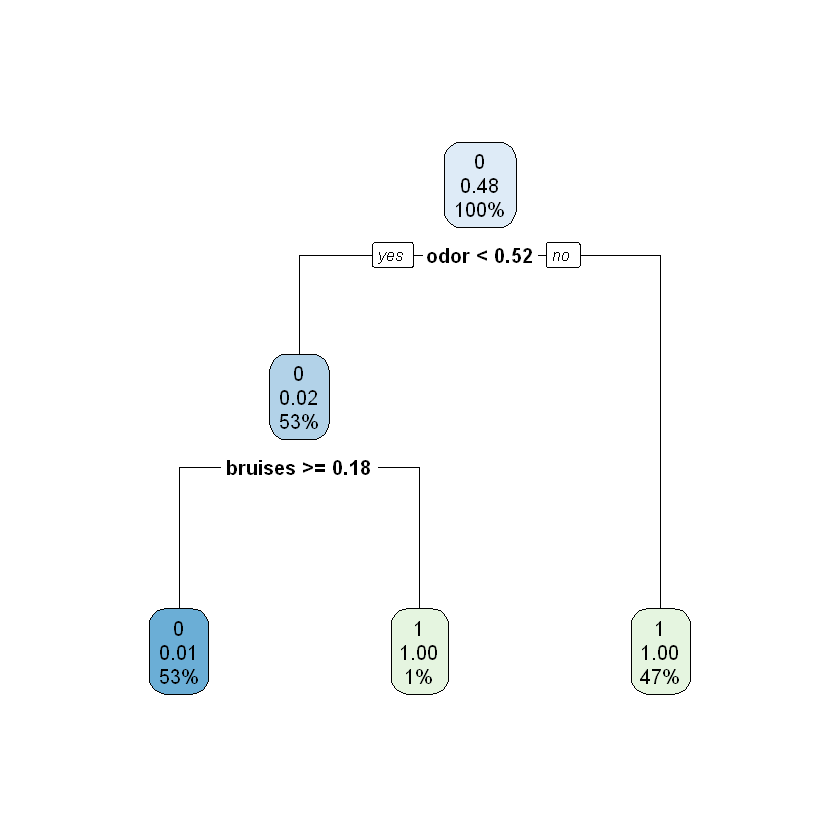

In [301]:
rpart.plot(tree_loo)

In [302]:
train$tree_trainloo <- predict(tree_loo,train,type='class')
test$tree_predloo <- predict(tree_loo,test,type='class')

In [303]:
accuracy(train$tree_trainloo,train$class,0)

$accuracyNum
   ypred
y      0    1
  0 2965   21
  1    0 2700

$accuracyPer
   ypred
y       0     1
  0  99.3   0.7
  1   0.0 100.0

$overallAcc
[1] 99.63


In [304]:
accuracy(test$tree_predloo,test$class,0)

$accuracyNum
   ypred
y      0    1
  0 1243   19
  1    0 1176

$accuracyPer
   ypred
y        0      1
  0  98.49   1.51
  1   0.00 100.00

$overallAcc
[1] 99.22


Sensitivity or Recall <- TP/(TP+FN) = 1176/(1176+0) = 1

Specificity <- TN / (TN+FP) = 1243/(1243+19) = 0.9849

Precision <- TP / (TP+FP) = 1176/(1176+19) = 0.9841

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9841)/(1+0.9841) = 0.9920

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1176+1243)/(1176+19+0+1243) = 0.9922

In [305]:
roc(test$tree_predloo,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$tree_predloo, predictor = test$class)

Data: test$class in 1262 controls (test$tree_predloo 0) < 1176 cases (test$tree_predloo 1).
Area under the curve: 0.9925

gini co-efficient <- 2*AUC - 1 = 0.985

## Random Forest

In [51]:
train$tree_trainloo <- NULL
test$tree_predloo <- NULL

In [52]:
Loh_rndmodel <- randomForest(class~.,train,method = 'class')

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

In [53]:
Loh_rndmodel


Call:
 randomForest(formula = class ~ ., data = train, method = "class") 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 2.737938e-08
                    % Var explained: 100

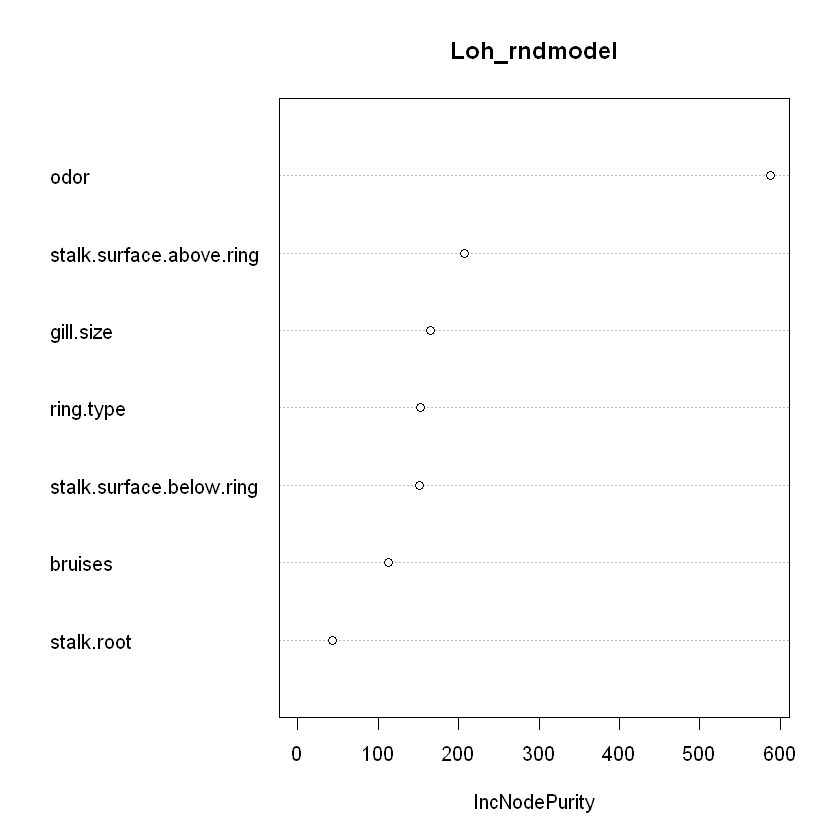

In [54]:
varImpPlot(Loh_rndmodel)

In [55]:
Loh_rndtrainpred <- predict(Loh_rndmodel,train,type='class')
Loh_rndmodelpred <- predict(Loh_rndmodel,test,type = 'class')

In [56]:
train$Loh_rndtrainpred <- ifelse(Loh_rndtrainpred < 0.5,0,1)
test$Loh_rndmodelpred <- ifelse(Loh_rndmodelpred < 0.5,0,1)

In [57]:
accuracy(train$Loh_rndtrainpred,train$Loh_rndtrainpred,0.5)

$accuracyNum
   ypred
y      0    1
  0 2939    0
  1    0 2747

$accuracyPer
   ypred
y     0   1
  0 100   0
  1   0 100

$overallAcc
[1] 100


In [58]:
accuracy(test$Loh_rndmodelpred,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1269    0
  1    0 1169

$accuracyPer
   ypred
y     0   1
  0 100   0
  1   0 100

$overallAcc
[1] 100


Sensitivity or Recall <- TP/(TP+FN) = 1157/(1157+0) = 1

Specificity <- TN / (TN+FP) = 1281/(1281+0) = 1

Precision <- TP / (TP+FP) = 1157/(1157+0) = 1

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*1)/(1+1) = 1

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1157+1281)/(1157+0+0+1281) = 1

In [59]:
roc(test$Loh_rndmodelpred,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$Loh_rndmodelpred, predictor = test$class)

Data: test$class in 1269 controls (test$Loh_rndmodelpred 0) < 1169 cases (test$Loh_rndmodelpred 1).
Area under the curve: 1

In [ ]:
gini co-efficient <- 2*AUC - 1 = 1

## XGBoost

In [314]:
train$Loh_rndtrainpred<- NULL
test$Loh_rndmodelpred <- NULL

In [315]:
dMtrain <- xgb.DMatrix(as.matrix(train %>% select(-class)), label = train$class)
dMtest <- xgb.DMatrix(as.matrix(test %>% select(-class)), label = test$class)

In [316]:
params <- list(
  "objective"           = "binary:logistic",
  "eval_metric"         = "auc",
  "eta"                 = 0.012,
  "subsample"           = 0.8,
  "max_depth"           = 8,
  "colsample_bytree"    =0.9,
  "min_child_weight"    = 5
)

In [317]:
model_xgb.cv <- xgb.cv(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nfold = 5,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.999812+0.000295	test-auc:0.999761+0.000407 
Multiple eval metrics are present. Will use test_auc for early stopping.
Will train until test_auc hasn't improved in 100 rounds.

[101]	train-auc:1.000000+0.000000	test-auc:1.000000+0.000000 
Stopping. Best iteration:
[15]	train-auc:1.000000+0.000000	test-auc:1.000000+0.000000



In [318]:
model_xgb <- xgboost(params=params,
                      data = dMtrain, 
                      maximize = TRUE,
                      nrounds = 5000,
                      nthread = 3,
                      early_stopping_round=100,
                      print_every_n=100)

[1]	train-auc:0.999986 
Will train until train_auc hasn't improved in 100 rounds.

[101]	train-auc:1.000000 
Stopping. Best iteration:
[4]	train-auc:1.000000



In [319]:
xgb_trainpred <- predict(model_xgb,dMtrain)
xgb_pred <- predict(model_xgb,dMtest)

In [320]:
train$xgb_trainpred <- ifelse(xgb_trainpred < 0.5,0,1)
test$xgb_pred <- ifelse(xgb_pred < 0.5,0,1)

In [321]:
accuracy(train$xgb_trainpred,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2965    4
  1    0 2717

$accuracyPer
   ypred
y        0      1
  0  99.87   0.13
  1   0.00 100.00

$overallAcc
[1] 99.93


In [322]:
accuracy(test$xgb_pred,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1243    4
  1    0 1191

$accuracyPer
   ypred
y        0      1
  0  99.68   0.32
  1   0.00 100.00

$overallAcc
[1] 99.84


Sensitivity or Recall <- TP/(TP+FN) = 1191/(1191+0) = 1

Specificity <- TN / (TN+FP) = 1243/(1243+4) = 0.9968

Precision <- TP / (TP+FP) = 1191/(1191+4) = 0.9967

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9967)/(1+0.9967) = 0.9983

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1191+1243)/(1191+4+0+1243) = 0.9984

In [323]:
roc(test$xgb_pred,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$xgb_pred, predictor = test$class)

Data: test$class in 1247 controls (test$xgb_pred 0) < 1191 cases (test$xgb_pred 1).
Area under the curve: 0.9984

gini co-efficient <- 2*AUC - 1 = 2 * 0.9984 -1 = 0.9968

## K Nearest Neighbour

In [324]:
train$xgb_trainpred <- NULL
test$xgb_pred <- NULL

In [325]:
train_knn <- train[,-1]
test_knn <- test[,-1]
train_labels <- train[, 1]
test_labels <- test[, 1] 

In [326]:
knn_trainpred <-  knn(train = train_knn, test = train_knn,cl = train_labels, k=6)
knn_pred <-  knn(train = train_knn, test = test_knn,cl = train_labels, k=6)

ERROR: Error in knn(train = train_knn, test = train_knn, cl = train_labels, k = 6): too many ties in knn


## Support vector machine

In [327]:
Loh_svmmodel <- svm(class~.,train)

In [328]:
summary(Loh_svmmodel)


Call:
svm(formula = class ~ ., data = train)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1428571 
    epsilon:  0.1 


Number of Support Vectors:  148






In [329]:
Loh_svmtrain <- predict(Loh_svmmodel,train)
Loh_svmmodelpred <- predict(Loh_svmmodel,test)

In [330]:
train$Loh_svmtrain <- ifelse(Loh_svmtrain <0.5,0,1)
test$Loh_svmmodelpred <- ifelse(Loh_logmodelpred <0.5,0,1)

In [331]:
accuracy(train$Loh_svmtrain,train$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 2965   54
  1    0 2667

$accuracyPer
   ypred
y        0      1
  0  98.21   1.79
  1   0.00 100.00

$overallAcc
[1] 99.05


In [332]:
accuracy(test$Loh_svmmodelpred,test$class,0.5)

$accuracyNum
   ypred
y      0    1
  0 1243   25
  1    0 1170

$accuracyPer
   ypred
y        0      1
  0  98.03   1.97
  1   0.00 100.00

$overallAcc
[1] 98.97


Sensitivity or Recall <- TP/(TP+FN) = 1170/(1170+0) = 1

Specificity <- TN / (TN+FP) = (1243)/(1243+25) = 0.9803

Precision <- TP / (TP+FP) = 1170/(1170+25) = 0.9790

F1 Score <- 2(Recall * Precision) / (Recall + Precision) = 2*(1*0.9790)/(1+0.9790) = 0.9894

Accuracy <- (TP+TN)/(TP+FP+FN+TN) = (1170+1243)/(1170+25+0+1243) = 0.9897

In [333]:
roc(test$Loh_svmmodelpred,test$class)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = test$Loh_svmmodelpred, predictor = test$class)

Data: test$class in 1268 controls (test$Loh_svmmodelpred 0) < 1170 cases (test$Loh_svmmodelpred 1).
Area under the curve: 0.9901

gini co-efficient <- 2*AUC - 1 = 2*0.9901 - 1 = 0.9802 